# Capstone Project 3 - California Housing Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Data Preparation
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

---

## A. Business Problem Understanding

**Context**

Dataset California Housing berisi informasi mengenai properti perumahan di California dan digunakan untuk menganalisis faktor-faktor yang mempengaruhi nilai properti. Data ini meliputi atribut-atribut seperti koordinat geografis, usia rumah, jumlah ruangan, penduduk, dan pendapatan median. Dataset ini sering digunakan untuk memodelkan dan memprediksi nilai rumah berdasarkan berbagai fitur, serta untuk mengevaluasi faktor-faktor yang mempengaruhi harga properti di wilayah tersebut.

Dataset ini digunakan pada bab kedua dari buku terbaru Aurélien Géron, Hands-On Machine Learning with Scikit-Learn and TensorFlow. Dataset ini berisi informasi dari sensus California tahun 1990 dan merupakan pengantar yang sangat baik untuk menerapkan algoritma machine learning. Dataset ini mencakup berbagai fitur terkait perumahan dan demografi dalam sebuah blok di California, menjadikannya cocok untuk mengajarkan dasar-dasar machine learning.

**Problem Statement**

Banyak developer dan individu yang sulit untuk mendapatkan harga rumah terbaik, dikarenakan minimnya informasi dan tidak adanya perhitungan dasar untuk menentukan harga rumah terutama di California. Tujuan dari analisis ini adalah untuk memahami faktor-faktor apa saja yang mempengaruhi nilai rumah di California dan bagaimana berbagai features mempengaruhi harga rumah. Dengan informasi ini, kita dapat membangun model yang memprediksi nilai rumah secara akurat. Dataset California Housing menyediakan data yang relevan untuk melakukan analisis ini.


**Goals**

1.  Identifikasi Faktor-Faktor yang Mempengaruhi Nilai Rumah:
    -   Menentukan variabel-variabel yang signifikan dalam mempengaruhi nilai rumah berdasarkan data yang tersedia.
        Mengidentifikasi pola-pola yang ada dalam data yang dapat menjelaskan variasi nilai rumah.
    
2.  Pengembangan Model Prediktif:
    -   Membangun model klasifikasi atau regresi yang dapat memprediksi nilai rumah berdasarkan fitur-fitur yang ada.
        Mengukur seberapa baik model tersebut dalam memprediksi nilai rumah dan mengevaluasi performanya.

3.  Penerapan Insights untuk Pengambilan Keputusan:
    -   Memberikan wawasan yang berguna untuk investor, agen real estate, atau perencana kota mengenai faktor-faktor yang mempengaruhi harga properti.
        Menyediakan informasi yang bisa digunakan untuk perencanaan dan pengambilan keputusan terkait investasi properti.


**Analytics Approach**

Kami akan melakukan analisis regresi dengan variabel target berupa harga rumah dan fitur-fitur yang meliputi housing_median_age, total_rooms, population, total_bedrooms, dan lainnya. Tahapan pertama dalam analisis ini adalah memahami data beserta atribut yang ada. Selanjutnya, kami akan membersihkan data dari nilai yang hilang (missing values), duplikasi, dan anomali lainnya. Setelah itu, kami akan mencari wawasan dari data melalui analisis eksplorasi data (Exploratory Data Analysis, EDA). Setelah data siap, langkah berikutnya adalah pengolahan data agar dapat diproses oleh model machine learning.

Setelah data dipersiapkan, kami akan melakukan proses pemodelan machine learning melalui beberapa eksperimen untuk memperoleh nilai skor yang memadai yang dapat menggambarkan hasil prediksi model. Untuk mengevaluasi goodness of fit dari model yang telah dikembangkan, kami akan menggunakan beberapa metrik, yaitu RMSE dan MAPE. Akhirnya, kami akan menyusun rekomendasi bisnis yang relevan berdasarkan analisis yang dilakukan, sehingga pemangku kepentingan dapat menggunakan prediksi harga rumah untuk meningkatkan keuntungan.


**Evaluation Metric**

Setelah melakukan evaluasi terhadap berbagai model, kami memutuskan untuk menggunakan Extra Gradient Boosting Regressor sebagai model utama, penggunakan model XGBoost (Extreme Gradient Boosting) baik digunakan pada data ini, dikarenakan data ini memiliki banyak outliers, sedangkan model XGBoost (Extreme Gradient Boosting) tahan terhadap banyaknya outliers. Metrik utama yang kami pilih adalah Root Mean Square Error (RMSE) dan Mean Absolute Percentage Error (MAPE), dengan dua metrik pendukung, yaitu Mean Absolute Error (MAE) dan R². Prediksi harga rumah merupakan tantangan yang kompleks karena banyaknya fitur yang memengaruhi kualitas prediksi. Beberapa fitur mengalami multikolinearitas, yang dapat memengaruhi hasil. Penggunaan XGBoost diharapkan dapat menangani data yang mengandung banyak outlier dan fitur dengan korelasi tinggi.

Dalam analisis ini, penggunaan RMSE dan MAPE dipilih karena RMSE efektif dalam mengukur kesalahan absolut dari prediksi, sementara MAPE menghitung persentase kesalahan relatif terhadap nilai aktual. Dengan pendekatan ini, kami bertujuan untuk mencapai skor yang tidak hanya menunjukkan kinerja yang baik, tetapi juga mencerminkan kondisi keadaan yang sebenarnya. Metodologi ini sangat krusial dalam konteks prediksi harga rumah, di mana variabilitas dalam total ruangan, total kamar, rata-rata penghasilan, dan faktor-faktor lain harus dipertimbangkan untuk memastikan model memberikan prediksi yang akurat dan konsisten.

---

## B. Data Understanding

### 1. Import Data

In [2]:
# Import Data
housing = pd.read_csv('data_california_house.csv')
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0         1.9750          INLAND   
1           836.0       277.0         2.2604        NEAR BAY   
2          1387.0       364.0         6.2990       <1H OCEAN   
3          3051.0      1000.0         1.7199       <1H OCEAN   
4           606.0       167.0         2.2206          INLAND   
...           ...         ...            ...             ...   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14445       704.0       393.0         3.1977      NEAR OCEAN   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14443            144600.0  
14444            159400.0  
14445            289300.0  
14446            484600.0  
14447             69400.0  

[14448 rows x 10 columns]

### 2. Attributes Information (Penjelasan Setiap Variable)

Sebelum melakukan analisis lebih lanjut, penting untuk mendalami dataset kita melalui tahap data understanding. Proses ini memungkinkan kita untuk mengidentifikasi dan memahami anomali yang ada dalam dataset, sehingga dapat ditangani secara efektif pada tahap data cleaning. Setiap tindakan penanganan anomali akan disertai dengan justifikasi yang jelas, baik berdasarkan pengetahuan domain maupun analisis statistik, guna memastikan keakuratan dan integritas data. Dataset yang dianalisis berisi data california housing dan data ini memiliki 14,448 baris dan 10 atribut.

| No | Nama Kolom | Data Type | Penjelasan |
| --- | --- | --- | --- |
| 1 | longitude | float64 | Koordinat geografis garis bujur (longitude) dari lokasi rumah. |
| 2 | latitude |  float64 | Koordinat geografis garis lintang (latitude) dari lokasi rumah. |
| 3 | housing_median_age | float64 | Usia median dari rumah-rumah di blok tersebut (median dari kapan rumah dibangun). |
| 4 | total_rooms | float64 | Total jumlah kamar di semua rumah di blok tersebut. |
| 5 | total_bedrooms | float64 | Total jumlah kamar tidur di semua rumah di blok tersebut. |
| 6 | population | float64 | Total populasi orang yang tinggal di blok tersebut. |
| 7 | households | float64 | Total jumlah rumah tangga di blok tersebut. |
| 8 | median_income | float64 | Pendapatan median dari rumah tangga di blok tersebut, dalam satuan 10.000 dolar AS. |
| 9 | ocean_proximity | object  | Kategori yang menunjukkan kedekatan lokasi rumah terhadap pantai atau laut. |
| 10 | median_house_value | float64 | Nilai median dari rumah-rumah di blok tersebut, dalam dolar AS. |

### 3. Head, Tail, Unique

Bagian ini akan dilakukan pengecekan 10 data pertama dan 10 data terakhir, serta mengecek data unique yang ada pada data

In [3]:
# Melihat 10 data teratas
housing.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   
5    -117.79     33.80                11.0      10535.0          1620.0   
6    -117.80     33.81                14.0       1206.0           142.0   
7    -121.26     38.69                17.0       3917.0           638.0   
8    -117.65     33.48                 6.0       1638.0           188.0   
9    -122.27     37.97                10.0      15259.0          2275.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0  
5      4409.0      1622.0         6.6700       <1H OCEAN            283200.0  
6       572.0       149.0         8.8470       <1H OCEAN            388700.0  
7      1809.0       564.0         5.2586          INLAND            137000.0  
8       572.0       174.0        13.0502       <1H OCEAN            500001.0  
9      7266.0      2338.0         6.0666        NEAR BAY            272400.0

In [4]:
# Melihat 10 data terbawah
housing.tail(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14438    -122.43     37.75                52.0       2285.0           509.0   
14439    -117.24     33.20                25.0       1631.0           415.0   
14440    -117.00     32.64                11.0       3098.0           490.0   
14441    -117.10     32.73                24.0       2927.0           704.0   
14442    -120.06     36.94                19.0        901.0           183.0   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
14438       839.0       456.0         4.7946        NEAR BAY   
14439      1045.0       386.0         2.4505       <1H OCEAN   
14440      1391.0       484.0         4.9792      NEAR OCEAN   
14441      2005.0       668.0         2.2375      NEAR OCEAN   
14442       700.0       190.0         2.2375          INLAND   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14445       704.0       393.0         3.1977      NEAR OCEAN   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
14438            355600.0  
14439            147500.0  
14440            170400.0  
14441            102900.0  
14442             64300.0  
14443            144600.0  
14444            159400.0  
14445            289300.0  
14446            484600.0  
14447             69400.0

In [5]:
# Membuat dataframe untuk setiap data unique
pd.set_option('display.max_colwidth', 1)

unique_list = []

for kolom in housing.columns:
    unique_list.append([kolom, housing[kolom].nunique(), housing[kolom].unique()])

df_unique = pd.DataFrame(data = unique_list, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
df_unique.sort_values('Number of Unique', ascending=False).reset_index(drop=True)

Column Name  Number of Unique  \
0  median_income       9797               
1  total_rooms         5227               
2  median_house_value  3548               
3  population          3498               
4  total_bedrooms      1748               
5  households          1649               
6  latitude            836                
7  longitude           806                
8  housing_median_age  52                 
9  ocean_proximity     5                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0  [1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8.847, 5.2586, 13.0502, 6.0666, 3.6294, 5.0821, 3.5089, 4.2985, 2.4342, 2.0109, 2.0114, 1.2532, 2.0472, 5.0371, 1.8438, 0.7069, 3.6788, 2.5521, 4.825, 1.4038, 2.6339, 2.89, 4.7083, 4.125, 5.143, 1.625, 3.8571, 2.6981, 5.3074, 2.7679, 2.9054, 4.6369, 4.0208, 3.2083, 6.0653, 3.6053, 3.4773, 8.2883, 4.1364, 5.4872, 4.3621, 2.8352, 4.0234, 2.4071, 2.944, 4.1837, 1.65, 3.7222, 2.2339, 4.277, 4.2647, 1.5479, 1.5625, 1.9495, 2.6842, 3.4047, 4.4107, 6.1815, 6.8753, 3.6912, 3.66, 0.9234, 6.0102, 5.3077, 1.319, 6.1395, 2.6923, 8.2069, 3.0911, 3.2708, 3.875, 4.45, 2.3463, 1.6645, 2.066, 4.325, 4.221, 1.4034, 5.3972, 4.9083, 4.5625, 5.7072, 1.6563, 5.133, 5.0198, 2.6713, 4.5481, 4.5903, 3.7303, 4.3523, 3.0352, 4.9716, 6.7606, 3.1523, ...]                                                                                                                                                                                                          
1  [112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]                                                                                                                                                                                         
2  [47500.0, 100000.0, 285800.0, 175000.0, 59200.0, 283200.0, 388700.0, 137000.0, 500001.0, 272400.0, 240000.0, 265500.0, 305800.0, 139200.0, 119500.0, 54300.0, 104900.0, 102100.0, 93200.0, 180200.0, 66600.0, 70300.0, 178800.0, 157500.0, 184600.0, 145700.0, 86200.0, 213300.0, 216700.0, 176500.0, 50300.0, 90100.0, 208000.0, 401900.0, 155200.0, 186400.0, 262500.0, 145300.0, 105300.0, 345800.0, 206700.0, 412000.0, 203400.0, 173400.0, 408300.0, 266500.0, 170500.0, 338900.0, 125400.0, 94200.0, 237000.0, 116600.0, 98500.0, 133400.0, 82000.0, 52800.0, 173200.0, 89100.0, 29450

---

## C. Missing Values

Pada bagian ini akan dilakukan pengecekan missing values, missingno dan data duplicated. Hal ini dilakukan agar dapat mengetahui adanya data hilang dan duplikat.

### 1. Cek Missing Values

In [6]:
# Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'Missing Values':housing.isna().sum().sort_values(ascending=False)})
total_baris = len(housing)
missing['Percentage %'] = round((missing['Missing Values']/total_baris)*100,2)
missing

Missing Values  Percentage %
total_bedrooms      137             0.95        
longitude           0               0.00        
latitude            0               0.00        
housing_median_age  0               0.00        
total_rooms         0               0.00        
population          0               0.00        
households          0               0.00        
median_income       0               0.00        
ocean_proximity     0               0.00        
median_house_value  0               0.00

Terdapat missing values pada kolom total_bedrooms sebanyak 137 data

### 2. Cek Missingno

<Axes: >

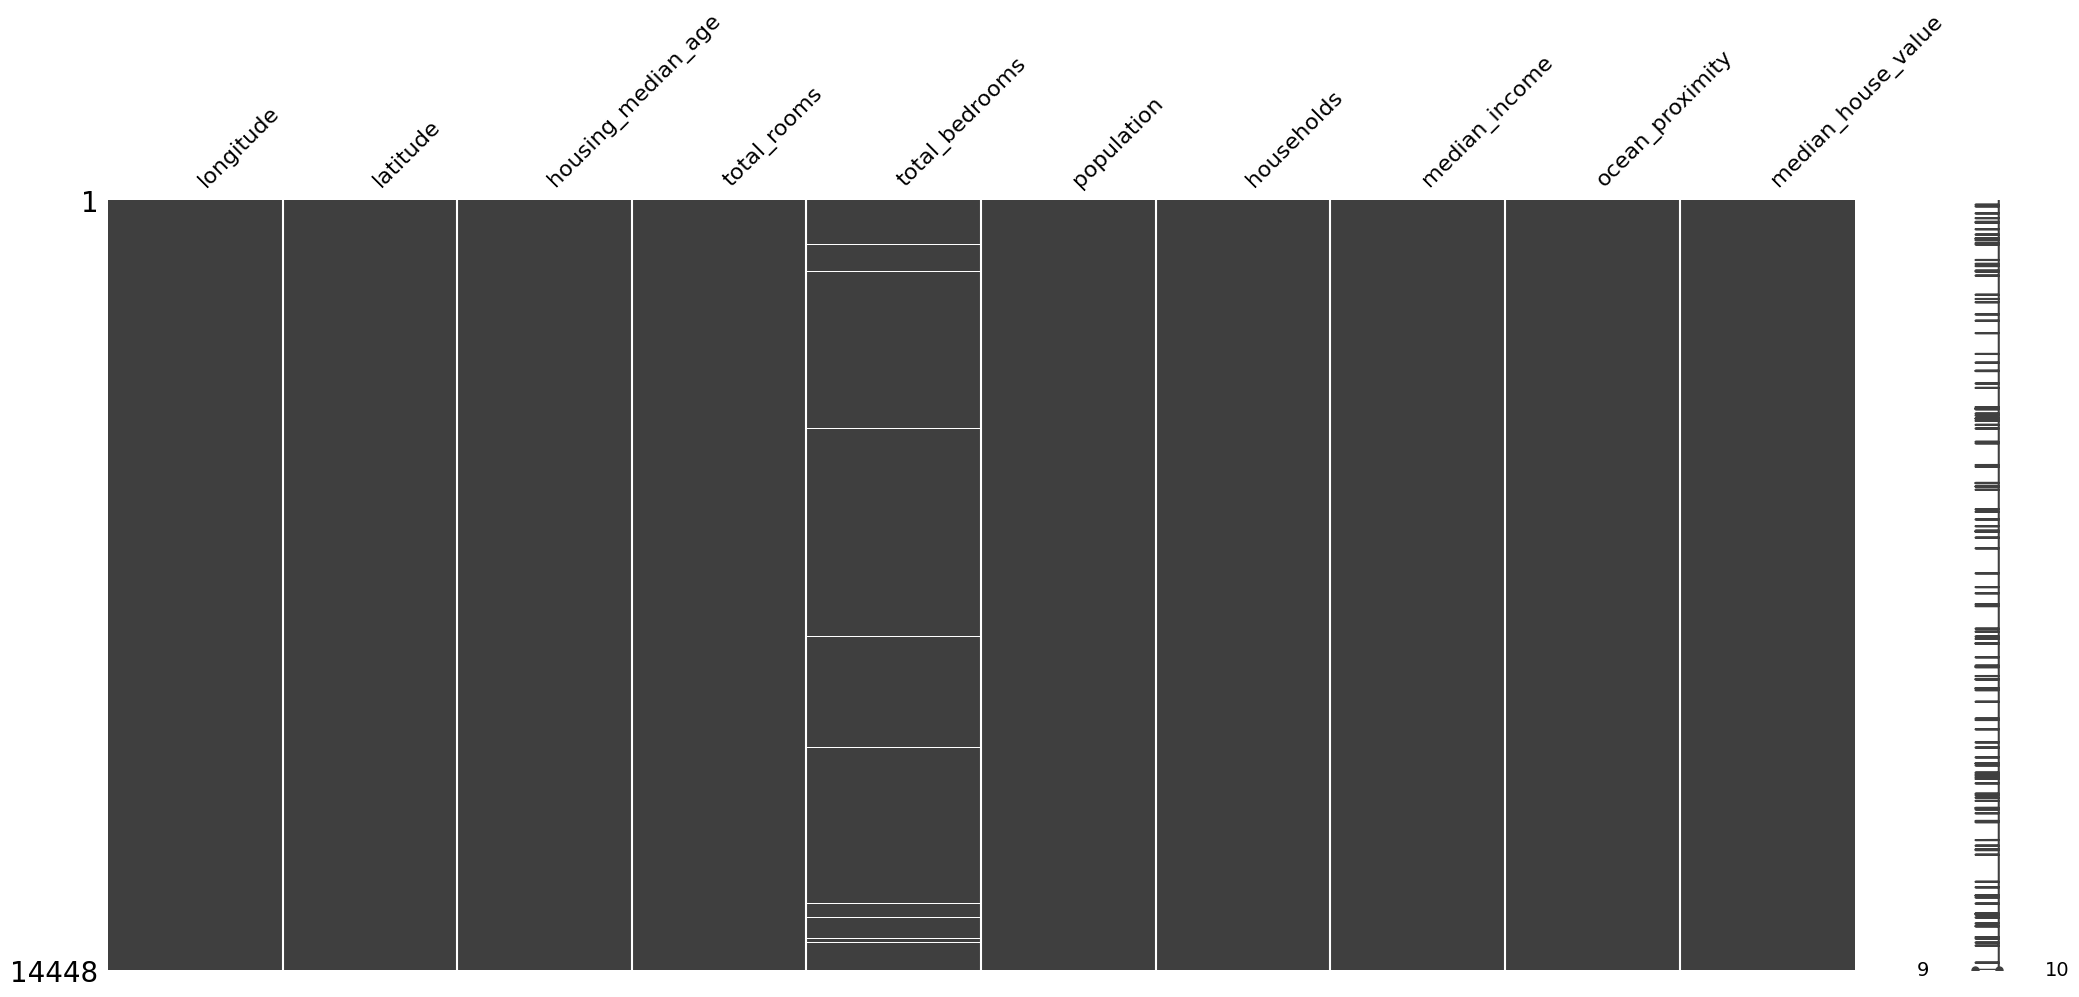

In [7]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(housing)

Berdasarkan pengecekan missingno dapat dilihat bahwa terdapat data missing values pada features total_bedrooms, hal ini membenarkan pengecekan missing values yang menemukan adanya 137 data yang hilang pada kolom total_bedrooms

### 3. Data Duplicated

In [8]:
# Jumlah Duplicate
housing.duplicated().sum()

0

In [9]:
housing[housing.duplicated()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []

Dapat dilihat bahwa setelah dilakukan pengecekan duplicated tidak ada data yang duplicated

---

## D. Variable Numerik

Bagian ini adalah proses pengecekan data dengan uji statistik pada data numerik.

### 1. Statistik Deskriptif (pengecekan detail data dan type data)

In [10]:
# Memilih data numerik utk proses statistik descriptif
housing_num = housing.select_dtypes(include='number')
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -119.79     36.73     52.0                112.0        28.0             
1     -122.21     37.77     43.0                1017.0       328.0            
2     -118.04     33.87     17.0                2358.0       396.0            
3     -118.28     34.06     17.0                2518.0       1196.0           
4     -119.81     36.73     50.0                772.0        194.0            
...       ...       ...      ...                  ...          ...            
14443 -121.26     38.27     20.0                1314.0       229.0            
14444 -120.89     37.48     27.0                1118.0       195.0            
14445 -121.90     36.58     31.0                1431.0      NaN               
14446 -117.93     33.62     34.0                2125.0       498.0            
14447 -115.56     32.80     15.0                1171.0       328.0            

       population  households  median_income  median_house_value  
0      193.0       40.0        1.9750         47500.0             
1      836.0       277.0       2.2604         100000.0            
2      1387.0      364.0       6.2990         285800.0            
3      3051.0      1000.0      1.7199         175000.0            
4      606.0       167.0       2.2206         59200.0             
...      ...         ...          ...             ...             
14443  712.0       219.0       4.4125         144600.0            
14444  647.0       209.0       2.9135         159400.0            
14445  704.0       393.0       3.1977         289300.0            
14446  1052.0      468.0       5.6315         484600.0            
14447  1024.0      298.0       1.3882         69400.0             

[14448 rows x 9 columns]

In [11]:
# Statistik Deskriptif
housing_num.describe().T

count           mean            std         min  \
longitude           14448.0 -119.566647     2.006587      -124.3500     
latitude            14448.0  35.630093      2.140121       32.5400      
housing_median_age  14448.0  28.618702      12.596694      1.0000       
total_rooms         14448.0  2640.132683    2191.612441    2.0000       
total_bedrooms      14311.0  538.260709     423.577544     1.0000       
population          14448.0  1425.157323    1149.580157    3.0000       
households          14448.0  499.508929     383.098390     1.0000       
median_income       14448.0  3.866667       1.891158       0.4999       
median_house_value  14448.0  206824.624516  115365.476182  14999.0000   

                            25%          50%          75%          max  
longitude          -121.8000    -118.4900    -118.0000    -114.3100     
latitude            33.9300      34.2600      37.7100      41.9500      
housing_median_age  18.0000      29.0000      37.0000      52.0000      
total_rooms         1451.0000    2125.0000    3148.0000    32627.0000   
total_bedrooms      295.0000     435.0000     647.0000     6445.0000    
population          784.0000     1165.0000    1724.0000    35682.0000   
households          279.0000     410.0000     604.0000     6082.0000    
median_income       2.5706       3.5391       4.7361       15.0001      
median_house_value  119600.0000  180000.0000  263900.0000  500001.0000

In [12]:
# Melihat info detail masing-masing kolom
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   median_house_value  14448 non-null  float64
dtypes: float64(9)
memory usage: 1016.0 KB


### 2. Distribusi Data

#### A. Grafik Histogram

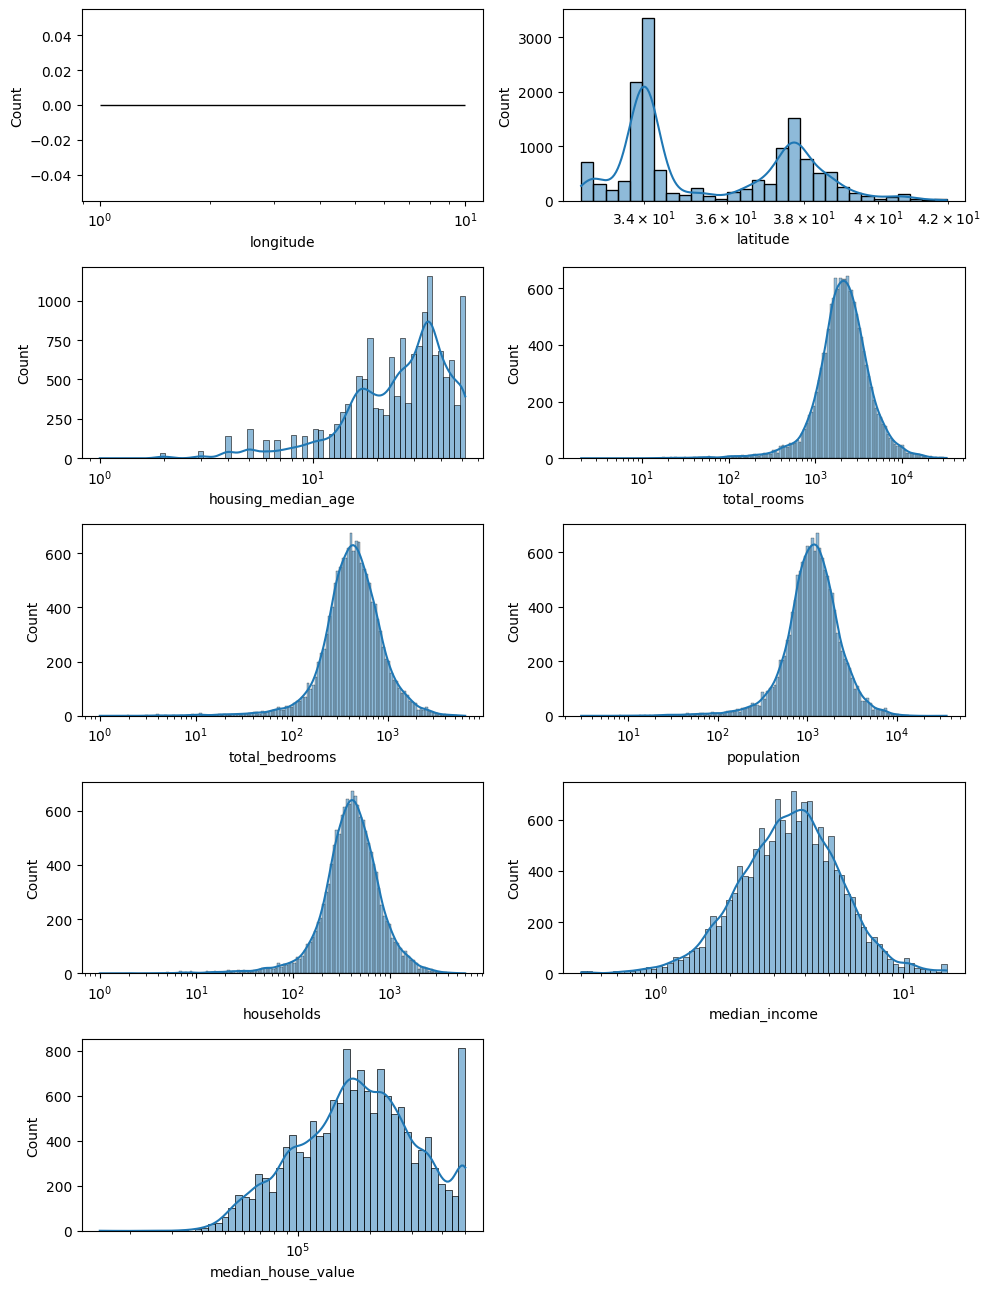

In [13]:
# Membuat grafik histogram agar dapat melihat pesebaran data
plt.figure(figsize=(10,13))
posisi = 1
for setiap_kolom in housing_num.columns:
    plt.subplot(5,2,posisi)
    sns.histplot(housing_num[setiap_kolom], log_scale=True, kde=True,) # Menggunakan log scale agar grafik terlihat lebih normal
    posisi += 1
    plt.tight_layout()
plt.show()

#### B. Uji Statistik

In [14]:
# Uji statistik Liliefors
from statsmodels.stats.diagnostic import lilliefors

for setiap_kolom in housing_num.columns:
    stat, pval = lilliefors(housing_num[setiap_kolom])
    if pval > 0.05:
        print(f'Berdasarkan uji statistik liliefors pada data {setiap_kolom}')
        print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
    else:
        print(f'Berdasarkan uji statistik liliefors Smirnov pada data {setiap_kolom}')
        print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik liliefors Smirnov pada data longitude
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data latitude
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data housing_median_age
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data total_rooms
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data total_bedrooms
Data tidak berdistribusi normal dengan Pval nan

Berdasarkan uji statistik liliefors Smirnov pada data population
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data households
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data median_income
Data tidak berdistribusi normal dengan Pval 0.001

Berdasarkan uji statistik liliefors Smirnov pada data median_

In [15]:
# Uji statistik D'Agustino Pearson
from scipy.stats import normaltest

for setiap_kolom in housing_num.columns:
    stat, pval = normaltest(housing_num[setiap_kolom])
    if pval > 0.05:
        print(f'Berdasarkan uji statistik Kolmogorov Smirnov pada data {setiap_kolom}')
        print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
    else:
        print(f'Berdasarkan uji statistik Kolmogorov Smirnov pada data {setiap_kolom}')
        print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik Kolmogorov Smirnov pada data longitude
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data latitude
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data housing_median_age
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data total_rooms
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data total_bedrooms
Data tidak berdistribusi normal dengan Pval nan

Berdasarkan uji statistik Kolmogorov Smirnov pada data population
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data households
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data median_income
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Kolmogorov Smirnov pada data median_house

**Hasil Uji Statistik untuk Distribusi Normalitas**

Dalam analisis data, dilakukan uji statistik untuk menentukan apakah data pada kolom-kolom tertentu berdistribusi normal. Uji normalitas ini menggunakan dua metode, yaitu:


**1. Uji Liliefors:**

Uji Liliefors digunakan untuk menguji hipotesis normalitas data dengan pendekatan non-parametrik. Hasil dari uji Liliefors menunjukkan bahwa data pada semua kolom yang diuji, termasuk longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, dan median_house_value, tidak mengikuti distribusi normal dengan nilai p (p-value) kurang dari 0.05.

**2. Uji D'Agostino-Pearson:**

Uji D'Agostino-Pearson digunakan untuk menguji keberadaan normalitas dengan mengukur skewness dan kurtosis data. Hasil dari uji D'Agostino-Pearson juga menunjukkan bahwa data pada kolom-kolom yang sama tidak berdistribusi normal, dengan nilai p (p-value) kurang dari 0.05.


**Kesimpulan dari Uji Normalitas**

**1. Analisis Histogram:**

Grafik histogram yang telah dibuat untuk kolom-kolom tersebut mendukung hasil uji statistik, di mana distribusi data pada histogram menunjukkan penyimpangan dari distribusi normal. Terdapat indikasi kuat adanya skewness atau ketidakseimbangan distribusi data, serta kehadiran banyak outlier yang mempengaruhi bentuk distribusi data.

**2. Penyimpangan Distribusi:**

Hasil uji normalitas yang konsisten dengan visualisasi histogram mengindikasikan bahwa data pada kolom-kolom tersebut tidak berdistribusi normal. Adanya skewness yang terdeteksi dalam distribusi data dapat mempengaruhi analisis lebih lanjut dan memerlukan pertimbangan khusus dalam pemilihan metode statistik atau model yang akan digunakan.

### 3. Pengecekan Outliers

#### A. Boxplot

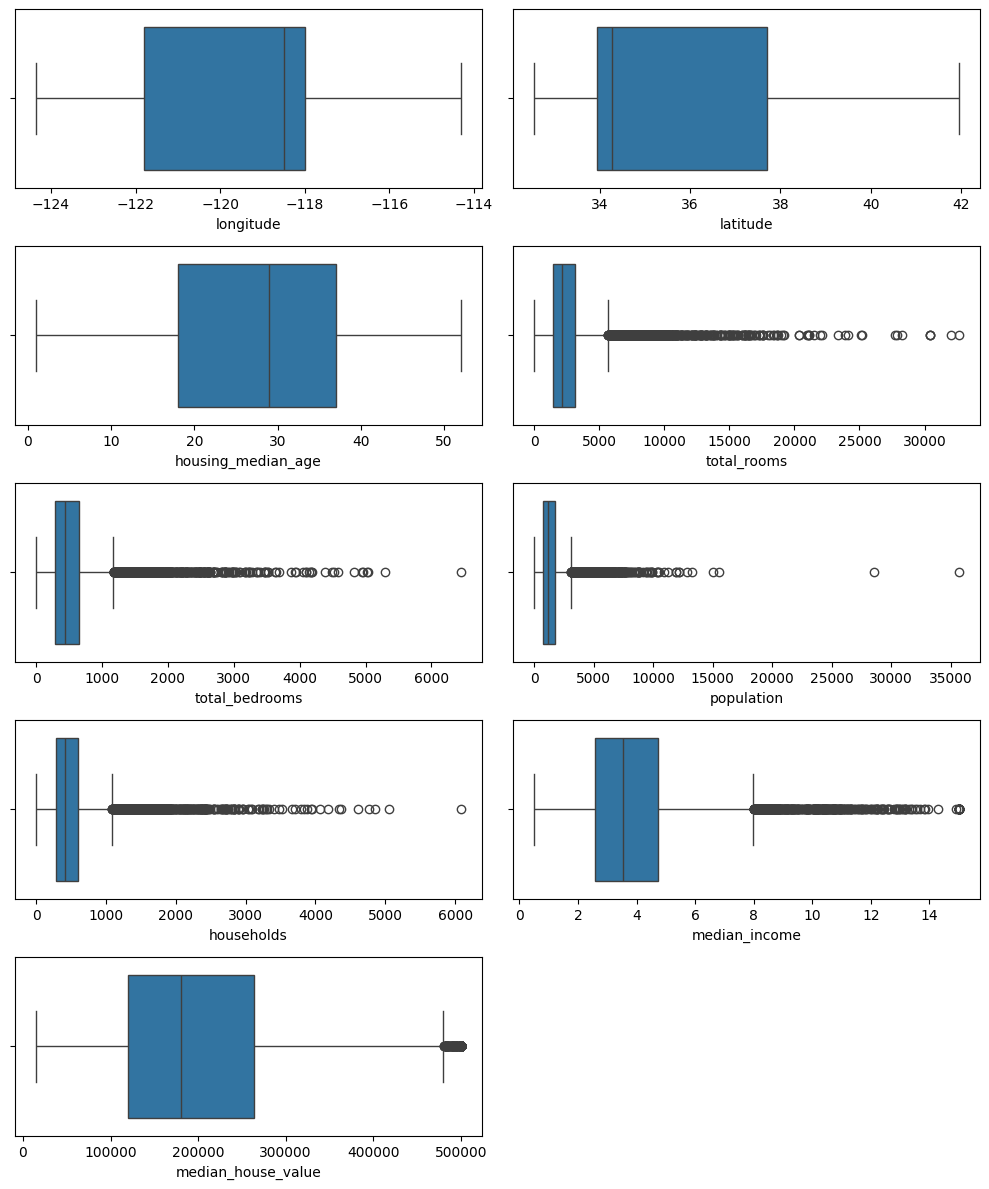

In [16]:
plt.figure(figsize=(10,12))
posisi = 1
for setiap_kolom in housing_num.columns:
    plt.subplot(5,2,posisi)
    sns.boxplot(x=housing_num[setiap_kolom])
    posisi += 1
    plt.tight_layout()

#### B. Interquartil Range (IQR)

In [17]:
persentage = len(housing_num)

jumlah_outlier = []
for setiap_kolom in housing_num.columns:
    q1 = housing_num[setiap_kolom].describe()['25%']
    q3 = housing_num[setiap_kolom].describe()['75%']
    iqr = q3 - q1
    wish = iqr * 1.5
    upper_bond = q3 + wish
    lower_bond = q1 - wish

    outliers = len(housing_num[(housing_num[setiap_kolom]<lower_bond)|(housing_num[setiap_kolom]>upper_bond)])
    jumlah_outlier.append(outliers)

outliers_df = pd.DataFrame({
                            'Kolom':housing_num.columns,
                            'Jumlah Outliers':jumlah_outlier,
                            })

outliers_df['Percentage %'] = round((outliers_df['Jumlah Outliers']/persentage)*100,2)
outliers_df


Kolom  Jumlah Outliers  Percentage %
0  longitude           0                0.00        
1  latitude            0                0.00        
2  housing_median_age  0                0.00        
3  total_rooms         900              6.23        
4  total_bedrooms      879              6.08        
5  population          827              5.72        
6  households          842              5.83        
7  median_income       482              3.34        
8  median_house_value  757              5.24

#### C. ZScore

In [18]:
persentage = len(housing_num)

jumlah_outlier = []
for setiap_kolom in housing_num.columns:
    mean = housing_num[setiap_kolom].mean()
    std = housing_num[setiap_kolom].std()
    zscore = abs((housing_num[setiap_kolom]-mean)/std)

    outliers = len(zscore[zscore>2])
    jumlah_outlier.append(outliers)

zscore_df = pd.DataFrame({
                          'Kolom':housing_num.columns,
                          'Jumlah Outliers':jumlah_outlier
                        })

zscore_df['Percentage %'] = round((zscore_df['Jumlah Outliers']/persentage)*100,2)
zscore_df

Kolom  Jumlah Outliers  Percentage %
0  longitude           187              1.29        
1  latitude            307              2.12        
2  housing_median_age  84               0.58        
3  total_rooms         528              3.65        
4  total_bedrooms      572              3.96        
5  population          521              3.61        
6  households          576              3.99        
7  median_income       589              4.08        
8  median_house_value  975              6.75

**Analisis Outliers dalam Data**

Pada tahap analisis data, dilakukan pemeriksaan terhadap outliers untuk memastikan integritas dan kualitas data. Proses ini mencakup penggunaan beberapa metode statistik untuk mengidentifikasi nilai-nilai yang menyimpang dari pola umum data. Metode yang digunakan meliputi Box Plot, Interquartile Range (IQR), dan Z-Score. Hasil analisis menunjukkan temuan sebagai berikut:


**1. Metode yang Digunakan:**
-   Box Plot: Grafik ini digunakan untuk mengidentifikasi outliers dengan melihat distribusi data berdasarkan kuartil dan mendeteksi nilai-nilai ekstrem yang berada di luar rentang interquartile.
-   Interquartile Range (IQR): Metode ini mengukur rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menentukan batas bawah dan atas, serta mengidentifikasi data yang berada di luar rentang ini sebagai outliers.
-   Z-Score: Metode ini mengukur seberapa jauh suatu nilai dari rata-rata dalam satuan deviasi standar, sehingga nilai dengan Z-Score yang sangat tinggi atau rendah dapat diidentifikasi sebagai outliers.

**2. Temuan Analisis:**

Berdasarkan hasil dari ketiga metode di atas, teridentifikasi adanya beberapa kolom yang mengandung outliers. Kolom-kolom yang menunjukkan adanya outliers adalah:
-   total_rooms
-   total_bedrooms
-   population
-   households
-   median_income
-   median_house_value

**3. Penjelasan dan Implikasi:**

-   Kolom yang Mengandung Outliers: Setiap kolom yang teridentifikasi memiliki nilai-nilai yang terletak jauh dari distribusi data utama, yang dapat mempengaruhi analisis statistik dan model yang dibangun.
-   Kepentingan Penanganan Outliers: Meskipun outliers dapat mempengaruhi hasil analisis, keputusan tentang penanganannya harus mempertimbangkan konteks data. Outliers bisa jadi merefleksikan fenomena nyata dalam data atau kesalahan pengukuran, dan penanganannya harus dilakukan dengan hati-hati untuk tidak kehilangan informasi berharga.


### 4. Korelasi

#### A. Korelasi

In [19]:
housing_num.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude           1.000000  -0.925158 -0.117501            0.057288      
latitude           -0.925158   1.000000  0.020830           -0.048514      
housing_median_age -0.117501   0.020830  1.000000           -0.367868      
total_rooms         0.057288  -0.048514 -0.367868            1.000000      
total_bedrooms      0.079528  -0.076796 -0.329448            0.931993      
population          0.108161  -0.117704 -0.299736            0.853460      
households          0.064218  -0.080046 -0.312394            0.919292      
median_income      -0.010093  -0.085176 -0.120396            0.199549      
median_house_value -0.045777  -0.143957  0.103863            0.131972      

                    total_bedrooms  population  households  median_income  \
longitude           0.079528        0.108161    0.064218   -0.010093        
latitude           -0.076796       -0.117704   -0.080046   -0.085176        
housing_median_age -0.329448       -0.299736   -0.312394   -0.120396        
total_rooms         0.931993        0.853460    0.919292    0.199549        
total_bedrooms      1.000000        0.874618    0.978561   -0.004160        
population          0.874618        1.000000    0.905061    0.006284        
households          0.978561        0.905061    1.000000    0.016365        
median_income      -0.004160        0.006284    0.016365    1.000000        
median_house_value  0.045915       -0.026183    0.061581    0.693273        

                    median_house_value  
longitude          -0.045777            
latitude           -0.143957            
housing_median_age  0.103863            
total_rooms         0.131972            
total_bedrooms      0.045915            
population         -0.026183            
households          0.061581            
median_income       0.693273            
median_house_value  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

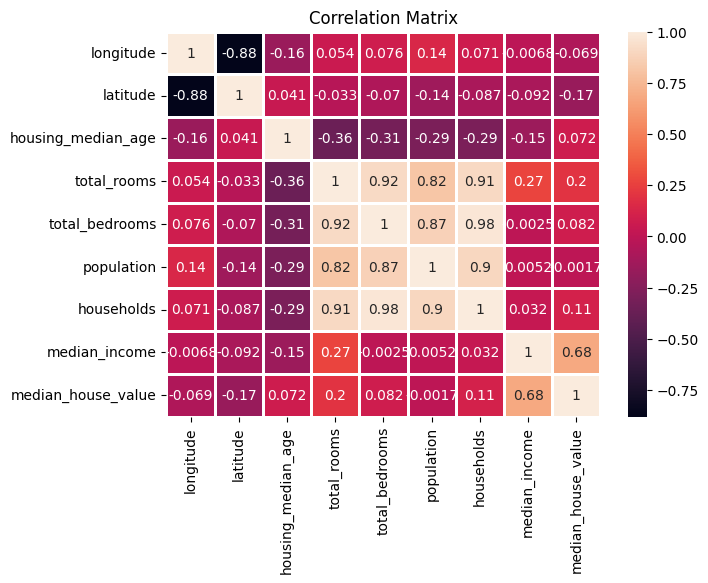

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(housing_num.corr(method='spearman'), annot=True, fmt='.2g',linewidths=2)
plt.title('Correlation Matrix')

#### B. Scatter plot setiap kolom numerik

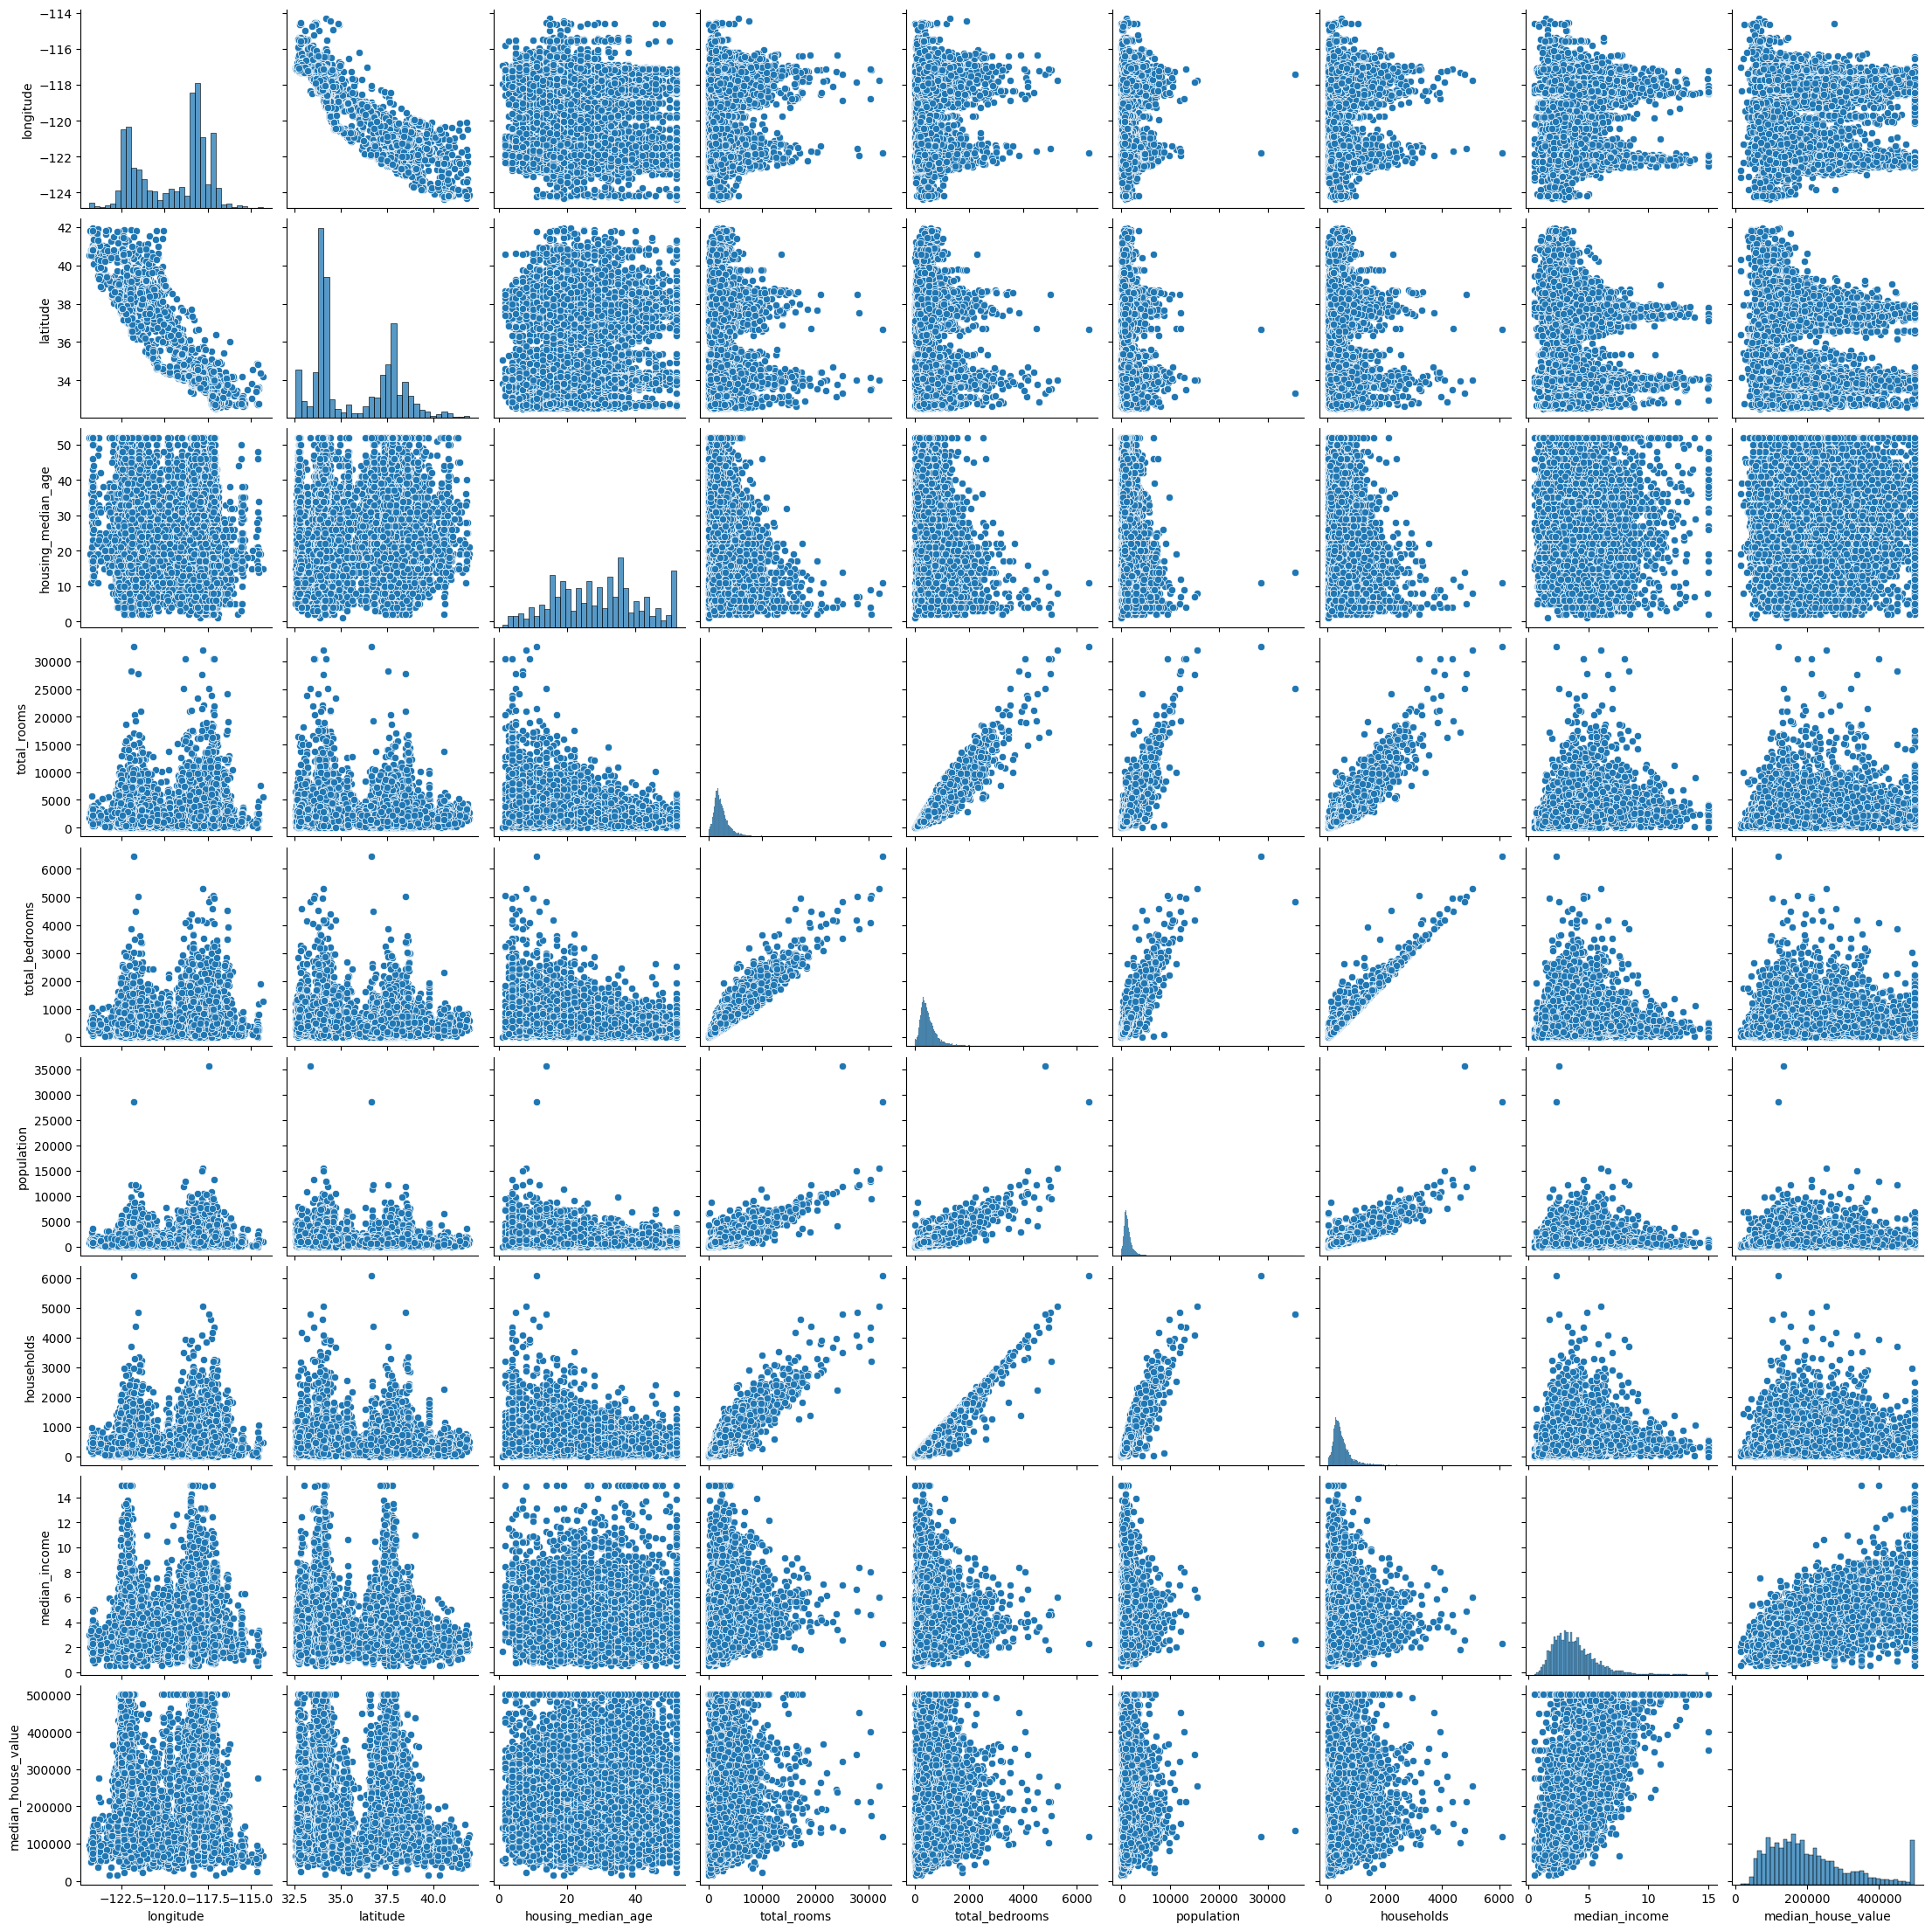

In [21]:
sns.pairplot(housing_num)
plt.show()

#### C. Multikolineartias dengan VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# buat function
def calc_vif(x):
    # dataframe kosong
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vig untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [23]:
vif_df = housing_num.drop(columns = 'median_house_value')
vif_df = vif_df.dropna()
calc_vif(vif_df).sort_values(by = 'VIF', ascending = False)

variables         VIF
0  longitude           613.687734
1  latitude            547.425622
4  total_bedrooms      89.793291 
6  households          85.916421 
3  total_rooms         30.797053 
5  population          15.615566 
7  median_income       8.302314  
2  housing_median_age  7.282420

Setelah dilakukan cek multikolinearitas dengan VIF bahwa variable longitude, latitude, total_bedrooms, households, total_rooms, population memiliki potensi multikolinearitas dengan nilai VIF lebih dari 10.

Variable yang memiliki nilai VIF lebih dari 10 akan dipertimbangan untuk dihapus. Kalau mau lebih aman dan eksploratif, maka dihapusnya hanya pada eksperimen dan akan dilihat hasil performa model nya.

**Kesimpulan dari Analisis Korelasi**

Dalam analisis data, hubungan antara variabel-variabel sering kali diukur menggunakan koefisien korelasi untuk memahami kekuatan dan arah hubungan antara mereka. Setelah melakukan analisis uji korelasi antar kolom dalam dataset, ditemukan beberapa hubungan signifikan antara variabel-variabel yang diuji. 

**1. Tingkat Korelasi Signifikan:** 
Semua hubungan yang teridentifikasi menunjukkan tingkat korelasi yang signifikan. Hubungan yang kuat antara beberapa kolom, seperti total_rooms dan total_bedrooms, serta population dan households, menunjukkan adanya pola yang konsisten dalam data.

**2. Pengaruh pada Analisis Selanjutnya:** 
Hubungan korelasi yang signifikan ini dapat memberikan wawasan penting untuk model analisis atau prediksi yang akan dikembangkan. Memahami korelasi ini dapat membantu dalam merancang model yang lebih akurat dan dalam melakukan interpretasi hasil analisis secara lebih mendalam.

**3. Pertimbangan untuk Model Analitik:** 
Kolom-kolom dengan korelasi tinggi mungkin berkontribusi pada multikolinearitas dalam model analitik, sehingga perlu dipertimbangkan dalam pemilihan teknik analisis atau pemodelan yang akan digunakan.

## E. Variable Kategorik

Pada bagian ini akan dilakukan pengecekan uji statistik untuk data kategorik.

### 1. Describe Data Kategorik

In [24]:
# Memilih data kategorik
housing_kat = housing.select_dtypes(exclude='number')
housing_kat

ocean_proximity
0      INLAND        
1      NEAR BAY      
2      <1H OCEAN     
3      <1H OCEAN     
4      INLAND        
...       ...        
14443  INLAND        
14444  INLAND        
14445  NEAR OCEAN    
14446  <1H OCEAN     
14447  INLAND        

[14448 rows x 1 columns]

In [25]:
housing_kat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  14448 non-null  object
dtypes: object(1)
memory usage: 113.0+ KB


In [26]:
housing_kat.describe().T

count unique        top  freq
ocean_proximity  14448  5      <1H OCEAN  6369

### 2. Unique Values data kategorik

In [27]:
pd.DataFrame({'Kolom':housing_kat.nunique().sort_values(ascending=False)})

Kolom
ocean_proximity  5

### 3. Value Counts

Melihat value counts dari setiap datanya dengan membuat grafik histogram

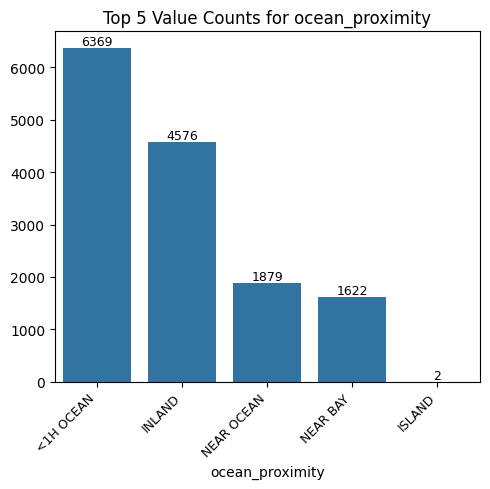

In [28]:
# Membuat barplot berdasarkan data ocean_proxility
plt.figure(figsize=(5,5))
for setiap_kolom in housing_kat.columns:
    value_counts = housing_kat[setiap_kolom].value_counts().head(5)
    
    # Membuat barplot
    sns.barplot(x=value_counts.index, y=value_counts.values)
    
    # Menambahkan label 
    for index, value in enumerate(value_counts.values):
        plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=9)
    
    # Melakukan rotasi label x
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.title(f'Top 5 Value Counts for {setiap_kolom}')
    plt.tight_layout()

**Kesimpulan dari analisis variable kategorik**

Berdasarkan visualisasi barplot diatas yang menggambarkan distribusi dalam kolom ocean_proximity, berikut adalah interpretasi dari distribusi Kategori ocean_proximity:

-   <1H OCEAN: Menjadi kategori yang paling dominan, dengan 6.369 entri, menunjukkan bahwa sebagian besar properti dalam dataset berada dalam jarak satu jam dari pantai. Ini menunjukkan preferensi atau keberadaan properti yang dekat dengan area pesisir.
-   INLAND: Dengan 4.576 entri, kategori ini adalah kategori kedua terbanyak. Properti yang termasuk dalam kategori ini terletak jauh dari pesisir, menandakan bahwa terdapat permintaan yang signifikan untuk properti yang tidak terletak di dekat pantai.
-   NEAR OCEAN: Terdapat 1.879 entri untuk kategori ini, menunjukkan bahwa cukup banyak properti berada di dekat pantai tetapi tidak langsung di pantai.
-   NEAR BAY: Dengan 1.622 entri, kategori ini mencakup properti yang terletak dekat dengan teluk, memberikan pandangan yang menarik tentang preferensi lokasi berbasis dekat teluk.
-   ISLAND: Kategori ini memiliki hanya 2 entri, menunjukkan bahwa properti yang benar-benar berada di pulau sangat jarang dalam dataset ini.

---

## F. Data Cleaning

Data Cleaning adalah proses memperbaiki atau menghapus data yang tidak akurat, tidak konsisten, atau tidak lengkap dalam dataset. Tujuannya adalah untuk memastikan kualitas data agar analisis dan model yang dibangun dapat memberikan hasil yang valid.

### 1. Missing Values

In [29]:
# Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'Missing Values':housing.isna().sum().sort_values(ascending=False)})
total_baris = len(housing)
missing['Percentage %'] = round((missing['Missing Values']/total_baris)*100,2)
missing

Missing Values  Percentage %
total_bedrooms      137             0.95        
longitude           0               0.00        
latitude            0               0.00        
housing_median_age  0               0.00        
total_rooms         0               0.00        
population          0               0.00        
households          0               0.00        
median_income       0               0.00        
ocean_proximity     0               0.00        
median_house_value  0               0.00

In [30]:
data_isna = housing[housing['total_bedrooms'].isna()]
data_isna

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
88    -121.47     38.61     31.0                1072.0      NaN               
119   -117.28     34.26     18.0                3895.0      NaN               
251   -117.61     34.08     12.0                4427.0      NaN               
340   -122.70     38.35     14.0                2313.0      NaN               
410   -122.42     40.44     16.0                994.0       NaN               
...       ...       ...      ...                  ...        ..               
13856 -117.96     34.03     35.0                2093.0      NaN               
13932 -117.87     33.83     27.0                2287.0      NaN               
13989 -118.40     34.17     24.0                6347.0      NaN               
14308 -118.55     34.19     18.0                5862.0      NaN               
14445 -121.90     36.58     31.0                1431.0      NaN               

       population  households  median_income ocean_proximity  \
88     781.0       281.0       1.6563         INLAND           
119    1086.0      375.0       3.3672         INLAND           
251    2400.0      843.0       4.7147         INLAND           
340    954.0       397.0       3.7813         <1H OCEAN        
410    495.0       181.0       2.1875         INLAND           
...      ...         ...          ...            ...           
13856  1755.0      403.0       3.4115         <1H OCEAN        
13932  1140.0      351.0       5.6163         <1H OCEAN        
13989  2945.0      1492.0      3.3545         <1H OCEAN        
14308  3161.0      1280.0      3.1106         <1H OCEAN        
14445  704.0       393.0       3.1977         NEAR OCEAN       

       median_house_value  
88     65800.0             
119    133600.0            
251    158700.0            
340    146500.0            
410    76400.0             
...        ...             
13856  150400.0            
13932  231000.0            
13989  221500.0            
14308  170600.0            
14445  289300.0            

[137 rows x 10 columns]

In [31]:
data_isna_update = data_isna.groupby('ocean_proximity')[['total_rooms','population','median_income','median_house_value']].sum()
data_isna_update

total_rooms  population  median_income  median_house_value
ocean_proximity                                                            
<1H OCEAN        175586.0     111058.0    279.9318       14944802.0        
INLAND           87221.0      44227.0     101.7497       4109600.0         
NEAR BAY         28171.0      13482.0     55.1441        3030001.0         
NEAR OCEAN       59486.0      31990.0     91.3838        6700903.0

In [32]:
pd.options.display.float_format = '{:.2f}'.format
df_isna = pd.DataFrame(data=data_isna[['total_rooms','population','median_income','median_house_value']].sum(), columns=['Jumlah'],index=['total_rooms','population','median_income','median_house_value'])

isna_list = []
for i in ['total_rooms','population','median_income','median_house_value']:
    isi = housing[i].sum()
    persen = round((df_isna.loc[i]/isi)*100,2)
    isna_list.append(persen)

df_isna['Persentase %'] = pd.DataFrame(isna_list)
df_isna

Jumlah  Persentase %
total_rooms        350464.00   0.92         
population         200757.00   0.97         
median_income      528.21      0.95         
median_house_value 28785306.00 0.96

**Analisis Missing Values pada Kolom total_bedrooms**

Dalam analisis data, penanganan missing values (nilai yang hilang) merupakan langkah penting untuk memastikan integritas dan akurasi model yang dibangun. Berdasarkan hasil analisis yang dilakukan, berikut adalah ringkasan terkait missing values pada kolom total_bedrooms serta perbandingannya dengan kolom-kolom lain dalam dataset:


**Jumlah dan Persentase Missing Values:**

-   Kolom total_bedrooms memiliki 137 baris data yang hilang. Persentase nilai hilang ini adalah 0.95% dari total jumlah data yang ada.

**Persentase Missing Values pada Kolom Lain:**

-   Kolom total_rooms menunjukkan jumlah missing values sebesar 0.92% dari total data.
-   Kolom population memiliki missing values dengan persentase sebesar 0.97% dari total data.
-   Kolom median_income mencatat missing values pada persentase 0.95% dari total data.
-   Kolom median_house_value menunjukkan missing values pada persentase 0.96% dari total data.
-   Dari hasil tersebut, dapat dilihat bahwa nilai-nilai hilang pada kolom total_bedrooms dan kolom-kolom lainnya berada pada tingkat yang relatif rendah, yakni di bawah 1% dari total data masing-masing kolom.


**Keputusan Penanganan Missing Values:**

Berdasarkan analisis persentase missing values yang rendah pada kolom-kolom lain termasuk kolom total_bedrooms dan mempertimbangkan dampaknya terhadap keseluruhan dataset, mengingat persentase missing values yang relatif kecil maka keputusan yang direkomendasikan adalah menghapus baris-baris yang mengandung data NaN pada kolom total_bedrooms. Hal ini bertujuan untuk menjaga kualitas dan konsistensi data tanpa mengurangi ukuran dataset yang signifikan.

In [33]:
df_housing = housing.dropna(subset=['total_bedrooms']).reset_index(drop=True)
df_housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -119.79    36.73     52.00               112.00       28.00             
1     -122.21    37.77     43.00               1017.00      328.00            
2     -118.04    33.87     17.00               2358.00      396.00            
3     -118.28    34.06     17.00               2518.00      1196.00           
4     -119.81    36.73     50.00               772.00       194.00            
...       ...      ...       ...                  ...          ...            
14306 -120.06    36.94     19.00               901.00       183.00            
14307 -121.26    38.27     20.00               1314.00      229.00            
14308 -120.89    37.48     27.00               1118.00      195.00            
14309 -117.93    33.62     34.00               2125.00      498.00            
14310 -115.56    32.80     15.00               1171.00      328.00            

       population  households  median_income ocean_proximity  \
0     193.00      40.00       1.98            INLAND           
1     836.00      277.00      2.26            NEAR BAY         
2     1387.00     364.00      6.30            <1H OCEAN        
3     3051.00     1000.00     1.72            <1H OCEAN        
4     606.00      167.00      2.22            INLAND           
...      ...         ...       ...               ...           
14306 700.00      190.00      2.24            INLAND           
14307 712.00      219.00      4.41            INLAND           
14308 647.00      209.00      2.91            INLAND           
14309 1052.00     468.00      5.63            <1H OCEAN        
14310 1024.00     298.00      1.39            INLAND           

       median_house_value  
0     47500.00             
1     100000.00            
2     285800.00            
3     175000.00            
4     59200.00             
...        ...             
14306 64300.00             
14307 144600.00            
14308 159400.00            
14309 484600.00            
14310 69400.00             

[14311 rows x 10 columns]

### 2. Outliers

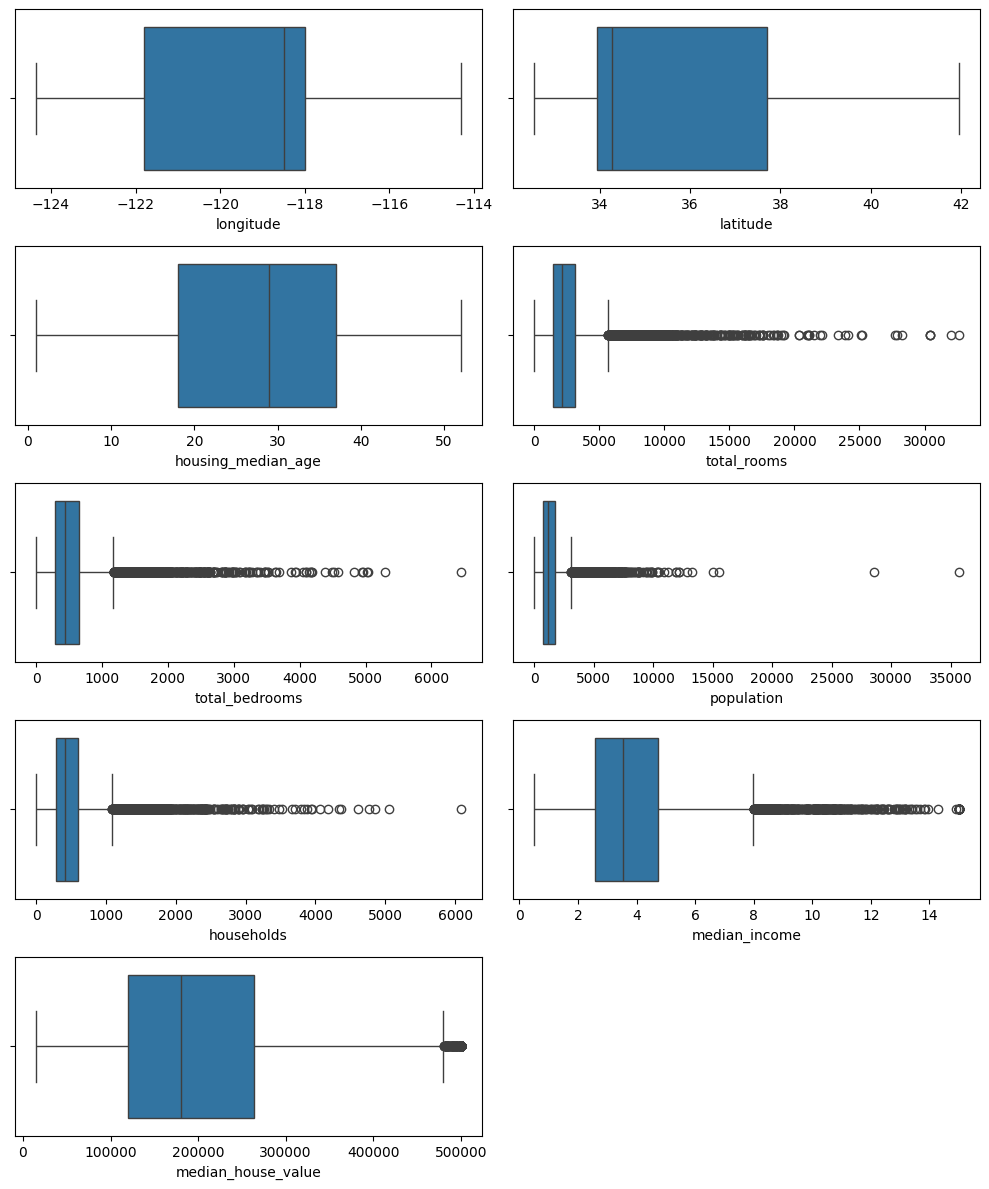

In [34]:
# Boxplot Outliers
plt.figure(figsize=(10,12))
posisi = 1
for setiap_kolom in housing_num.columns:
    plt.subplot(5,2,posisi)
    sns.boxplot(x=housing_num[setiap_kolom])
    posisi += 1
    plt.tight_layout()

<Axes: >

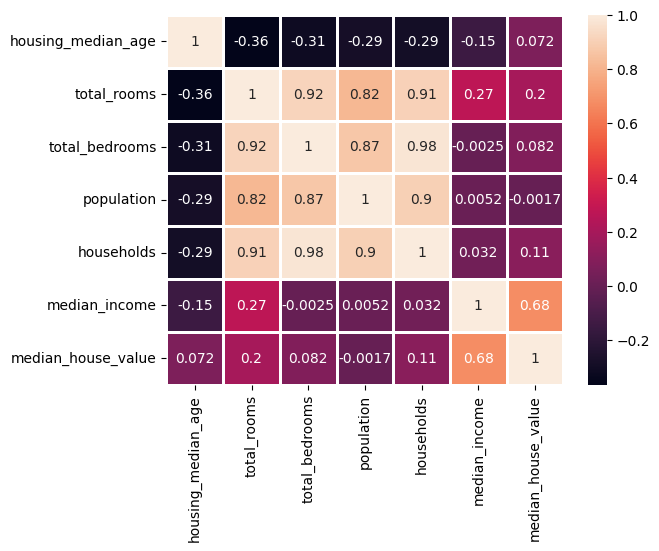

In [35]:
# Heatmap korelasi untuk melihat korelasi pada data yang memiliki outliers
df_corr = housing[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
sns.heatmap(df_corr.corr(method='spearman'), annot=True, fmt='.2g',linewidths=2)

**Penanganan Data Outliers**

Dalam tahap analisis data, pemeriksaan terhadap outliers dilakukan dengan menggunakan metode Box Plot, Interquartile Range (IQR), dan Z-Score. Temuan dari analisis ini menunjukkan adanya beberapa data yang teridentifikasi sebagai outliers. Meskipun demikian, keputusan untuk menangani data tersebut diambil dengan pertimbangan sebagai berikut:

**Identifikasi Outliers:**

Berdasarkan Box Plot, IQR, dan Z-Score, terdapat enam kolom yang menunjukkan adanya outliers, yaitu: total_rooms, total_bedrooms, population, households, median_income, dan median_house_value.

**Korelasi Antar Kolom:**
-   total_rooms memiliki korelasi sebesar 0.92 dengan total_bedrooms.
-   total_bedrooms menunjukkan korelasi sebesar 0.82 dengan population.
-   population memiliki korelasi sebesar 0.91 dengan households.
-   median_income memiliki korelasi sebesar 0.68 dengan median_house_value.

**Keputusan Penanganan Outliers:**

Setelah menganalisis boxplot dan uji korelasi, dapat disimpulkan bahwa kolom-kolom yang mengandung outliers tidak akan dihapus atau diubah.
Hal ini didasarkan pada fakta bahwa kolom-kolom tersebut memiliki tingkat korelasi yang signifikan, dengan nilai korelasi di atas 0.65, yang menunjukkan adanya hubungan positif yang substansial antara kolom-kolom tersebut.
Penghapusan atau modifikasi outliers dapat mempengaruhi konsistensi dan kualitas data, serta dapat mengubah hubungan yang signifikan antara variabel-variabel yang ada.

**Kesimpulan:**

Mengingat bahwa data outliers dalam konteks ini masih masuk akal dan relevan dengan domain masalah, serta bahwa outliers tersebut memiliki dampak signifikan pada analisis korelasi, data akan tetap diproses secara utuh. Keputusan ini diambil untuk menjaga integritas data dan memastikan bahwa informasi yang diperoleh dari data tetap akurat dan representatif.

### 3. Removing Data Duplicated

In [36]:
# menghapus data duplikat
print('Jumlah data sebelum duplikat dihapus: ', len(housing))
housing_remove = housing.drop_duplicates()
print('Jumlah data setelah duplikat dihapus: ', len(housing_remove))

Jumlah data sebelum duplikat dihapus:  14448
Jumlah data setelah duplikat dihapus:  14448


**Penanganan Data Duplikat**

Dalam proses pembersihan data, dilakukan pengecekan terhadap adanya data duplikat untuk memastikan kualitas dan keakuratan dataset. Berikut adalah hasil dari analisis data terkait duplikat:

**1. Jumlah Data Sebelum Penghapusan Duplikat:**

Total jumlah data sebelum proses penghapusan duplikat adalah 14,448 baris.

**2. Jumlah Data Setelah Penghapusan Duplikat:**

Setelah proses pengecekan dan penghapusan duplikat, jumlah data tetap 14,448 baris.

**3. Kesimpulan Data Duplikat:**

Berdasarkan hasil pengecekan, tidak ditemukan adanya data duplikat dalam dataset. Dengan kata lain, setiap baris data dalam dataset adalah unik dan tidak ada duplikasi data yang perlu dihapus.

---

## G. EDA (Exploratory Data Analysis)

Setelah menyelesaikan tahap pembersihan data, kami kini siap untuk memulai EDA (exploratory data analysis). Pada EDA kali ini, fokus utama adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi harga rumah, khususnya nilai median rumah (median_house_value). Analisis ini bertujuan untuk mengevaluasi dan memahami penyebab perbedaan harga rumah di California.

Dengan menganalisis data ini, kami berusaha untuk mengungkap faktor-faktor yang berkontribusi terhadap variasi harga rumah. Tujuan utama dari analisis ini adalah untuk memberikan wawasan mendalam mengenai penyebab perbedaan harga rumah dan untuk membantu para pemangku kepentingan dalam mengambil keputusan investasi yang lebih terinformasi dalam pembelian properti di California.

Berikut adalah struktur analisis yang akan diterapkan:

1. Perbedaan Harga Rumah Berdasarkan Lokasi

2. Pola Penggunaan Ruang Pada Rumah

3. Hubungan Antara Median Income dan Harga Rumah

4. Analisis Usia Rumah dan Nilai Properti

### 1. Perbedaan Harga Rumah Berdasarkan Lokasi

#### Scatterplot Perbedaan Harga Rumah Berdasarkan Lokasinya

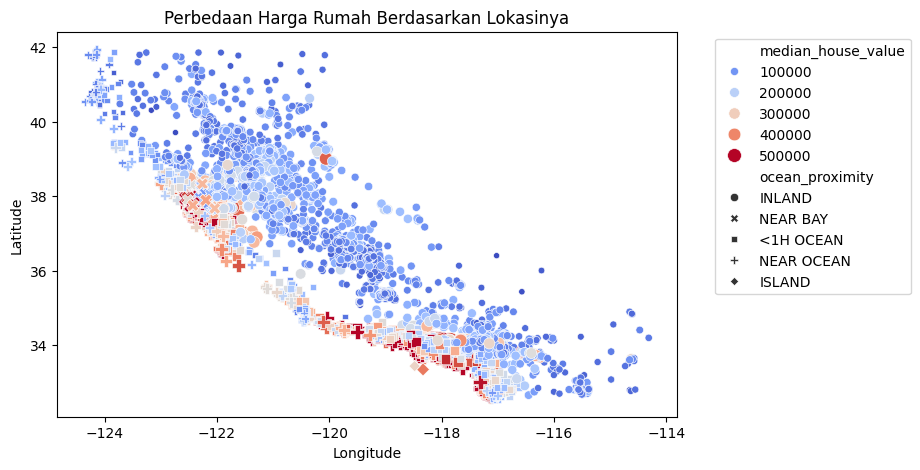

In [37]:
# 1. Perbedaan Harga Rumah Berdasarkan Daerahnya
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='median_house_value', 
    palette='coolwarm',        
    size='median_house_value', 
    sizes=(20,100),             
    style='ocean_proximity',  
    data=df_housing
)

plt.title('Perbedaan Harga Rumah Berdasarkan Lokasinya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Pada scatterplot yang ditampilkan, terlihat adanya pola yang membedakan harga rumah berdasarkan lokasinya. Analisis menunjukkan hal berikut:

1. Daerah INLAND: 
-   Daerah ini mendominasi hampir seluruh data dengan harga rumah (median_house_value) yang umumnya berkisar antara $50,000 hingga $200,000 USD. Ini menunjukkan     bahwa harga rumah di daerah INLAND relatif lebih rendah dibandingkan dengan daerah lainnya.

2. Daerah NEAR BAY: 
-   Daerah yang berada dekat dengan teluk menunjukkan pola dominasi di satu area tertentu dengan harga rumah yang berkisar antara $300,000 hingga $400,000 USD. Ini mengindikasikan bahwa harga rumah di daerah NEAR BAY cenderung lebih tinggi dibandingkan dengan daerah lainnya.

3. Daerah <1H OCEAN:
-   Daerah yang mendekati pantai menunjukkan pola penyebaran harga yang cukup luas, dengan harga rumah fluktuatif dalam rentang $100,000 hingga $500,000 USD. Fluktuasi harga yang signifikan di daerah ini mungkin dipengaruhi oleh faktor-faktor tertentu yang mempengaruhi variasi harga rumah.

4. Daerah NEAR OCEAN: 
-   Daerah pinggir pantai memiliki pola penyebaran harga yang lebih luas, dengan harga rumah berkisar antara $200,000 hingga $500,000 USD. Meskipun pola penyebaran harga rumah di daerah NEAR OCEAN mirip dengan daerah mendekati pantai, harga rumah di NEAR OCEAN umumnya lebih tinggi.

5. Daerah ISLAND: 
-   Pola penyebaran harga rumah di daerah pulau terbatas pada beberapa titik saja, disebabkan oleh jumlah rumah yang relatif sedikit di pulau-pulau California. Harga rumah di daerah pulau berkisar antara $300,000 hingga $400,000 USD. Harga rumah di daerah pulau tidak mencapai kisaran tertinggi pada dataset ini, yang mungkin disebabkan oleh faktor-faktor tertentu yang membatasi harga rumah di daerah kepulauan.

Dari analisis data yang tersedia, terlihat adanya perbedaan harga rumah yang signifikan di berbagai daerah di California. Sebagai contoh, daerah inland menunjukkan rentang harga yang relatif lebih rendah dibandingkan dengan wilayah lain, sedangkan daerah Near Bay memiliki rentang harga minimal yang mencapai 300,000 USD. Harga ini adalah harga rumah minimal tertinggi di antara daerah-daerah lainnya. Hal ini dapat dipahami mengingat bahwa daerah Near Bay seringkali memiliki daya tarik yang lebih tinggi karena kedekatannya dengan pantai dan fasilitas-fasilitas utama.

Di sisi lain, daerah Near Ocean mencatat rentang harga rumah tertinggi. Kenaikan harga ini dapat dijelaskan oleh fakta bahwa kawasan pinggir pantai seringkali merupakan area wisata yang sangat diminati, sehingga harga jualnya cenderung lebih tinggi. Berbeda dengan daerah Islands, yang memiliki rentang harga lebih rendah dibandingkan dengan kawasan pinggir pantai. Rendahnya harga ini mungkin disebabkan oleh kurangnya minat pembelian rumah di daerah kepulauan, seperti yang tercermin dari jumlah data rumah yang terbatas, hanya dua data dalam dataset ini.

Dalam analisis ini, fokus utama akan diarahkan untuk memproyeksikan harga rumah di masa depan berdasarkan data yang ada pada dataset California Housing. Tujuan dari proyeksi ini adalah untuk memberikan pemahaman yang lebih baik tentang nilai pasar rumah di California, yang pada gilirannya dapat meminimalkan risiko investasi dan menyediakan dasar keputusan yang lebih baik bagi para developer dan investor. Dengan informasi ini, developer dapat membuat keputusan yang lebih cerdas dalam perencanaan dan pengembangan perumahan, serta menghindari potensi kerugian finansial yang mungkin timbul dari investasi yang kurang terinformasi.

Melalui analisis yang mendalam dan proyeksi yang akurat, diharapkan investor dan developer dapat merancang strategi yang lebih efektif untuk menghadapi dinamika pasar perumahan di California, sehingga dapat memaksimalkan potensi keuntungan dan meminimalkan risiko yang terkait dengan investasi di sektor properti.

#### Statistik Deskriptif

In [38]:
# Melihat deskripsi dari median_house_value
df_housing[['median_house_value']].describe().T

count      mean       std      min       25%       50%  \
median_house_value 14311.00 206793.16 115404.37 14999.00 119400.00 180000.00   

                         75%       max  
median_house_value 263750.00 500001.00

#### Grafik Histogram

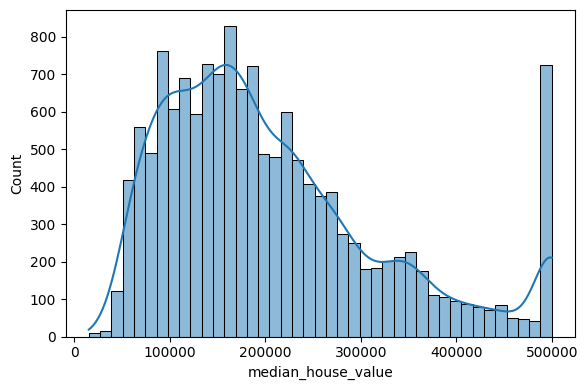

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['median_house_value'],kde=True)
plt.tight_layout()

Berdasarkan uji distribusi data yang telah dilakukan, dapat disimpulkan bahwa data menunjukkan penyebaran yang tidak normal. Data cenderung memiliki distribusi yang menyebar luas menuju nilai maksimum, yang mengindikasikan adanya skewness ke kanan (right skewness).

Skewness Ke Kanan: Skewness ke kanan berarti bahwa sebagian besar data terpusat pada nilai yang lebih rendah, sementara ekor distribusi panjang dan menyebar ke arah nilai yang lebih tinggi. Dalam konteks harga rumah, ini menunjukkan bahwa sebagian besar rumah mungkin memiliki harga yang relatif rendah, dengan beberapa rumah yang memiliki harga yang sangat tinggi yang mempengaruhi distribusi keseluruhan.

Uji statistik normalitas shapiro wilk dan d'agustino pearson

In [40]:
# Shapiro Wilk
from scipy.stats import shapiro

stat, pval = shapiro(df_housing['median_house_value'])

if pval > 0.05:
    print(f'Berdasarkan uji statistik Shapiro Wilk pada data median_house_value')
    print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
else:
    print(f'Berdasarkan uji statistik Shapiro Wilk pada data median_house_value')
    print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik Shapiro Wilk pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
# D'Agustino Pearson
from scipy.stats import normaltest

stat, pval = normaltest(df_housing['median_house_value'])

if pval > 0.05:
    print(f"Berdasarkan uji statistik D'Agustino Pearson pada data median_house_value")
    print(f"Data berdistribusi normal dengan Pval {round(pval,3)}\n")
else:
    print(f"Berdasarkan uji statistik D'Agustino Pearson pada data median_house_value")
    print(f"Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n")

Berdasarkan uji statistik D'Agustino Pearson pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



Setelah dilakukan uji statistik maka dapat dilihat bahwa median_house_value berdistribusi tidak normal, oleh karena itu pada saat uji hipotesis akan menggunakan uji non parametrik.

#### Variable Kategorik

In [42]:
# Melihat deskripsi dari 
df_housing[['ocean_proximity']].describe().T

count unique        top  freq
ocean_proximity  14311  5      <1H OCEAN  6300

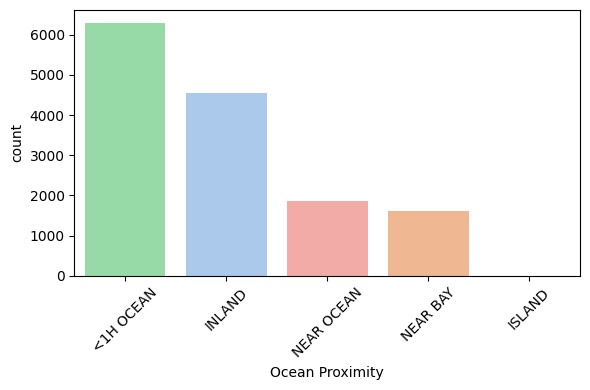

In [43]:
category_counts = df_housing['ocean_proximity'].value_counts()
category_order = category_counts.index

plt.figure(figsize=(6, 4))
sns.countplot(
    x='ocean_proximity', 
    data=df_housing,
    order=category_order,
    palette='pastel',  
    hue='ocean_proximity' 
)

plt.xlabel('Ocean Proximity')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Berdasarkan grafik yang disajikan, dapat dilihat bahwa daerah Near Ocean mencatat jumlah perumahan tertinggi dibandingkan dengan daerah-daerah lainnya di California. Hal ini dapat dipahami karena kawasan Near Ocean memiliki lokasi strategis yang menggabungkan akses ke pantai dengan kedekatan ke pusat-pusat perkotaan, menjadikannya area yang sangat diinginkan dan populer untuk pengembangan perumahan.

Selanjutnya, daerah Inland menempati urutan kedua dalam hal jumlah perumahan. Fenomena ini wajar mengingat daerah Inland menawarkan harga rumah yang relatif lebih rendah dibandingkan dengan daerah lain di California, menjadikannya lebih terjangkau dan menarik bagi calon pembeli rumah.

Di urutan ketiga adalah daerah Near Ocean, yang menunjukkan jumlah perumahan yang lebih sedikit dibandingkan dengan Inland Empire. Hal ini mungkin disebabkan oleh harga rumah yang tinggi di kawasan tersebut, yang membatasi kemampuan pengembangan perumahan lebih lanjut.

Daerah Near Bay berada di urutan keempat, dengan jumlah perumahan yang lebih sedikit dibandingkan dengan Near Ocean. Hal ini dapat dijelaskan oleh fakta bahwa kawasan pinggir teluk juga memiliki harga perumahan yang tinggi dan keterbatasan lahan, yang mempengaruhi volume pengembangan perumahan.

Terakhir, daerah Island berada di urutan terakhir dalam hal jumlah perumahan, dengan hanya dua data yang tersedia. Kondisi ini dapat dijelaskan oleh berbagai faktor, termasuk keterbatasan aksesibilitas, biaya hidup yang tinggi, dan fleksibilitas rendah untuk tinggal di kepulauan. Faktor-faktor ini secara signifikan membatasi jumlah perumahan dan minat terhadap pengembangan di daerah kepulauan.



Membuat variable baru dengan menampilkan ocean_proximity dan median_house_value agar dapat dilakukan uji hipotesis

In [44]:
stat_1 = df_housing[['ocean_proximity','median_house_value']]
stat_1

ocean_proximity  median_house_value
0      INLAND         47500.00           
1      NEAR BAY       100000.00          
2      <1H OCEAN      285800.00          
3      <1H OCEAN      175000.00          
4      INLAND         59200.00           
...       ...              ...           
14306  INLAND         64300.00           
14307  INLAND         144600.00          
14308  INLAND         159400.00          
14309  <1H OCEAN      484600.00          
14310  INLAND         69400.00           

[14311 rows x 2 columns]

Uji Hipotesis untuk Menganalisis Apakah Ada Perbedaan Harga Rumah Disetiap Daerah California
-   1. Hipotesis Nol (H0):
    -   H0 : Tidak ada perbedaan harga rumah pada setiap daerah yang ada di california.
-   2. Hipotesis Alternatif (Ha):
    -   Ha : Terdapat perbedaan dalam harga rumah setidaknya satu daerah di California.

Metode Uji Statistik
-   Untuk menguji hipotesis di atas, akan digunakan Uji F-Test Anova. Uji ini dipilih karena data yang yang di uji tidak berdistribusi normal (non-parametric) dan uji ini memiliki kemampuannya untuk membandingkan lebih dari 2 variable independen yang tidak memerlukan asumsi distribusi normal.

Variabel yang Digunakan:
-   X: ocean_proximity ( daerah perumahan di california )
-   Y: median_house_value ( harga rumah pada masing-masing daerah )

In [45]:
from scipy.stats import f_oneway

# cek dengan uji statistika

H0 = 'Tidak ada perbedaan harga rumah pada setiap daerah yang ada di california.'
Ha = 'Terdapat perbedaan dalam harga rumah setidaknya satu daerah di California.'

stats, pval = f_oneway(stat_1[stat_1['ocean_proximity']=='INLAND']['median_house_value'],
                       stat_1[stat_1['ocean_proximity']=='NEAR BAY']['median_house_value'],
                       stat_1[stat_1['ocean_proximity']=='<1H OCEAN']['median_house_value'],
                       stat_1[stat_1['ocean_proximity']=='NEAR OCEAN']['median_house_value'],
                       stat_1[stat_1['ocean_proximity']=='ISLAND']['median_house_value'])

if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Terdapat perbedaan dalam harga rumah setidaknya satu daerah di California. (pvalue = 0.0)


**Kesimpulan:**

Berdasarkan hasil uji F-Test ANOVA, dengan p-value yang sangat rendah (P-Value: 0.0), terdapat cukup bukti untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (Ha). Hal ini menunjukkan bahwa terdapat perbedaan signifikan dalam harga rumah di setidaknya satu daerah di California.


**Interpretasi:**

Hasil uji ANOVA mengindikasikan bahwa ada perbedaan yang signifikan dalam harga rumah di antara daerah-daerah yang dianalisis di California. Dengan kata lain, rata-rata harga rumah di setidaknya satu daerah berbeda secara signifikan dibandingkan dengan rata-rata harga rumah di daerah lainnya. Temuan ini menunjukkan bahwa harga rumah tidak seragam di seluruh wilayah California, dan setiap daerah memiliki karakteristik harga yang unik.


**Implikasi:**

Perbedaan signifikan ini menunjukkan bahwa harga rumah di California bervariasi secara substansial antar daerah. Implikasi dari temuan ini adalah bahwa investor dan pengembang harus mempertimbangkan perbedaan harga ini dalam perencanaan investasi dan pengembangan properti. Perbedaan harga yang besar antar daerah dapat mempengaruhi strategi investasi, seperti keputusan tentang lokasi pembangunan dan penetapan harga jual.



### 2. Pola Penggunaan Ruang Pada Rumah

Scatterplot Pola Penggunaan Ruang Pada Rumah

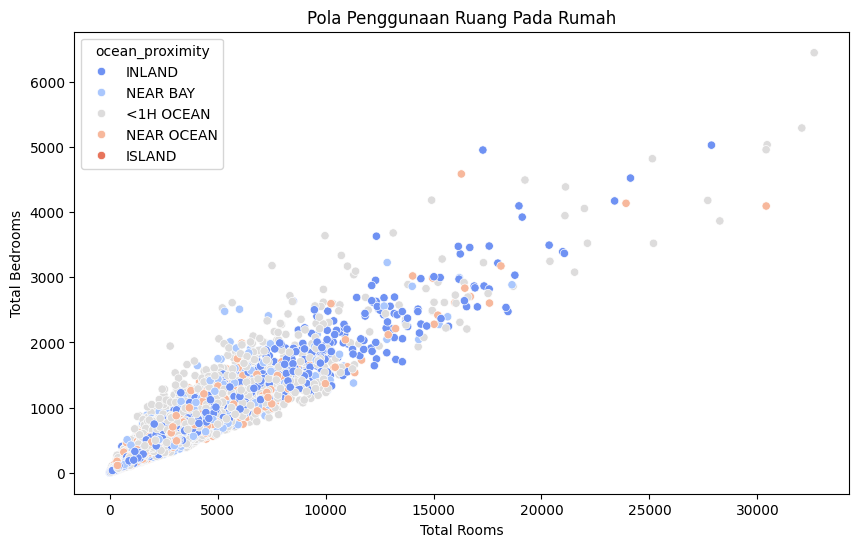

In [46]:
# 2. Pola Penggunaan Ruang dalam Rumah
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='total_bedrooms', hue='ocean_proximity', palette='coolwarm', data=df_housing)
plt.title('Pola Penggunaan Ruang Pada Rumah')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

Heatmap Korelasi antara total_rooms dengan total_bedrooms

<Axes: >

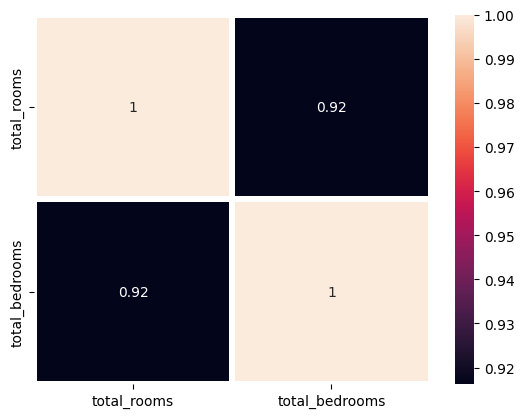

In [47]:
room_corr = df_housing[['total_rooms','total_bedrooms']]
sns.heatmap(room_corr.corr(method='spearman'), annot=True, fmt='.2g',linewidths=4)

Dari scatterplot dan analisis korelasi yang disajikan, terlihat adanya hubungan linear yang signifikan antara total_rooms dan total_bedrooms, dengan koefisien korelasi sebesar 0.92. Nilai korelasi yang tinggi ini menunjukkan adanya hubungan positif yang kuat antara kedua variabel tersebut. Dengan kata lain, perubahan dalam jumlah total ruangan (total_rooms) secara konsisten berkorelasi dengan perubahan jumlah kamar tidur (total_bedrooms). Semakin banyak jumlah total ruangan dalam sebuah rumah, semakin tinggi pula jumlah kamar tidur yang tersedia. Hal ini sejalan dengan prinsip umum bahwa rumah dengan lebih banyak ruangan umumnya memiliki lebih banyak kamar tidur, mengingat peran penting ruang tambahan dalam penataan dan fungsi rumah.

Lebih lanjut, analisis menunjukkan bahwa daerah <1H OCEAN memiliki sebaran total_rooms dan total_bedrooms yang tinggi. Hal ini konsisten dengan temuan sebelumnya yang menunjukkan bahwa daerah <1H OCEAN merupakan wilayah dengan volume perumahan yang besar dan rentang harga yang tinggi. Daerah ini menunjukkan variasi yang signifikan dalam kedua variabel tersebut, yang menunjukkan bahwa rumah-rumah di kawasan ini cenderung memiliki banyak ruangan dan kamar tidur, berkontribusi pada tingginya harga pasar properti di wilayah tersebut.

Berdasarkan analisis ini, dapat disimpulkan bahwa total_rooms dan total_bedrooms adalah variabel penting yang mempengaruhi harga rumah. Rumah-rumah dengan jumlah ruangan dan kamar tidur yang lebih banyak cenderung memiliki harga yang lebih tinggi, yang menunjukkan bahwa karakteristik ruang dalam rumah berperan signifikan dalam penentuan harga pasar.

Oleh karena itu, dalam penilaian harga rumah dan perencanaan investasi, penting untuk mempertimbangkan kedua variabel ini. Variasi dalam total_rooms dan total_bedrooms dapat memberikan wawasan tambahan tentang potensi harga rumah dan membantu dalam pengambilan keputusan investasi yang lebih tepat.

#### Statistik Deskriptif

In [48]:
# Melihat deskripsi dari median_house_value
room_corr.describe().T

count    mean     std  min     25%     50%     75%      max
total_rooms    14311.00 2640.92 2197.19 2.00 1452.00 2125.00 3142.00 32627.00
total_bedrooms 14311.00 538.26  423.58  1.00 295.00  435.00  647.00  6445.00

#### Grafik Histogram

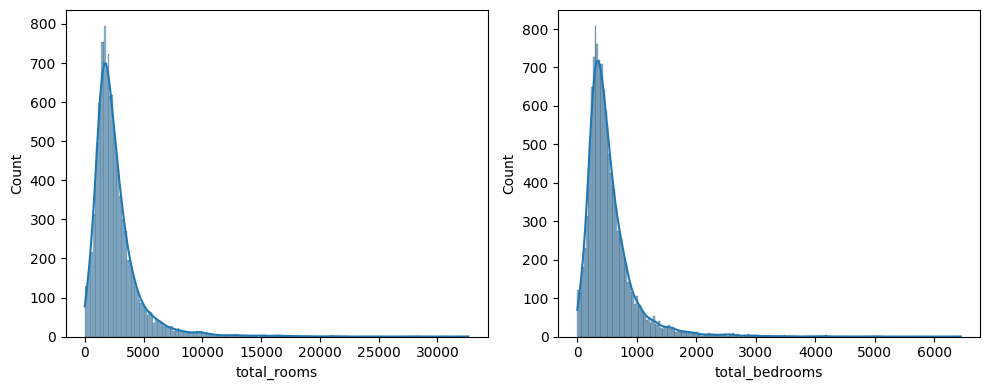

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(room_corr['total_rooms'],kde=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.histplot(room_corr['total_bedrooms'],kde=True)
plt.tight_layout()


Berdasarkan uji distribusi data yang telah dilakukan, dapat disimpulkan bahwa data menunjukkan penyebaran yang tidak normal. Data cenderung memiliki distribusi yang menyebar luas menuju nilai maksimum, yang mengindikasikan adanya skewness ke kanan (right skewness).

Skewness Ke Kanan: Skewness ke kanan berarti bahwa sebagian besar data terpusat pada nilai yang lebih rendah, sementara ekor distribusi panjang dan menyebar ke arah nilai yang lebih tinggi. Dalam konteks harga rumah, ini menunjukkan bahwa sebagian besar rumah mungkin memiliki harga yang relatif rendah, dengan beberapa rumah yang memiliki harga yang sangat tinggi yang mempengaruhi distribusi keseluruhan.

Uji statistik normalitas shapiro wilk dan d'agustino pearson

In [50]:
# Shapiro Wilk
from scipy.stats import shapiro

for i in room_corr.columns:
    stat, pval = shapiro(room_corr[i])

    if pval > 0.05:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
    else:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik Shapiro Wilk pada data total_rooms
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Shapiro Wilk pada data total_bedrooms
Data tidak berdistribusi normal dengan Pval 0.0



c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
# D'Agustino Pearson
from scipy.stats import normaltest

for i in room_corr.columns:
    stat, pval = normaltest(room_corr[i])

    if pval > 0.05:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data berdistribusi normal dengan Pval {round(pval,3)}\n")
    else:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n")

Berdasarkan uji statistik D'Agustino Pearson pada data total_rooms
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik D'Agustino Pearson pada data total_bedrooms
Data tidak berdistribusi normal dengan Pval 0.0



Setelah dilakukan uji statistik maka dapat dilihat bahwa total_rooms dan total_bedrooms berdistribusi tidak normal, oleh karena itu pada saat uji hipotesis akan menggunakan uji non parametrik.

Uji Hipotesis untuk Menganalisis Apakah Ada Perbedaan Yang Signifikan Antara Total Ruangan Dengan Total Kamar Pada Perumahan di California
-   1. Hipotesis Nol (H0):
    -   H0 : Tidak adanya perbedaan yang signifikan antara total ruangan dengan total kamar pada perumahan di california.
-   2. Hipotesis Alternatif (Ha):
    -   Ha : Terdapat perbedaan yang signifikan antara total ruangan dengan total kamar pada perumahan di california.

Metode Uji Statistik
-   Untuk menguji hipotesis di atas, akan digunakan Uji Mann-Whitneyu Two Tail. Uji ini dipilih karena data yang yang di uji tidak berdistribusi normal (non-parametric) dan uji ini memiliki kemampuannya untuk membandingkan dua kelompok independen yang tidak memerlukan asumsi distribusi normal, serta dapat menangani ketidak seimbangan ukuran sampel antara kelompok.

Variabel yang Digunakan:
-   X: Total kamar tidur.
-   Y: Total Ruangan.

In [52]:
from scipy.stats import mannwhitneyu

# cek dengan uji statistika

H0 = 'Tidak adanya perbedaan yang signifikan antara total ruangan dengan total kamar pada perumahan di california.'
Ha = 'Terdapat perbedaan yang signifikan antara total ruangan dengan total kamar pada perumahan di california.'

stat, pval = mannwhitneyu(room_corr['total_rooms'],
                          room_corr['total_bedrooms'])
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Terdapat perbedaan yang signifikan antara total ruangan dengan total kamar pada perumahan di california. (pvalue = 0.0)


**Kesimpulan:**

Berdasarkan hasil uji hipotesis, dengan p-value yang sangat rendah (P-Value: 0.0), hipotesis nol (H0) ditolak, yang berarti ada cukup bukti untuk menerima hipotesis alternatif (Ha). Temuan ini menunjukkan bahwa terdapat perbedaan signifikan antara total ruangan (total_rooms) dan total kamar tidur (total_bedrooms) pada perumahan di California.


**Interpretasi:**

Hasil uji hipotesis mengindikasikan bahwa hubungan antara total ruangan dan total kamar tidur di perumahan California bukanlah kebetulan belaka. Dengan p-value 0.0, yang jauh di bawah batas signifikansi standar, kita dapat menyimpulkan bahwa perbedaan dalam jumlah total ruangan secara signifikan mempengaruhi jumlah kamar tidur yang tersedia di setiap rumah. Ini berarti bahwa jumlah ruangan dan kamar tidur memiliki hubungan yang sangat kuat dan konsisten di seluruh wilayah California. Hasil ini menunjukkan bahwa rumah dengan lebih banyak total ruangan cenderung memiliki lebih banyak kamar tidur, dan hubungan ini cukup signifikan secara statistik.


**Implikasi:**

Temuan ini penting bagi investor dan pengembang properti di California. Karena hubungan antara total ruangan dan kamar tidur menunjukkan perbedaan signifikan, investor harus mempertimbangkan variabel ini dalam perencanaan investasi. Rumah dengan lebih banyak ruangan kemungkinan akan menawarkan lebih banyak kamar tidur dan, dengan demikian, bisa memiliki nilai pasar yang lebih tinggi.

### 3. Hubungan Antara Median Income dan Harga Rumah

Scatterplot Hubungan Median Income Dengan Median House Value

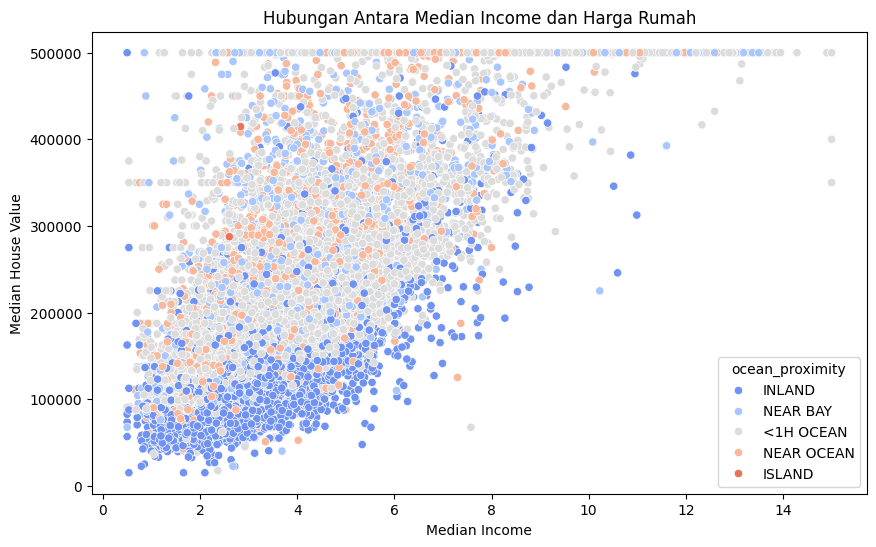

In [53]:
# 3. Hubungan Antara Median Income dan Harga Rumah
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing, hue='ocean_proximity',palette='coolwarm')
plt.title('Hubungan Antara Median Income dan Harga Rumah')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Heatmap Korelasi antara Median Income dengan Median House Value

<Axes: >

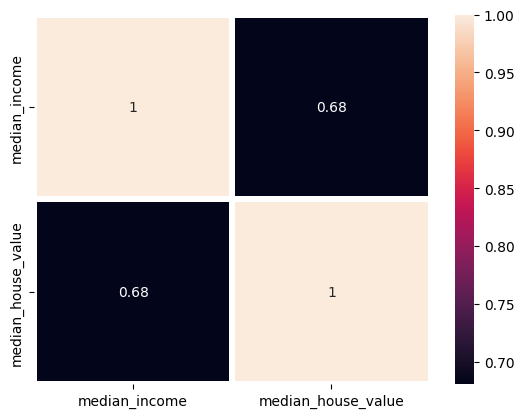

In [54]:
room_corr = df_housing[['median_income','median_house_value']]
sns.heatmap(room_corr.corr(method='spearman'), annot=True, fmt='.2g',linewidths=4)

Dari scatterplot dan analisis korelasi yang disajikan, terdapat hubungan linear yang signifikan antara median_income dan median_house_value, dengan koefisien korelasi positif sebesar 0.68. Nilai korelasi yang tinggi ini menunjukkan adanya hubungan positif yang kuat antara kedua variabel tersebut. Secara spesifik, perubahan dalam median_income secara konsisten berkorelasi dengan perubahan dalam median_house_value. Artinya, semakin tinggi median_income, semakin tinggi pula median_house_value suatu rumah. Hal ini mencerminkan pola di mana individu dengan pendapatan yang lebih tinggi cenderung mencari properti dengan harga yang lebih tinggi, seringkali karena kebutuhan akan kenyamanan dan kualitas hidup yang lebih baik.

Analisis menunjukkan bahwa daerah <1H OCEAN tidak hanya memiliki sebaran median_income yang tinggi tetapi juga harga rumah yang relatif tinggi. Daerah ini mendominasi pola yang ada, sesuai dengan temuan sebelumnya yang menunjukkan bahwa daerah <1H OCEAN merupakan kawasan dengan volume perumahan yang besar, banyak ruangan, dan rentang harga yang tinggi. Daerah ini berada di posisi strategis antara kawasan pantai dan pusat kota, memberikan fleksibilitas tinggi dalam akses ke berbagai wilayah di California. Hal ini mencerminkan bahwa individu yang tinggal di daerah ini cenderung memiliki pendapatan yang tinggi dan memilih properti yang lebih nyaman, yang pada gilirannya berkontribusi pada tingginya harga pasar properti di wilayah tersebut. Sebaliknya, analisis untuk daerah INLAND menunjukkan bahwa sebaran median_income lebih terfokus pada nilai rendah hingga menengah. Ini mengindikasikan bahwa individu di daerah ini umumnya memiliki median_income yang relatif rendah dibandingkan dengan wilayah lain. Untuk wilayah lainnya, terdapat sebaran yang luas dalam median_income, menunjukkan adanya variasi dalam median_income. Individu yang tinggal di daerah-daerah ini memiliki fluktuasi pada median_incomenya yang dapat mencerminkan perbedaan dalam karakteristik ekonomi lokal dan kondisi pasar properti yang beragam.


**Kesimpulan:**

Berdasarkan analisis ini, dapat disimpulkan bahwa median_income adalah variabel yang signifikan dalam mempengaruhi median_house_value. Pendapatan yang lebih tinggi cenderung berhubungan dengan harga rumah yang lebih tinggi, menunjukkan bahwa karakteristik pendapatan berperan penting dalam penentuan harga pasar properti.

#### Statistik Deskriptif

In [55]:
# Melihat deskripsi dari median_house_value
room_corr.describe().T

count      mean       std      min       25%       50%  \
median_income      14311.00 3.87      1.89      0.50     2.57      3.54        
median_house_value 14311.00 206793.16 115404.37 14999.00 119400.00 180000.00   

                         75%       max  
median_income      4.74      15.00      
median_house_value 263750.00 500001.00

#### Grafik Histogram

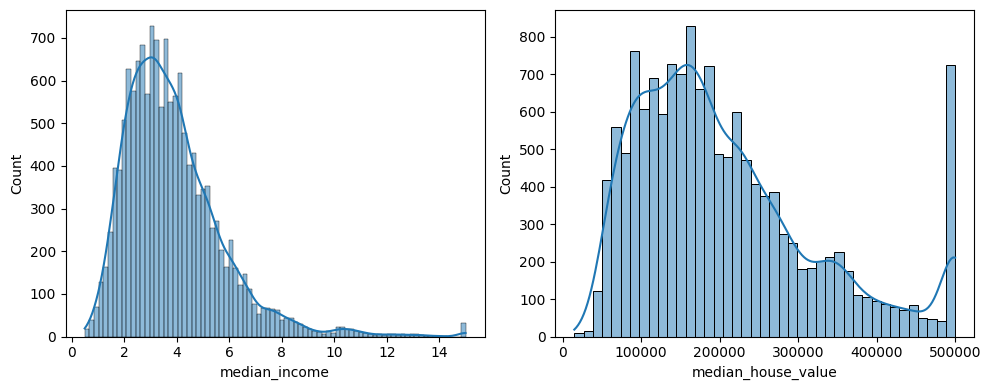

In [56]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(room_corr['median_income'],kde=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.histplot(room_corr['median_house_value'],kde=True)
plt.tight_layout()


Berdasarkan uji distribusi data yang telah dilakukan, dapat disimpulkan bahwa data menunjukkan penyebaran yang tidak normal. Data cenderung memiliki distribusi yang menyebar luas menuju nilai maksimum, yang mengindikasikan adanya skewness ke kanan (right skewness).

Skewness Ke Kanan: Skewness ke kanan berarti bahwa sebagian besar data terpusat pada nilai yang lebih rendah, sementara ekor distribusi panjang dan menyebar ke arah nilai yang lebih tinggi. Dalam konteks harga rumah, ini menunjukkan bahwa sebagian besar rumah mungkin memiliki harga yang relatif rendah, dengan beberapa rumah yang memiliki harga yang sangat tinggi yang mempengaruhi distribusi keseluruhan.

Uji statistik normalitas shapiro wilk dan d'agustino pearson

In [57]:
# Shapiro Wilk
from scipy.stats import shapiro

for i in room_corr.columns:
    stat, pval = shapiro(room_corr[i])

    if pval > 0.05:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
    else:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik Shapiro Wilk pada data median_income
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Shapiro Wilk pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
# D'Agustino Pearson
from scipy.stats import normaltest

for i in room_corr.columns:
    stat, pval = normaltest(room_corr[i])

    if pval > 0.05:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data berdistribusi normal dengan Pval {round(pval,3)}\n")
    else:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n")

Berdasarkan uji statistik D'Agustino Pearson pada data median_income
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik D'Agustino Pearson pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



Setelah dilakukan uji statistik maka dapat dilihat bahwa median_income dan median_house_value berdistribusi tidak normal, oleh karena itu pada saat uji hipotesis akan menggunakan uji non parametrik.

Uji Hipotesis untuk Menganalisis Apakah Ada Perbedaan Yang Signifikan Antara median_income Dengan median_house_value Pada Perumahan di California
-   1. Hipotesis Nol (H0):
    -   H0 : Tidak adanya perbedaan yang signifikan antara median income dengan harga rumah di california.
-   2. Hipotesis Alternatif (Ha):
    -   Ha : Terdapat perbedaan yang signifikan antara median income dengan harga rumah di california.

Metode Uji Statistik
-   Untuk menguji hipotesis di atas, akan digunakan Uji Mann-Whitneyu Two Tail. Uji ini dipilih karena data yang yang di uji tidak berdistribusi normal (non-parametric) dan uji ini memiliki kemampuannya untuk membandingkan dua kelompok independen yang tidak memerlukan asumsi distribusi normal, serta dapat menangani ketidak seimbangan ukuran sampel antara kelompok.

Variabel yang Digunakan:
-   X: Median Income.
-   Y: Harga Rumah.

In [59]:
from scipy.stats import mannwhitneyu

# cek dengan uji statistika

H0 = 'Tidak adanya perbedaan yang signifikan antara median income dengan harga rumah di california.'
Ha = 'Terdapat perbedaan yang signifikan antara median income dengan harga rumah di california.'

stat, pval = mannwhitneyu(room_corr['median_income'],
                          room_corr['median_house_value'])
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Terdapat perbedaan yang signifikan antara median income dengan harga rumah di california. (pvalue = 0.0)


**Kesimpulan:**

Berdasarkan hasil uji hipotesis, dengan p-value yang sangat rendah (P-Value: 0.0), hipotesis nol (H0) ditolak. Hal ini menunjukkan bahwa terdapat cukup bukti untuk menerima hipotesis alternatif (Ha). Temuan ini mengindikasikan adanya perbedaan yang signifikan antara median_income dan median_house_value pada perumahan di California.


**Interpretasi:**

Hasil uji hipotesis mengindikasikan bahwa hubungan antara median_income dan median_house_value bukanlah kebetulan belaka. Dengan p-value 0.0, yang jauh di bawah batas signifikansi standar, kita dapat menyimpulkan bahwa perubahan median_income secara signifikan mempengaruhi median_house_value. Artinya, semakin tinggi median_income, semakin tinggi pula median_house_value suatu rumah. Hubungan ini menunjukkan bahwa median_income memiliki dampak yang kuat dan konsisten terhadap harga rumah di wilayah California. Temuan ini menunjukkan bahwa individu dengan pendapatan yang lebih tinggi cenderung membeli rumah dengan harga yang lebih tinggi, sejalan dengan prinsip bahwa peningkatan pendapatan biasanya diikuti oleh peningkatan dalam kualitas dan nilai properti yang dicari.


**Implikasi:**

Temuan ini penting bagi investor dan pengembang properti di California. Karena terdapat hubungan signifikan antara median_income dan median_house_value, investor harus mempertimbangkan pendapatan median ketika merencanakan investasi properti. Daerah dengan pendapatan median yang tinggi akan cenderung memiliki harga rumah yang lebih tinggi, sehingga memilih lokasi investasi di area dengan pendapatan tinggi dapat meningkatkan potensi keuntungan.

### 4. Analisis Usia Rumah dan Nilai Properti

Grafik Lineplot Usia Rumah dan Nilai Properti

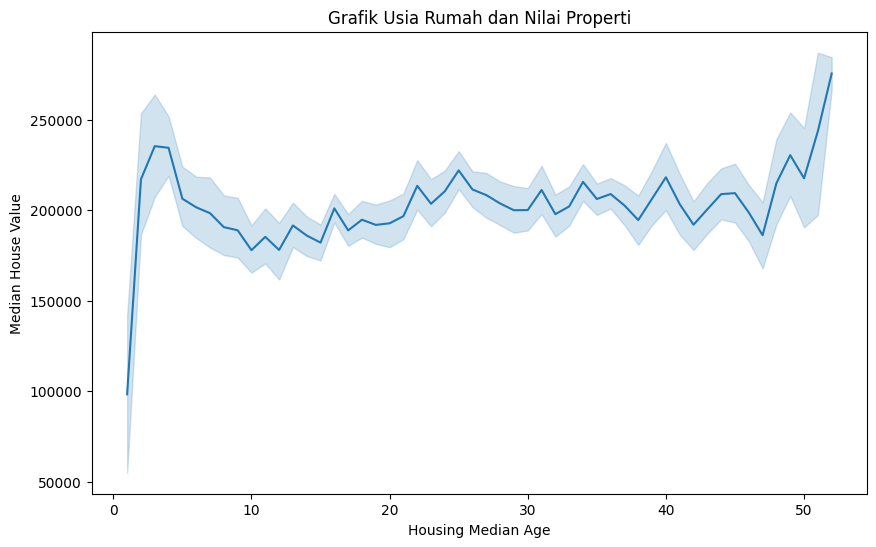

In [60]:
# 4. Analisis Usia Rumah dan Nilai Properti
plt.figure(figsize=(10, 6))
sns.lineplot(x='housing_median_age', y='median_house_value', data=df_housing)
plt.title('Grafik Usia Rumah dan Nilai Properti')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

Barplot Kenaikan Harga Rumah Berdasarkan Daerahnya

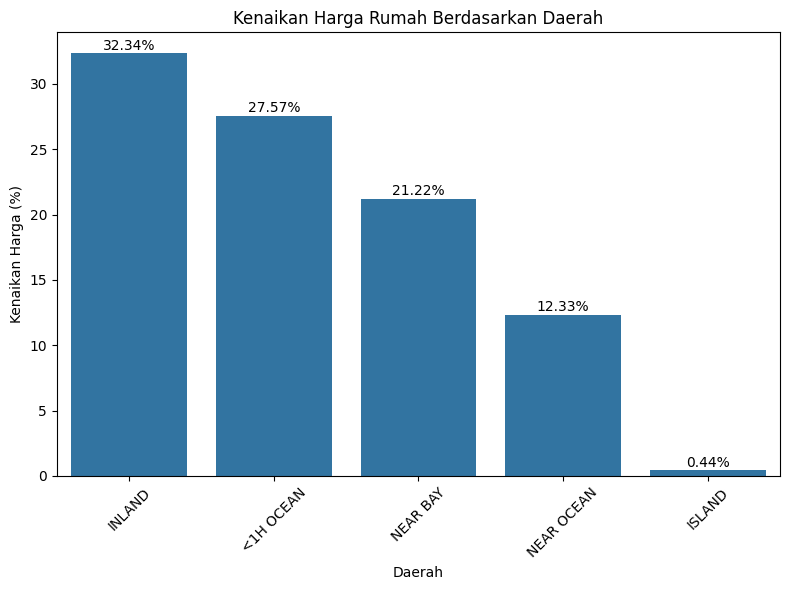

In [61]:
harga_min = []
harga_max = []
kenaikan = []
usia_rumah = []

for i in ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']:
    # Rata2 harga rumah pada tahun ke 1
    inland_min = housing[(housing['ocean_proximity']==i)&(housing['housing_median_age']<100)]
    inland_min_int = inland_min['median_house_value'].min()
    harga_min.append(inland_min_int)
    # Rata2 harga rumah pada tahun ke 52
    inland_max = housing[(housing['ocean_proximity']==i)&(housing['housing_median_age']>1)]
    inland_max_int = inland_max['median_house_value'].max()
    harga_max.append(inland_max_int)
    # Kenaikan Harga
    kenaikan.append((inland_max_int-inland_min_int)/inland_min_int)
    # Usia Rumah
    usia = housing[(housing['ocean_proximity']==i)&(housing['housing_median_age']>1)]
    inland_age = inland_max['housing_median_age'].max()
    usia_rumah.append(inland_age)

value_house = pd.DataFrame({
    'ocean_proximity':housing['ocean_proximity'].unique(),
    'Harga Terendah':harga_min,
    'Harga Tertinggi':harga_max,
    'Kenaikan Harga':kenaikan,
    'Usia Rumah':usia_rumah
})

# Urutkan DataFrame berdasarkan Kenaikan Harga
value_house_sorted = value_house.sort_values(by='Kenaikan Harga', ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=value_house_sorted, x='ocean_proximity', y='Kenaikan Harga')

# Tambahkan nilai Kenaikan Harga pada setiap bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.02, f'{p.get_height():.2f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Kenaikan Harga Rumah Berdasarkan Daerah')
plt.xlabel('Daerah')
plt.ylabel('Kenaikan Harga (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [62]:
value_house

ocean_proximity  Harga Terendah  Harga Tertinggi  Kenaikan Harga  Usia Rumah
0  INLAND         14999.00        500001.00        32.34           52.00      
1  NEAR BAY       22500.00        500001.00        21.22           52.00      
2  <1H OCEAN      17500.00        500001.00        27.57           52.00      
3  NEAR OCEAN     37500.00        500001.00        12.33           52.00      
4  ISLAND         287500.00       414700.00        0.44            52.00

Heatmap Korelasi antara Housing Median Age dengan Median House Value

<Axes: >

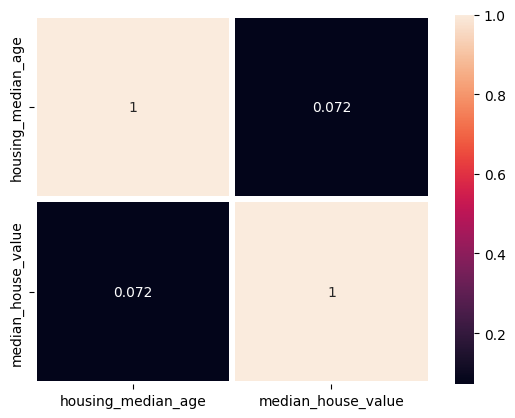

In [63]:
room_corr = df_housing[['housing_median_age','median_house_value']]
sns.heatmap(room_corr.corr(method='spearman'), annot=True, fmt='.2g',linewidths=4)

Dari grafik dan analisis korelasi yang disajikan, terdapat hubungan linear antara housing_median_age dan median_house_value dengan koefisien korelasi positif yang tidak signifikan sebesar 0.072. Nilai korelasi ini menunjukkan adanya hubungan positif antara kedua variabel tersebut. Secara spesifik, kenaikan umur rumah setiap tahunnya akan mempengaruhi harga rumah secara bertahap. Artinya, semakin tinggi umur rumah maka semakin tinggi pula median_house_value suatu rumah. Hal ini mencerminkan prinsip investasi bahwa harga properti akan terus naik secara bertahap seiring umur dari properti tersebut.

Analisis menunjukkan bahwa daerah dengan kenaikan harga properti tertinggi adalah INLAND, dengan persentase kenaikan sebesar 32.34%. Daerah berikutnya adalah <1H OCEAN dengan kenaikan sebesar 27.57%, diikuti oleh NEAR BAY dengan kenaikan 21.22%, NEAR OCEAN dengan kenaikan 12.33%, dan ISLAND dengan kenaikan hanya 0.44%. Kenaikan yang tinggi di daerah INLAND dapat dijelaskan oleh harga rumah yang awalnya rendah, sehingga persentase kenaikan lebih besar dibandingkan dengan daerah lainnya. Sebaliknya, kenaikan yang hampir tidak signifikan di ISLAND disebabkan oleh rendahnya minat pembeli untuk properti di daerah tersebut, mungkin akibat keterbatasan akses dan biaya hidup yang tinggi. Berdasarkan data diatas maka dapat dilihat bahwa daerah INLAND adalah daerah yang menguntungkan untuk investasi properti.


**Kesimpulan:**

Berdasarkan analisis ini, meskipun terdapat hubungan positif antara housing_median_age dan median_house_value, hubungan tersebut sangat lemah dan tidak signifikan. Kenaikan harga rumah yang signifikan ditemukan di daerah dengan harga rumah awal yang rendah, seperti INLAND, sementara daerah dengan harga awal yang lebih tinggi atau kurang diminati seperti ISLAND menunjukkan kenaikan harga yang minimal.

#### Statistik Deskriptif

In [64]:
# Melihat deskripsi dari median_house_value
room_corr.describe().T

count      mean       std      min       25%       50%  \
housing_median_age 14311.00 28.61     12.61     1.00     18.00     29.00       
median_house_value 14311.00 206793.16 115404.37 14999.00 119400.00 180000.00   

                         75%       max  
housing_median_age 37.00     52.00      
median_house_value 263750.00 500001.00

#### Grafik Histogram

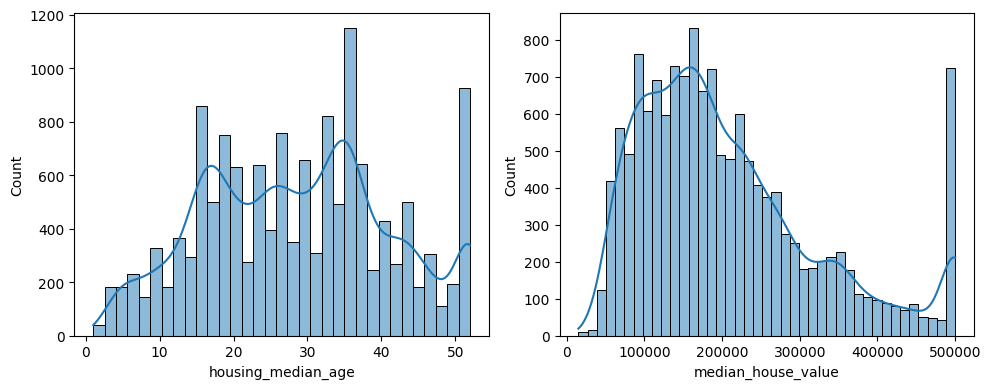

In [65]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(room_corr['housing_median_age'],kde=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.histplot(room_corr['median_house_value'],kde=True)
plt.tight_layout()


Berdasarkan uji distribusi data yang telah dilakukan, dapat disimpulkan bahwa data menunjukkan penyebaran yang tidak normal. Data cenderung memiliki distribusi yang menyebar luas menuju nilai maksimum, yang mengindikasikan adanya skewness ke kanan (right skewness).

Skewness Ke Kanan: Skewness ke kanan berarti bahwa sebagian besar data terpusat pada nilai yang lebih rendah, sementara ekor distribusi panjang dan menyebar ke arah nilai yang lebih tinggi. Dalam konteks harga rumah, ini menunjukkan bahwa sebagian besar rumah mungkin memiliki harga yang relatif rendah, dengan beberapa rumah yang memiliki harga yang sangat tinggi yang mempengaruhi distribusi keseluruhan.

Uji statistik normalitas shapiro wilk dan d'agustino pearson

In [66]:
# Shapiro Wilk
from scipy.stats import shapiro

for i in room_corr.columns:
    stat, pval = shapiro(room_corr[i])

    if pval > 0.05:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data berdistribusi normal dengan Pval {round(pval,3)}\n')
    else:
        print(f'Berdasarkan uji statistik Shapiro Wilk pada data {i}')
        print(f'Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n')

Berdasarkan uji statistik Shapiro Wilk pada data housing_median_age
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik Shapiro Wilk pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



c:\Users\Pongo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [67]:
# D'Agustino Pearson
from scipy.stats import normaltest

for i in room_corr.columns:
    stat, pval = normaltest(room_corr[i])

    if pval > 0.05:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data berdistribusi normal dengan Pval {round(pval,3)}\n")
    else:
        print(f"Berdasarkan uji statistik D'Agustino Pearson pada data {i}")
        print(f"Data tidak berdistribusi normal dengan Pval {round(pval,3)}\n")

Berdasarkan uji statistik D'Agustino Pearson pada data housing_median_age
Data tidak berdistribusi normal dengan Pval 0.0

Berdasarkan uji statistik D'Agustino Pearson pada data median_house_value
Data tidak berdistribusi normal dengan Pval 0.0



Uji Hipotesis

Setelah dilakukan uji statistik maka dapat dilihat bahwa housing_median_age dan median_house_value berdistribusi tidak normal, oleh karena itu pada saat uji hipotesis akan menggunakan uji non parametrik.

Uji Hipotesis untuk Menganalisis Apakah Ada Perbedaan Yang Signifikan Antara housing_median_age Dengan median_house_value Pada Perumahan di California
-   1. Hipotesis Nol (H0):
    -   H0 : Tidak adanya perbedaan yang signifikan antara umur rumah dengan harga rumah di california.
-   2. Hipotesis Alternatif (Ha):
    -   Ha : Terdapat perbedaan yang signifikan antara umur rumah dengan harga rumah di california.

Metode Uji Statistik
-   Untuk menguji hipotesis di atas, akan digunakan Uji Mann-Whitneyu Two Tail. Uji ini dipilih karena data yang yang di uji tidak berdistribusi normal (non-parametric) dan uji ini memiliki kemampuannya untuk membandingkan dua kelompok independen yang tidak memerlukan asumsi distribusi normal, serta dapat menangani ketidak seimbangan ukuran sampel antara kelompok.

Variabel yang Digunakan:
-   X: Umur Rumah.
-   Y: Harga Rumah.

In [68]:
from scipy.stats import mannwhitneyu

# cek dengan uji statistika

H0 = 'Tidak adanya perbedaan yang signifikan antara umur rumah dengan harga rumah di california.'
Ha = 'Terdapat perbedaan yang signifikan antara umur rumah dengan harga rumah di california.'

stat, pval = mannwhitneyu(room_corr['housing_median_age'],
                          room_corr['median_house_value'])
if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: Terdapat perbedaan yang signifikan antara umur rumah dengan harga rumah di california. (pvalue = 0.0)


**Kesimpulan:**

Berdasarkan hasil uji hipotesis, dengan p-value yang sangat rendah (P-Value: 0.0), hipotesis nol (H0) ditolak. Ini menunjukkan bahwa terdapat cukup bukti untuk menerima hipotesis alternatif (Ha). Temuan ini mengindikasikan adanya perbedaan yang signifikan antara housing_median_age dan median_house_value pada perumahan di California. Dengan kata lain, faktor umur rumah berkontribusi secara signifikan terhadap perbedaan harga rumah di berbagai daerah.


**Interpretasi:**

Hasil uji hipotesis menunjukkan bahwa hubungan antara housing_median_age dan median_house_value bukanlah kebetulan semata. Dengan p-value yang jauh di bawah batas signifikansi standar, kita dapat menyimpulkan bahwa ada hubungan yang signifikan antara usia rumah dan nilai median rumah. Meskipun korelasi antara kedua variabel ini tidak kuat (dengan koefisien korelasi sebesar 0.072), adanya hubungan signifikan mengindikasikan bahwa usia rumah dapat mempengaruhi nilai pasar rumah, walaupun dampaknya mungkin lebih kecil dibandingkan dengan faktor lainnya. Hal ini berarti bahwa harga rumah cenderung meningkat secara bertahap seiring bertambahnya usia rumah, sejalan dengan prinsip investasi bahwa properti biasanya mengalami kenaikan harga secara perlahan.


**Implikasi:**

Investor dan pengembang harus menyadari bahwa usia rumah dapat mempengaruhi harga pasar, meskipun tidak sebesar faktor lain seperti lokasi dan median_income. Daerah dengan rumah yang umurnya tinggi mungkin menunjukkan potensi kenaikan harga yang lebih perlahan dibandingkan dengan daerah dengan rumah yang lebih baru. Investor juga harus mempertimbangkan bahwa daerah dengan kenaikan harga signifikan seperti INLAND, mungkin menawarkan peluang investasi yang lebih menguntungkan karena potensi pertumbuhan harga yang lebih besar.

---

## H. Data Spliting

### Feature Engineer

Sebelum memlukan proses data spliting, akan dilakukan penghapusan features dikarenakan memiliki nilai VIF dan korelasi yang tinggi berdasarkan penjelasan sebelumnya. Ada beberapa feature yang akan dihapus yaitu:
-   longitude : feature ini dihapus karena memiliki korelasi tinggi dengan feature latitude, sehingga fiture latitude yang akan dipertahankan. Sebenarnya dua feature ini adalah kesatuan, sehingga latitude digunakan untuk mewakili keduanya dan alasan lain karena latitude memiliki nilai positif.
-   households : feature ini dihapus karena memiliki korelasi tinggi dengan feature populasi, sehingga fiture populasi yang akan dipertahankan. Pemilihan feture populasi karena feature tersebut sudah menjelaskan dari feature households.

In [69]:
X = df_housing.drop(columns=['longitude','households','median_house_value'])
y = df_housing['median_house_value']

### Data Spliting

Pada bagian spliting, data akan di split dengan perbandingan 80:20 hal ini dilakukan agar kualitas data training baik dan menghindari overfitting dan underfitting

In [70]:
X_train, X_test, y_train , y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11448, 7), (11448,), (2863, 7), (2863,))

## I. Data Preparation

### Pipeline

**1. OneHot Encoding**

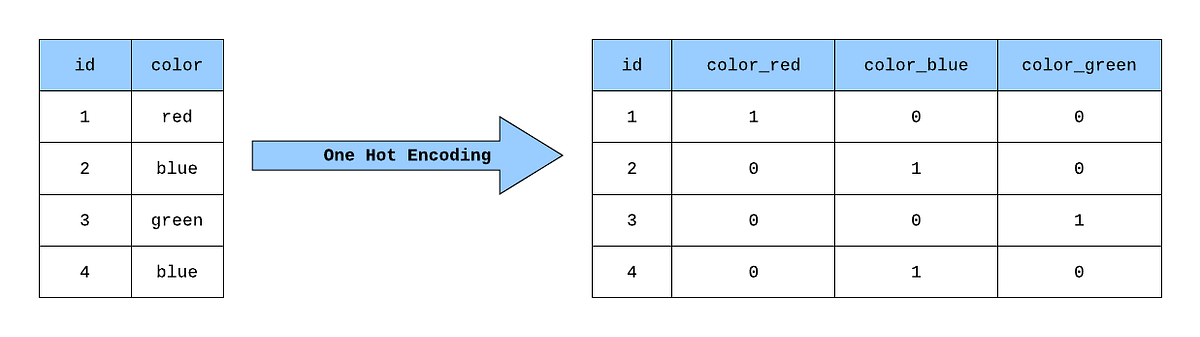
One Hot Encoding adalah teknik preprocessing untuk mengubah variabel kategorikal menjadi bentuk numerik yang dapat diproses oleh algoritma machine learning. Setiap kategori dalam variabel tersebut diwakili sebagai vektor biner dengan panjang sesuai jumlah kategori di variabel tersebut, di mana hanya satu elemen yang aktif (1) dan sisanya nol (0).

One Hot Encoding penting dilakukan karena banyak algoritma pembelajaran mesin tidak dapat menangani variabel kategorikal secara langsung. Algoritma machine learning membutuhkan input numerik. Menggunakan One Hot Encoding memungkinkan pemodelan tanpa mengasumsikan suatu urutan pada kategori, yang mungkin tidak ada, dan membantu algoritma untuk memahami dan menggunakan informasi tersebut secara efektif.

**2. StandardScaler**

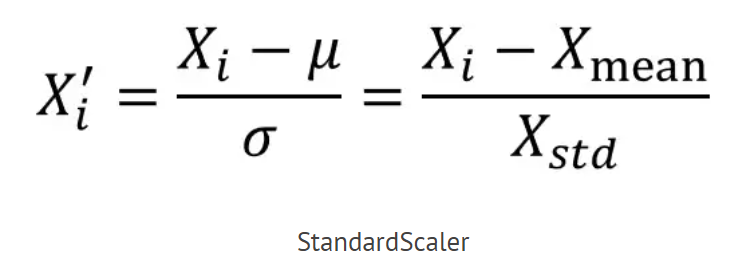

StandardScaler adalah metode preprocessing yang digunakan untuk menormalkan distribusi fitur dengan menghapus mean dan scaling ke unit variance. Dengan kata lain, ini mengubah data sedemikian rupa sehingga memiliki mean (rata-rata) nol dan deviasi standar satu.

Pentingnya StandardScaler muncul dalam algoritma yang sensitif terhadap variasi dalam skala input, seperti regresi linear, logistic regression, dan machine learning berbasis gradient. Scaling membantu menghindari bias yang algoritma mungkin buat terhadap fitur dengan variasi yang lebih besar dan memastikan bahwa konvergensi lebih cepat selama proses pembelajaran, terutama dalam metode yang menggunakan gradient descent sebagai teknik optimisasi.

**3. MinMax Scaler**

MinMax Scaler adalah teknik preprocessing yang digunakan untuk mengubah skala fitur numerik sehingga berada dalam rentang tertentu, biasanya antara 0 dan 1. Proses ini dilakukan dengan cara mengurangi nilai minimum dari fitur dan membaginya dengan rentang (selisih antara nilai maksimum dan minimum) dari fitur tersebut.

Penggunaan MinMax Scaler sangat penting karena banyak algoritma machine learning, terutama yang berbasis gradient descent, sensitif terhadap skala data. Jika fitur memiliki skala yang sangat berbeda, algoritma dapat mengalami kesulitan dalam konvergensi, yang berdampak pada kinerja model. Dengan menerapkan MinMax Scaler, semua fitur dinormalisasi ke dalam rentang yang sama, sehingga algoritma dapat berfungsi lebih efisien dan efektif dalam menangkap pola dari data. Selain itu, ini membantu meningkatkan stabilitas dan kecepatan proses pelatihan model.

**4. Robust Scaler**

Robust Scaler adalah teknik preprocessing yang digunakan untuk mengubah skala fitur numerik dengan cara yang lebih tahan terhadap outliers. Metode ini bekerja dengan mengurangi median dari fitur dan membaginya dengan rentang interkuartil (IQR), yaitu selisih antara kuartil pertama (Q1) dan kuartil ketiga (Q3).

Penggunaan Robust Scaler sangat penting karena banyak algoritma machine learning dapat terpengaruh oleh nilai ekstrim dalam data. Dengan menerapkan Robust Scaler, fitur dinormalisasi sehingga lebih stabil dan lebih sedikit terpengaruh oleh outliers, memungkinkan model untuk belajar pola dari data dengan lebih akurat. Hal ini meningkatkan kinerja model, terutama dalam situasi di mana data mengandung noise atau nilai yang tidak biasa.

**5. Cross Validation**

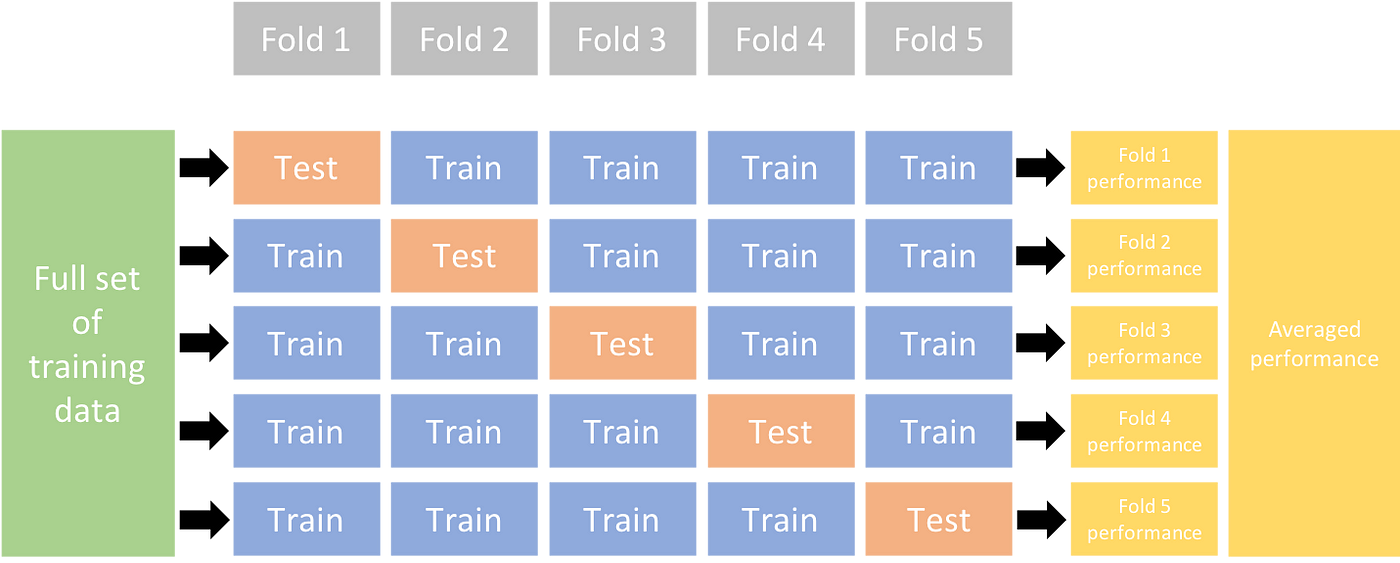

Cross Validation adalah teknik statistik yang digunakan untuk menilai seberapa baik model prediktif dapat bekerja pada set data yang belum dilihat oleh model. Cross validation melibatkan pembagian data menjadi beberapa segmen; model dilatih pada segmen-segmen tersebut kecuali satu yang digunakan sebagai test set. Proses ini diulang sehingga setiap segmen telah digunakan sebagai test set.

Menggunakan n_splits=6 dalam cross-validation berarti data akan dibagi menjadi enam bagian. Alasan pemilihan jumlah splits ini bisa bervariasi, namun secara umum, ini memberikan keseimbangan yang baik antara ukuran set pelatihan dan validitas statistik — semakin banyak splits, semakin akurat penilaian model, tapi juga semakin meningkat komputasi yang dibutuhkan. Jumlah splits harus dipilih berdasarkan ukuran dataset dan sumber daya komputasi yang tersedia. Melakukan cross-validation penting untuk memastikan bahwa model tidak hanya sesuai dengan data training (overfitting), tetapi juga dapat bekerja dengan baik pada data yang tidak terlihat, meningkatkan kemungkinan model akan bekerja dengan baik dalam kondisi nyata.

**6. Transformers**

Transformers adalah arsitektur model dalam machine learning yang dirancang untuk menangani data sekuensial, terutama dalam tugas pemrosesan bahasa alami (NLP). Model ini menggunakan mekanisme perhatian (attention mechanism) untuk memberikan bobot berbeda pada setiap elemen dalam input, memungkinkan pemodelan konteks yang lebih efektif dan efisien.

Keunggulan Transformers terletak pada kemampuannya untuk mengolah seluruh input secara paralel, berbeda dengan model sekuensial tradisional seperti RNN yang memproses data secara berurutan. Ini tidak hanya meningkatkan kecepatan pelatihan tetapi juga memungkinkan model untuk menangkap hubungan jangka panjang dalam data dengan lebih baik.

Pada data preprosesing akan menggunakan transformer untuk membuat rangkaian proses sebelum melakukan modeling, pada data california housing akan diterapkan encouder, scaling dengan menyesuaikan dengan keadaan datanya, berikut penjelasan detailnya:

1. Onehot encouder akan digunakan pada variable ocean_proximity, dikarenakan isi dari variable tersebut bertipe kategorik maka harus diubah dengan encouder, pemilihan onehot encouder dikarenakan ada 4 unique values yang ada pada variable ocean_proximity, onehot encouder baik digunakan pada variable kategorik yang memiliki maksimal 4 unique values.
2. Minmax Scaler akan digunakan pada variable longitude, latitude, median_income karena isi dari variable tersebut bertipe number dan memiliki data yang tidak normal tetapi sedikit outlier, MinMax scaler baik digunakan pada data yang tidak normal dan memiliki outliers yang tidak extreme.
3. Robust Scaler akan digunakan pada variable housing_median_age, total_rooms, total_bedrooms, population, households karena isi dari variable tersebut bertipe number dan memiliki data yang tidak normal dan juga memiliki outlier yang extreme, maka pemilihan robust scaler adalah opsi terbaik untuk data ini, dikarenakan robust scaler tahan terhadap outlier yang extreme.

In [71]:
# Transformer
transformer = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('StandardScaler', StandardScaler(), ['latitude']),
    ('MinMaxScaler', MinMaxScaler(), ['median_income']),
    ('RobustScaler', RobustScaler(), ['housing_median_age','total_rooms','population','total_bedrooms'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('StandardScaler', StandardScaler(),
                                 ['latitude']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['median_income']),
                                ('RobustScaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'population', 'total_bedrooms'])])

## J. Modeling

### Models

**1. Multiple Linear Regression**

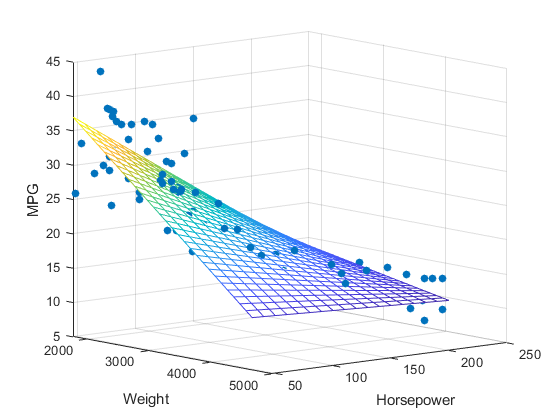

Multiple Linear Regression adalah ekstensi dari regresi linier sederhana yang melibatkan beberapa variabel independen. Model ini tergolong parametrik dan memiliki sejumlah asumsi dasar. Salah satu asumsi utama adalah bahwa hubungan antara variabel dependen (y) dan variabel independen (X1, X2, ..., Xn) bersifat linear. Persamaan matematis dari multiple linear regression dapat dituliskan sebagai:

y = β0 + β1X1 + β2X2 + ... + βnXn + ε

di mana β0 adalah intercept, β1, β2, ..., βn adalah koefisien yang terkait dengan masing-masing variabel independen, dan ε adalah error. Model ini bertujuan untuk meminimalkan jumlah kuadrat residu (sum of squared residuals), yang mencerminkan perbedaan antara nilai observasi dan nilai yang diprediksi.

Regresi linier sangat dihargai karena hasilnya yang mudah diinterpretasikan dan kesesuaiannya dalam situasi di mana hubungan antar variabel diharapkan bersifat linear. Namun, regresi linier memiliki kelemahan, seperti sensitivitas terhadap outlier, yang dapat mempengaruhi kemiringan regresi secara signifikan. Selain itu, asumsi linearitas yang kuat mungkin tidak selalu relevan dalam praktik. Model ini juga menghadapi tantangan multikolinearitas, di mana dua atau lebih variabel independen memiliki korelasi tinggi, menyulitkan interpretasi koefisien yang dihasilkan. Oleh karena itu, diperlukan analisis lebih lanjut atau modifikasi model, seperti Ridge atau Lasso, untuk mengatasi isu-isu tersebut.

**2. Decision Tree**

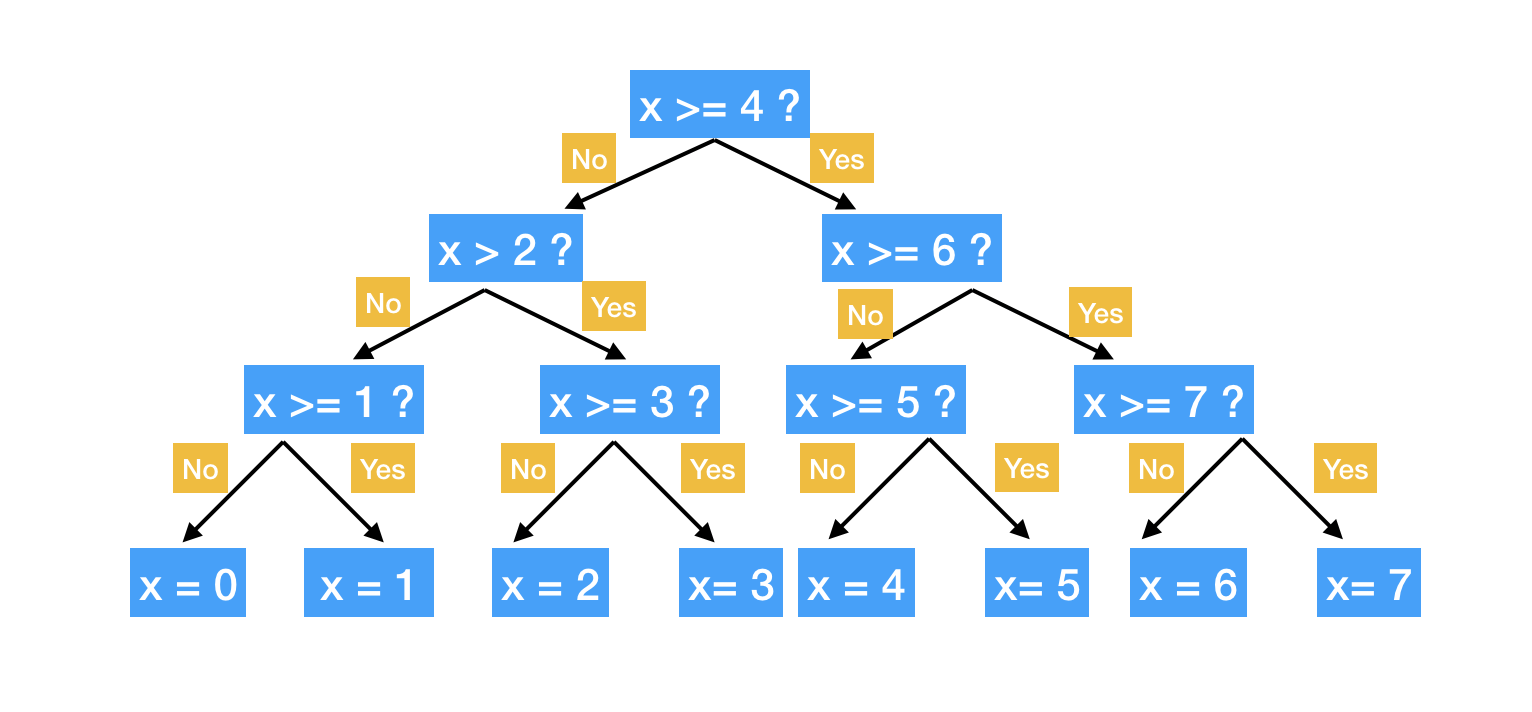

Decision Tree Regressor adalah model non-parametrik yang tidak terikat oleh asumsi tertentu, berfungsi untuk membuat prediksi dalam bentuk struktur pohon keputusan. Proses ini melibatkan pembagian data menjadi subkelompok yang lebih kecil dan lebih homogen berdasarkan fitur paling informatif, yang menghasilkan pengurangan maksimum dalam variasi (atau entropi, Gini impurity, dan sejenisnya dalam konteks klasifikasi). Setiap node dalam pohon mewakili fitur dalam dataset, sementara setiap cabang mencerminkan keputusan yang membagi data menjadi grup yang lebih homogen terkait variabel respon. Proses pemecahan ini berlanjut secara rekursif hingga kriteria penghentian terpenuhi, seperti kedalaman maksimum yang dicapai atau peningkatan minimum dalam homogenitas setelah pemecahan.

Keunggulan dari Decision Tree termasuk kemampuannya untuk menangani data numerik dan kategorikal, serta ketidakperluan untuk normalisasi data. Selain itu, pohon keputusan mudah untuk diinterpretasikan dan dapat divisualisasikan, memberikan pemahaman yang jelas tentang proses pengambilan keputusan. Namun, model ini sangat rentan terhadap overfitting, terutama jika pohon dibiarkan berkembang dengan banyak node. Selain itu, Decision Tree dapat menjadi tidak stabil, di mana perubahan kecil dalam data dapat menghasilkan pohon yang sangat berbeda. Oleh karena itu, seringkali lebih efektif untuk menggunakan ensemble pohon, seperti Random Forest atau boosted trees, untuk mengatasi kelemahan ini.

**3. K Nearest Neighbors**

K Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin non-parametrik yang digunakan untuk klasifikasi dan regresi. Model ini berfungsi dengan mencari K titik data terdekat dalam dataset untuk memprediksi kelas atau nilai dari titik data baru. Proses ini melibatkan pengukuran jarak antara titik data yang tidak dikenal dan semua titik dalam dataset menggunakan metrik jarak seperti Euclidean atau Manhattan. KNN kemudian memilih K tetangga terdekat, dan keputusan diambil berdasarkan mayoritas kelas (untuk klasifikasi) atau rata-rata nilai (untuk regresi) dari tetangga tersebut.

Keunggulan KNN termasuk kesederhanaannya dan kemampuannya untuk menangani data numerik dan kategorikal tanpa memerlukan asumsi distribusi tertentu. Selain itu, KNN mudah untuk dipahami dan diimplementasikan. Namun, model ini memiliki beberapa kelemahan, seperti sensitivitas terhadap fitur yang tidak relevan dan kebutuhan untuk menyimpan seluruh dataset, yang dapat mengakibatkan waktu prediksi yang lama, terutama dengan dataset besar. KNN juga rentan terhadap perubahan kecil dalam data, yang dapat mempengaruhi hasil klasifikasi secara signifikan. Oleh karena itu, sering kali disarankan untuk melakukan praproses data dan pemilihan fitur untuk meningkatkan kinerja model.

**4. Voting Regressor**

Voting Regressor adalah ensemble machine learning tipe various type, di mana kita dapat menggunakan beberapa tipe algoritma yang tidak setipe. Metode ini menggabungkan prediksi dari beberapa model regresi yang berbeda untuk meningkatkan keakuratan prediksi secara keseluruhan. Voting Regressor merata-ratakan hasil prediksi dari tiap model. Ini menghasilkan output akhir yang merupakan rata-rata prediksi dari semua model yang terlibat dalam training. Averaging membantu mengurangi varians dan bias yang mungkin dihasilkan oleh model individu, sehingga meningkatkan stabilitas prediksi keseluruhan. Voting Regressor dipilih karena seringkali menghasilkan prediksi yang lebih akurat daripada model individu.

**5. Stacking Regressor**

Stacking Regressor adalah teknik ensemble dalam machine learning yang menggabungkan prediksi dari beberapa model regresi untuk meningkatkan akurasi. Dalam metode ini, model-model dasar (base learners) dilatih secara terpisah, dan kemudian prediksi mereka digunakan sebagai input untuk model meta (meta-learner) yang menghasilkan prediksi akhir. Dengan cara ini, stacking dapat menangkap kompleksitas dan pola yang mungkin tidak terdeteksi oleh model individual, sering kali menghasilkan performa yang lebih baik dibandingkan metode tunggal.

**6. Bagging Regressor With Random Forest**

Bagging Regressor adalah metode untuk meningkatkan akurasi prediksi dalam model machine learning dengan cara melatih beberapa model secara terpisah pada bagian data yang acak dan kemudian menggabungkan prediksinya. Metode ini menggunakan sampling dengan pengembalian dari dataset utama untuk menghasilkan sampel-sampel baru, dan setiap model dilatih pada salah satu dari sampel tersebut. Setelah itu, hasil dari semua model diambil rata-ratanya untuk mendapatkan prediksi akhir. Teknik ini sangat efektif untuk mengurangi kesalahan prediksi yang sering terjadi karena overfitting, yaitu ketika model terlalu cocok dengan data latih hingga tidak efektif pada data baru. Bagging biasanya dilakukan dengan model yang sama, seperti decision tree, dan cocok untuk situasi di mana keakuratan prediksi adalah sangat penting.

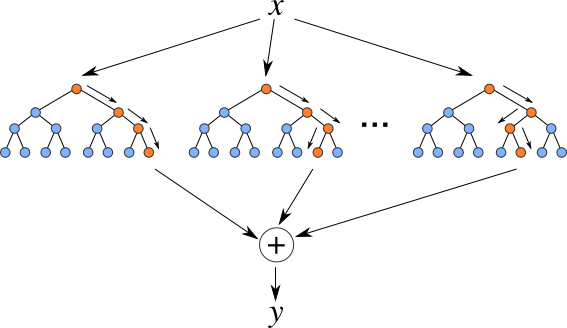

Random Forest adalah metode non-parametrik (tidak memiliki asumsi yang harus dipenuhi) dan metode ensemble learning yang bekerja dengan menggabungkan prediksi dari banyak decision trees yang dilatih pada subset acak dari data dengan penggantian (bagging). Setiap pohon dalam hutan acak dibangun dari sampel data yang diambil dengan penggantian dari dataset pelatihan. Selain itu, pada setiap node dari pohon, pemilihan pemisahan hanya dilakukan dari subset acak dari fitur, bukan dari semua fitur yang tersedia. Ini meningkatkan keberagaman di antara pohon-pohon dalam model, yang mengurangi risiko overfitting dan meningkatkan akurasi prediksi keseluruhan. Random Forest memiliki banyak keunggulan, termasuk kemampuannya untuk memberikan estimasi yang sangat akurat dan robust terhadap overfitting. Model ini efektif pada dataset besar dengan dimensi tinggi dan dapat menangani missing values serta variabel dalam berbagai skala. Namun, kelemahannya termasuk kompleksitas yang lebih tinggi yang bisa membuat model lebih sulit untuk diinterpretasikan dibandingkan dengan single decision tree. Selain itu, meskipun lebih efisien dari segi komputasi daripada beberapa metode lain untuk dataset besar, waktu pelatihan bisa cukup lama karena kompleksitas dari banyak pohon yang dibangun.

**7. Gradient Boosting**

Gradient Boosting adalah teknik machine learning yang digunakan untuk membangun model prediksi dengan menggabungkan beberapa model lemah (weak learners), biasanya decision trees, dalam urutan tertentu. Metode ini bekerja dengan cara membangun model secara bertahap, di mana setiap model baru dilatih untuk memperbaiki kesalahan dari model sebelumnya.

**8. Extreme Gradient Boosting**

XGBoost (Extreme Gradient Boosting) adalah implementasi populer dari algoritma gradient boosting yang dirancang untuk efisiensi dan kinerja tinggi. XGBoost menggabungkan keunggulan gradient boosting dengan teknik optimasi yang canggih, termasuk regularisasi untuk mengurangi overfitting dan kemampuan untuk menangani missing values.

Secara khusus, XGBoost menggunakan pendekatan paralelisasi dalam proses pelatihan, yang memungkinkan model untuk dilatih lebih cepat dibandingkan dengan implementasi gradient boosting tradisional. Selain itu, XGBoost menyediakan berbagai parameter yang dapat disesuaikan, memungkinkan pengguna untuk mengoptimalkan model sesuai dengan karakteristik dataset mereka. Fitur penting lainnya adalah penggunaan tree pruning yang lebih efisien, di mana proses pemangkasan dilakukan secara bertahap, sehingga menghasilkan model yang lebih sederhana dan lebih mudah diinterpretasikan. Karena kombinasi dari semua keunggulan ini, XGBoost telah menjadi pilihan utama dalam kompetisi data science dan aplikasi industri, terutama dalam menangani data yang besar dan kompleks.

**9. Ridge Regression**
- Ridge Regression (atau Tikhonov regularization) adalah metode parametrik dan digunakan untuk menganalisis data regresi dengan multikolinearitas, yaitu situasi di mana variabel independen sangat berkorelasi. Ini adalah perluasan dari regresi linier yang mencakup istilah regularisasi L2. Regularisasi adalah teknik yang digunakan untuk mencegah overfitting dengan menambahkan penalti pada ukuran koefisien dalam cost function regresi. Dalam ridge regression, cost function diubah dengan menambahkan istilah penalti yang proporsional dengan kuadrat besar dari magnitude koefisien (norma L2). Ridge regression meminimalkan cost function ini:
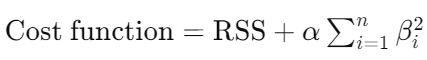
- Di mana RSS adalah sum of squares error, β adalah koefisien, dan α adalah parameter yang menentukan kekuatan penalti regularisasi, yang harus ditetapkan lebih dahulu. Penambahan istilah penalti ini mendorong pembelajaran model yang lebih kecil (kontraksi) koefisien, yang secara efektif mengurangi kompleksitas model. Ridge regression sangat berguna ketika kita memiliki variabel prediktor yang sangat berkorelasi (multikolinearitas) atau ketika jumlah variabel independen melebihi jumlah observasi. Keunggulan utama dari ridge regression adalah bahwa ia dapat menyediakan solusi yang stabil dan terbiasa, tetapi kelemahannya adalah ia tidak melakukan seleksi variabel secara otomatis; semua variabel dipertahankan dalam model akhir.

**10. Lasso Regression**
- Lasso Regression (Least Absolute Shrinkage and Selection Operator) adalah metode parametrik dan merupakan jenis regresi yang melakukan regularisasi L1, di mana sebuah penalti yang setara dengan jumlah nilai absolut dari koefisien diterapkan. Tujuan dari Lasso adalah untuk memperoleh subset dari prediktor yang meminimalkan kesalahan prediksi dengan mengonstruksi model yang lebih interpretatif dengan mengurangi jumlah variabel. Cost function dalam Lasso adalah sebagai berikut:
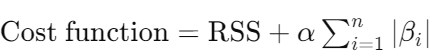
- Lasso cenderung membuat koefisien dari variabel prediktor yang kurang penting menjadi nol, sehingga melakukan seleksi fitur secara otomatis dan menghasilkan model yang lebih sederhana dan mudah diinterpretasikan. Lasso sangat berguna ketika kita memiliki banyak variabel, dan banyak dari variabel tersebut tidak penting untuk model prediktif. Keuntungan utama dari Lasso adalah kemampuannya untuk melakukan seleksi fitur yang secara inheren membangun model yang lebih sederhana dan kurang rentan terhadap overfitting. Namun, Lasso bisa kewalahan jika jumlah variabel sangat besar atau jika hubungan antar variabel sangat kompleks, di mana Lasso mungkin tidak dapat menangkap pola data dengan efektif.

In [72]:
# base model
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
knn = KNeighborsRegressor()

# voting
vr = VotingRegressor([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ])

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LinearRegression()
stacking = StackingRegressor(estimators=base_model, final_estimator=meta_model)

# bagging
rf = RandomForestRegressor(random_state=0)

# boosting
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Rdige dan Lasso
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

### Experiment 1: Rule Based Model ( Non ML ) 

Experiment pertama akan menggunakan rule based model yang sudah dibuat dan menggunakan fungsi yang sudah disesuaikan dengan keadaan data sehingga diharapkan dapat membuat score yang baik untuk prediksi model.

In [73]:
# Membuat Fungsi Rule Based Non ML

def rule_based(df_housing):
    if df_housing['total_rooms'] > 2640 and df_housing['total_bedrooms'] > 538 and df_housing['median_income'] > 3.87:
        return 450000.9
    elif df_housing['total_rooms'] <= 2640 and df_housing['total_bedrooms'] <= 538 and df_housing['median_income'] <= 3.87:
        return 200000.4
    elif (df_housing['total_rooms'] > 2640 or df_housing['total_bedrooms'] > 538) and df_housing['median_income'] > 3.87:
        return 375000.75
    elif (df_housing['total_rooms'] <= 2640 or df_housing['total_bedrooms'] <= 538) and df_housing['median_income'] <= 3.87:
        return 125000.25
    elif df_housing['total_rooms'] > 2640 or df_housing['total_bedrooms'] > 538:
        return 300000.6
    elif df_housing['total_rooms'] <= 2640 or df_housing['total_bedrooms'] <= 538:
        return 175000.35
    elif df_housing['median_income'] > 3.87:
        return 325000.65
    elif df_housing['median_income'] <= 3.87:
        return 150000.3
    else:
        return 0

In [74]:
list_RMSE = []
list_MAE = []
list_MAPE = []
list_R2 = []

for skor in ['rmse','mape','mae','R2']:

    if skor == 'rmse':
        y_pred_test_rule_based = X_test.apply(rule_based, axis = 1)
        score_test_rule_based = root_mean_squared_error(y_test, y_pred_test_rule_based)
        list_RMSE.append(score_test_rule_based)

    elif skor == 'mape':
        y_pred_test_rule_based = X_test.apply(rule_based, axis = 1)
        score_test_rule_based = mean_absolute_percentage_error(y_test, y_pred_test_rule_based)
        list_MAPE.append(score_test_rule_based)

    elif skor == 'mae':
        y_pred_test_rule_based = X_test.apply(rule_based, axis = 1)
        score_test_rule_based = mean_absolute_error(y_test, y_pred_test_rule_based)
        list_MAE.append(score_test_rule_based)

    else:
        y_pred_test_rule_based = X_test.apply(rule_based, axis = 1)
        score_test_rule_based = r2_score(y_test, y_pred_test_rule_based)
        list_R2.append(score_test_rule_based)
        

# Membuat DataFrame
df1 = pd.DataFrame({
    'model': ['Rule Based Non ML'],
    'test_score_RMSE': list_RMSE,
    'test_score_MAE': list_MAE,
    'test_score_MAPE': list_MAPE,
    'test_score_R2': list_R2
})

# Menampilkan DataFrame
df1

model  test_score_RMSE  test_score_MAE  test_score_MAPE  \
0  Rule Based Non ML 138067.92        111301.49       0.77               

   test_score_R2  
0 -0.43

Berdasarkan hasil evaluasi model berbasis aturan (rule-based) yang tidak menggunakan machine learning, diperoleh nilai RMSE sebesar 138,068 dan MAPE sebesar 0.77. Nilai ini menunjukkan kinerja yang kurang memuaskan dan terlalu tinggi untuk dijadikan acuan dalam prediksi. Tingginya skor RMSE dan MAPE menunjukkan bahwa model ini tidak dapat diandalkan, berpotensi menghasilkan nilai prediksi yang tidak akurat dan tidak mencerminkan kondisi sebenarnya.

### Experiment 2 : Based Model

Experiment ke 2 tetap menggunakan based model yang sudah dibuat dan akan menggunakan machine learning untuk train dan predict datanya, penggunaan machine learning diharapkan akan menghasilkan score yang baik dan hasil prediksi menggambarkan keadaan yang sebenarnya.

In [75]:
# base model
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
knn = KNeighborsRegressor()

# voting
vr = VotingRegressor([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ])

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LinearRegression()
stacking = StackingRegressor(estimators=base_model, final_estimator=meta_model)

# bagging
rf = RandomForestRegressor(random_state=0)

# boosting
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Rdige dan Lasso
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

In [76]:
# Inisialisasi daftar untuk menyimpan skor
train_score_list_MAPE = []
train_score_list_MAE = []
train_score_list_RMSE = []
train_score_list_R2 = [] 

train_score_std_list_MAPE = []
train_score_std_list_MAE = []
train_score_std_list_RMSE = []
train_score_std_list_R2 = []

test_score_list_MAPE = []
test_score_list_MAE = []
test_score_list_RMSE = []
test_score_list_R2 = []


# Loop untuk setiap model
for model in [lr, dt, knn, vr, stacking, rf, gb, xgb, ridge, lasso]:
    pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    for skor in ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']:
        # Cross-validation1
        kf = KFold(n_splits=5)
        scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=skor)

        if skor == 'neg_root_mean_squared_error':
            train_score_list_RMSE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_RMSE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train, y_train)
            ypred_test = pipeline.predict(X_test)

            # Evaluasi RMSE
            test_rmse = np.sqrt(mean_squared_error(y_test, ypred_test))
            test_score_list_RMSE.append(test_rmse)

        elif skor == 'neg_mean_absolute_error':
            train_score_list_MAE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_MAE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train, y_train)
            ypred_test = pipeline.predict(X_test)

            # Evaluasi MAE
            test_mae = mean_absolute_error(y_test, ypred_test)
            test_score_list_MAE.append(test_mae)

        elif skor == 'neg_mean_absolute_percentage_error':
            train_score_list_MAPE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_MAPE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train, y_train)
            ypred_test = pipeline.predict(X_test)

            # Evaluasi MAPE
            test_mape = mean_absolute_percentage_error(y_test, ypred_test)
            test_score_list_MAPE.append(test_mape)


        elif skor == 'r2':
            train_score_list_R2.append(scores.mean())  # Tidak perlu negasi untuk R²
            train_score_std_list_R2.append(scores.std())

            # Prediksi
            pipeline.fit(X_train, y_train)
            ypred_test = pipeline.predict(X_test)

            # Evaluasi R2
            test_r2 = r2_score(y_test, ypred_test)
            test_score_list_R2.append(test_r2)

# Membuat DataFrame
df2 = pd.DataFrame({
    'model': ['Linear Regression', 'Decision Tree', 'KNN', 'Voting Regression', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Ridge', 'Lasso'],
    'test_score_RMSE': test_score_list_RMSE,
    'test_score_MAE': test_score_list_MAE,
    'test_score_MAPE': test_score_list_MAPE,
    'test_score_R2': test_score_list_R2
})

# Menampilkan DataFrame
df2


model  test_score_RMSE  test_score_MAE  test_score_MAPE  \
0  Linear Regression 69568.03         51110.64        0.29               
1  Decision Tree     81899.50         54493.83        0.30               
2  KNN               67204.80         47700.33        0.27               
3  Voting Regression 62262.18         44060.83        0.25               
4  Stacking          60946.99         43387.60        0.24               
5  Random Forest     57362.07         39463.32        0.22               
6  Gradient Boosting 60117.62         42825.32        0.24               
7  XGBoost           55933.80         38946.18        0.22               
8  Ridge             69563.94         51133.42        0.29               
9  Lasso             69567.98         51111.41        0.29               

   test_score_R2  
0 0.64            
1 0.50            
2 0.66            
3 0.71            
4 0.72            
5 0.75            
6 0.73            
7 0.77            
8 0.64            
9 0.64

Berdasarkan hasil evaluasi berbagai model regresi, nilai RMSE tertinggi dicapai oleh Decision Tree dengan 81,899.50, sedangkan nilai terendah diperoleh dari XGBoost sebesar 55,933.80. Model Voting Regression dan Stacking juga menunjukkan kinerja yang baik, dengan RMSE masing-masing sebesar 62,262.18 dan 60,946.99. Dalam hal MAPE, XGBoost dan Random Forest memiliki nilai terbaik masing-masing 0.22, menunjukkan akurasi yang lebih tinggi dalam prediksi. Secara keseluruhan, XGBoost dan Random Forest menonjol sebagai model yang paling efektif, dengan nilai R² tertinggi, yaitu 0.77 dan 0.75. Hal ini mengindikasikan bahwa kedua model ini dapat diandalkan untuk menghasilkan prediksi yang lebih akurat dibandingkan model lainnya.

Sebaliknya, model-model dengan skor RMSE dan MAPE yang lebih tinggi menunjukkan kinerja yang kurang memuaskan dan berpotensi menghasilkan prediksi yang tidak akurat, sehingga tidak mencerminkan kondisi sebenarnya.

### Experimen 3 : Hapus Outliers

Experiment 3 akan dilakukan penghapusan outliers untuk melihat apakah data tanpa outliers akan memiliki nilai score yang lebih baik dibanding data yang mempertahan outliers dengan alasan yang sudah dijelaskan pada bagian sebelumnya. Hal ini diharapkan akan menghasilkan score RMSE dan MAPE yang baik dan menggambarkan keadaan yang sebernarnya.

In [77]:
list_jumlah_outliers = []
numerik = df_housing.drop(columns='median_house_value').select_dtypes(include='number')

def hapus_outliers(numerik, target):
    # Menghitung jumlah outliers untuk setiap kolom
    for setiap_kolom in numerik.columns:
        q3 = numerik[setiap_kolom].quantile(0.75)
        q1 = numerik[setiap_kolom].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # Menghitung jumlah outliers
        jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
        list_jumlah_outliers.append(jumlah_outliers)

    return numerik

# Panggil fungsi untuk menghapus outliers
hapus_outliers(numerik, 'median_house_value')

# Membuat DataFrame untuk jumlah outliers
df_outliers = pd.DataFrame({
    'kolom': numerik.columns,
    'jumlah outliers': list_jumlah_outliers
})

pd.DataFrame(df_outliers)


kolom  jumlah outliers
0  longitude           0              
1  latitude            0              
2  housing_median_age  0              
3  total_rooms         905            
4  total_bedrooms      879            
5  population          822            
6  households          836            
7  median_income       477

Menghapus outliers berdasarkan banyaknya outliers di variable median_income, hal ini dikarenakan median_income mempunya korelasi postif signifikan terhadap terget atau 'median_house_value. Jadi penghapusan outliers pada variable median_income sudah mewakilkan menghapus outliers yang extreme, dapat dilihat pada boxplot perbandingan jumlah outlier sebelum dihapus dan sesudah dihapus. Pada uji model kali ini sepertinya akan sulit apa bila menghapus semua outliers pada masing2 variable karena akan menghapus banyak sekali data.

In [78]:
def hapus_outliers(numerik):
    # Salin DataFrame untuk menghindari perubahan pada data asli
    cleaned_numerik = numerik
    
    for setiap_kolom in cleaned_numerik.columns:
        q3 = cleaned_numerik[setiap_kolom].quantile(0.75)
        q1 = cleaned_numerik[setiap_kolom].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # Menghapus outliers
        cleaned_numerik = cleaned_numerik[
            (cleaned_numerik[setiap_kolom] <= upper_bound) & 
            (cleaned_numerik[setiap_kolom] >= lower_bound)
        ]

    return cleaned_numerik

# Menggunakan fungsi untuk menghapus outliers
df_without_outliers = hapus_outliers(numerik)

# Menampilkan jumlah outliers yang dihapus
print("Jumlah data setelah penghapusan outliers:", df_without_outliers.shape[0])


Jumlah data setelah penghapusan outliers: 12177


In [79]:
a = df_housing[df_housing.isin(df_without_outliers)].reset_index().rename({'index':'code'},axis=1)
b = df_housing.reset_index().rename({'index':'code'},axis=1)

df_with_target = a.merge(b[['code', 'median_house_value']], 
                                            on='code', 
                                            how='inner')

df_with_target_fix = df_with_target.drop(columns=['code','median_house_value_x']).rename({'median_house_value_y':'median_house_value'}, axis=1)
df_with_target_fix

df_cleaned = df_with_target_fix.dropna(subset=['median_income']).drop(columns='ocean_proximity')

Boxplot sebelum outlier dihapus

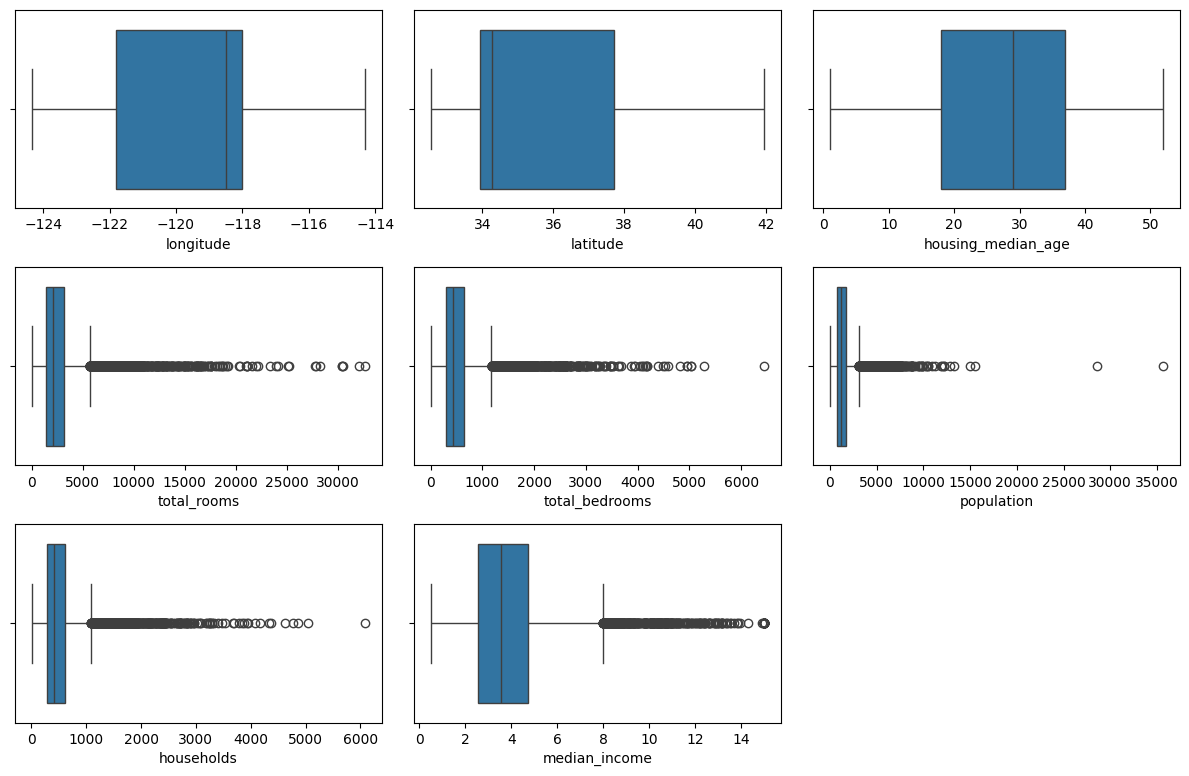

In [80]:
numerik = df_housing.drop(columns='median_house_value').select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (12,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,3,posisi)
    sns.boxplot(x = df_housing[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Boxplot setelah outlier dihapus

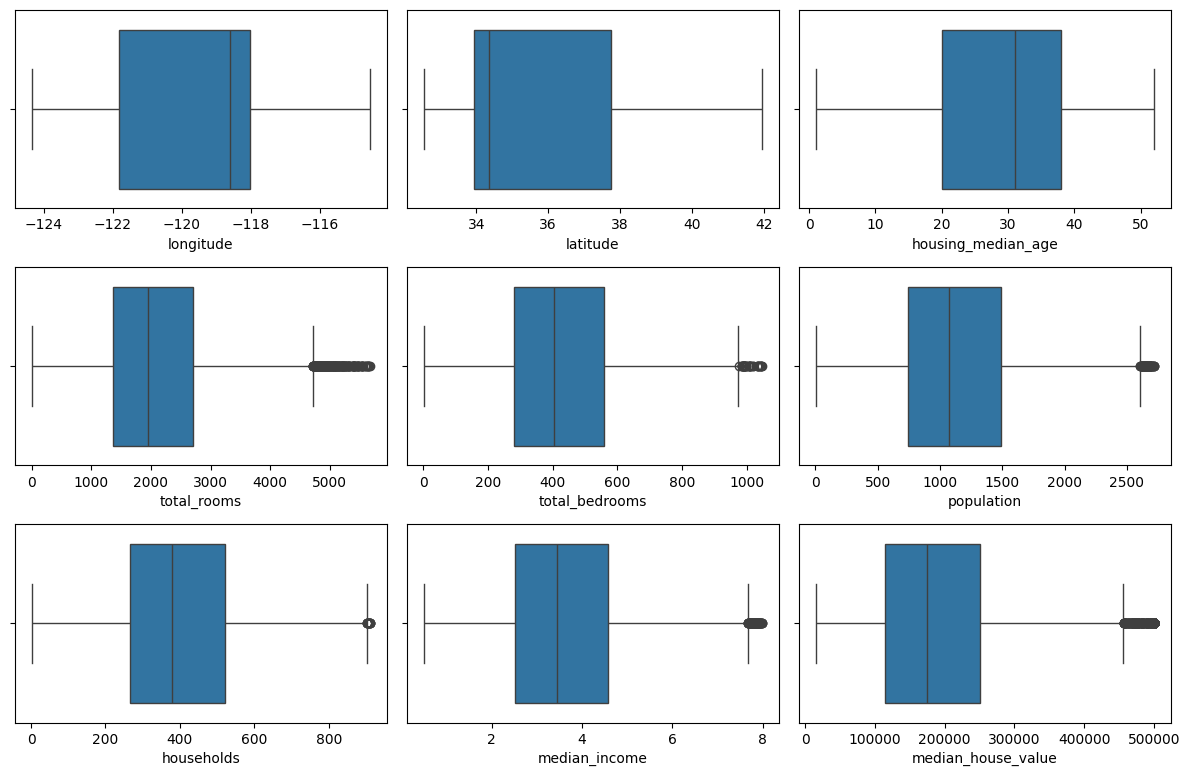

In [81]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (12,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in df_cleaned.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,3,posisi)
    sns.boxplot(x = df_cleaned[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [82]:
X_no_outliers = df_cleaned.drop(columns=['longitude','households','median_house_value'])
y_no_outliers = df_cleaned['median_house_value']

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers,
    y_no_outliers,
    test_size = 0.2,
    random_state = 0,)

X_train_no_outliers.shape, X_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((9741, 6), (2436, 6), (9741,), (2436,))

In [83]:
# base model
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
knn = KNeighborsRegressor()

# voting
vr = VotingRegressor([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ])

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LinearRegression()
stacking = StackingRegressor(estimators=base_model, final_estimator=meta_model)

# bagging
rf = RandomForestRegressor(random_state=0)

# boosting
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Rdige dan Lasso
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

In [84]:
# Membuat Transformer Baru Dengan Menyesuaikan Features
transformer1 = ColumnTransformer([
    #('OneHotEncoder', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('StandardScaler', StandardScaler(), ['latitude']),
    ('MinMaxScaler', MinMaxScaler(), ['median_income']),
    ('RobustScaler', RobustScaler(), ['housing_median_age','total_rooms','population','total_bedrooms'])
], remainder='passthrough')


# Inisialisasi daftar untuk menyimpan skor
train_score_list_MAPE = []
train_score_list_MAE = []
train_score_list_RMSE = []
train_score_list_R2 = []

train_score_std_list_MAPE = []
train_score_std_list_MAE = []
train_score_std_list_RMSE = []
train_score_std_list_R2 = []

test_score_list_MAPE = []
test_score_list_MAE = []
test_score_list_RMSE = []
test_score_list_R2 = []

# Loop untuk setiap model
for model in [lr, dt, knn, vr, stacking, rf, gb, xgb, ridge, lasso]:
    pipeline = Pipeline([
        ('transformer', transformer1),
        ('model', model)
    ])
    
    for skor in ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error','r2']:
        # Cross-validation
        kf = KFold(n_splits=5)
        scores = cross_val_score(pipeline, X_train_no_outliers, y_train_no_outliers, cv=kf, scoring=skor)

        if skor == 'neg_root_mean_squared_error':
            train_score_list_RMSE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_RMSE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train_no_outliers, y_train_no_outliers)
            ypred_test = pipeline.predict(X_test_no_outliers)

            # Evaluasi RMSE
            test_rmse = np.sqrt(mean_squared_error(y_test_no_outliers, ypred_test))
            test_score_list_RMSE.append(test_rmse)

        elif skor == 'neg_mean_absolute_error':
            train_score_list_MAE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_MAE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train_no_outliers, y_train_no_outliers)
            ypred_test = pipeline.predict(X_test_no_outliers)

            # Evaluasi MAE
            test_mae = mean_absolute_error(y_test_no_outliers, ypred_test)
            test_score_list_MAE.append(test_mae)

        elif skor == 'neg_mean_absolute_percentage_error':
            train_score_list_MAPE.append(-scores.mean())  # Negasi karena skoring negatif
            train_score_std_list_MAPE.append(scores.std())

            # Prediksi
            pipeline.fit(X_train_no_outliers, y_train_no_outliers)
            ypred_test = pipeline.predict(X_test_no_outliers)

            # Evaluasi MAPE
            test_mape = mean_absolute_percentage_error(y_test_no_outliers, ypred_test)
            test_score_list_MAPE.append(test_mape)

        elif skor == 'r2':
            train_score_list_R2.append(scores.mean())  # Tidak perlu negasi untuk R²
            train_score_std_list_R2.append(scores.std())

            # Prediksi
            pipeline.fit(X_train_no_outliers, y_train_no_outliers)
            ypred_test = pipeline.predict(X_test_no_outliers)

            # Evaluasi R2
            test_r2 = r2_score(y_test_no_outliers, ypred_test)
            test_score_list_R2.append(test_r2)

# Membuat DataFrame
df3 = pd.DataFrame({
    'model': ['Linear Regression', 'Decision Tree', 'KNN', 'Voting Regression', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Ridge', 'Lasso'],
    'test_score_RMSE': test_score_list_RMSE,
    'test_score_MAE': test_score_list_MAE,
    'test_score_MAPE': test_score_list_MAPE,
    'test_score_R2': test_score_list_R2
})

# Menampilkan DataFrame
df3

model  test_score_RMSE  test_score_MAE  test_score_MAPE  \
0  Linear Regression 71600.66         52962.69        0.32               
1  Decision Tree     92598.78         62981.94        0.36               
2  KNN               73710.08         51699.91        0.31               
3  Voting Regression 69060.28         48619.17        0.29               
4  Stacking          67170.19         47562.23        0.28               
5  Random Forest     64750.50         45468.77        0.27               
6  Gradient Boosting 64773.84         46539.93        0.28               
7  XGBoost           62325.22         43562.12        0.26               
8  Ridge             71602.62         52970.02        0.33               
9  Lasso             71600.67         52962.81        0.32               

   test_score_R2  
0 0.55            
1 0.25            
2 0.53            
3 0.58            
4 0.61            
5 0.63            
6 0.63            
7 0.66            
8 0.55            
9 0.55

Hasil evaluasi model regresi setelah menghapus outliers menunjukkan perbaikan dalam kinerja model. Nilai RMSE tertinggi kini dicapai oleh Decision Tree dengan 92,598.78, sedangkan nilai terendah diperoleh dari XGBoost sebesar 62,325.22. Model Stacking dan Voting Regression juga menunjukkan kinerja yang baik dengan RMSE masing-masing sebesar 67,170.19 dan 69,060.28. Dalam hal MAPE, XGBoost menonjol dengan nilai terbaik 0.26, diikuti oleh Random Forest dan Gradient Boosting dengan nilai 0.27 dan 0.28. Secara keseluruhan, XGBoost menjadi model paling efektif dengan nilai R² tertinggi sebesar 0.66, menunjukkan kemampuannya dalam menghasilkan prediksi yang akurat. Penghapusan outliers berkontribusi pada peningkatan stabilitas model, sementara model dengan skor RMSE dan MAPE yang lebih tinggi, seperti Decision Tree, tetap menunjukkan kinerja yang kurang memuaskan dan berisiko menghasilkan prediksi yang tidak mencerminkan kondisi sebenarnya.

Ketika dibandingkan dengan model rule based ML, yang memiliki hasil dari XGBoost dengan RMSE 55933.80 dan MAPE 0.22 menunjukkan adanya penurunan yang signifikan dalam akurasi prediksi. 

### Experimen 4 : Features Selection

Feature Selection adalah proses memilih subset fitur yang paling relevan dari dataset untuk digunakan dalam model. Tujuannya adalah untuk meningkatkan kinerja model dengan mengurangi overfitting, mengurangi waktu pemrosesan, dan meningkatkan interpretabilitas model.

Sebelum feature selection, dapat dilihat hasil pengujian rule based model machine learning bahwa XGBoost memiliki nilai RMSE 55933.8 dan MAPE 0.22, ini adalah hasil yang baik dari semua uji pada rule based model. Pada experiment features selection, diharapkan dapat menemukan features apa saja yang tidak berpengaruh pada uji model, sehingga features tersebut akan dihapus dengan harapan meningkatkan performa model.

In [85]:
df2

model  test_score_RMSE  test_score_MAE  test_score_MAPE  \
0  Linear Regression 69568.03         51110.64        0.29               
1  Decision Tree     81899.50         54493.83        0.30               
2  KNN               67204.80         47700.33        0.27               
3  Voting Regression 62262.18         44060.83        0.25               
4  Stacking          60946.99         43387.60        0.24               
5  Random Forest     57362.07         39463.32        0.22               
6  Gradient Boosting 60117.62         42825.32        0.24               
7  XGBoost           55933.80         38946.18        0.22               
8  Ridge             69563.94         51133.42        0.29               
9  Lasso             69567.98         51111.41        0.29               

   test_score_R2  
0 0.64            
1 0.50            
2 0.66            
3 0.71            
4 0.72            
5 0.75            
6 0.73            
7 0.77            
8 0.64            
9 0.64

Train Test Split untuk Features Selection

In [86]:
X = df_housing.drop(columns=['longitude','households','median_house_value','ocean_proximity'])
y = df_housing['median_house_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((11448, 6), (11448,), (2863, 6), (2863,))

#### Pengecekan features yang berpengaruh berdasarkan Pvalnya.

In [87]:
# Memanggil SelectKBest
selector = SelectKBest(f_regression, k='all')
selector.fit(X_train2, y_train2)

# Ambil p-values
p_values = selector.pvalues_

# Membuat DataFrame untuk fitur dan p-values
fitur_score = pd.DataFrame({
    'fitur': X_train2.columns,
    'pval': p_values
})

# Mengurutkan fitur berdasarkan p-value
fitur_score_sorted = fitur_score.sort_values(by='pval')

fitur_score['pengaruh']= fitur_score['pval'].apply(lambda x: 'Berpengaruh' if x < 0.05 else 'Tidak Berpengaruh')
fitur_score.sort_values(by = 'pval').reset_index(drop=True)

fitur  pval     pengaruh
0  median_income      0.00   Berpengaruh
1  latitude           0.00   Berpengaruh
2  total_rooms        0.00   Berpengaruh
3  housing_median_age 0.00   Berpengaruh
4  total_bedrooms     0.00   Berpengaruh
5  population         0.00   Berpengaruh

Setelah dilakukan features selection, maka dapat dilihat bahwa 6 features memiliki haril pengaruh dengan pval dibawah 0.05 sehingga tidak akan menghapus features yang ada pada data ini.

#### Pengecekan features selection dengan metode (RFE)

Untuk tahap pengecekan fitur seleksi berdasarkan pentingnya fitur, kami akan menggunakan model XGBoost, karena model ini menyediakan informasi mengenai feature importance melalui atributnya. XGBoost merupakan algoritma yang kuat untuk pemodelan regresi, dan dapat membantu dalam mengevaluasi kontribusi masing-masing fitur terhadap prediksi. Dengan menggunakan teknik Recursive Feature Elimination (RFE), kami akan melakukan pemilihan fitur yang paling signifikan dari dataset, mulai dari semua fitur hingga memilih yang paling penting.

In [88]:
X = df_housing.drop(columns=['longitude','households','median_house_value'])
y = df_housing['median_house_value']

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((11448, 7), (11448,), (2863, 7), (2863,))

In [89]:
from sklearn.feature_selection import RFE

# pipeline yang berisi transformer dan model
pipeline_model = Pipeline([
    ('transformer', transformer),
    ('selector', RFE(XGBRegressor(), n_features_to_select = 5)), # Akan dipilih 5 features terbaik dari model
    ('model', XGBRegressor())
])

# training model
pipeline_model.fit(X_train3, y_train3)

# predict dengan data train maupun test
y_pred_train = pipeline_model.predict(X_train3)
y_pred_test = pipeline_model.predict(X_test3)


# evaluasi hasil prediksi nya
acc_train = root_mean_squared_error(y_train3, y_pred_train)
acc_test = root_mean_squared_error(y_test3, y_pred_test)
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 44206.131725199564
Hasil akurasi data test: 61536.09391224106


In [90]:
# melihat max_depth untuk mengurangi overfitting

acc_train_list = []
acc_test_list = []

for i in range(1,8):
    pipeline_model = Pipeline([
        ('transformer', transformer),
        ('selector', RFE(XGBRegressor(), n_features_to_select = i)),
        ('model', XGBRegressor())
    ])
    pipeline_model.fit(X_train3, y_train3)

    # memprediksi data train dan test
    y_pred_train_fs2 = pipeline_model.predict(X_train3)
    y_pred_test_fs2 = pipeline_model.predict(X_test3)

    # evaluasi model
    acc_train_fs2 = root_mean_squared_error(y_train3, y_pred_train_fs2)
    acc_train_list.append(acc_train_fs2)
    acc_test_fs2 = root_mean_squared_error(y_test3, y_pred_test_fs2)
    acc_test_list.append(acc_test_fs2)

acc_scores = pd.DataFrame({'k': np.arange(1,8),
              'score train RMSE': acc_train_list,
              'score test RMSE': acc_test_list
              })

acc_scores

k  score train RMSE  score test RMSE
0  1 80760.11          83050.84        
1  2 71320.34          74056.40        
2  3 69916.51          74283.10        
3  4 49363.93          64848.75        
4  5 44206.13          61536.09        
5  6 39675.54          63316.50        
6  7 33448.53          56375.54

In [91]:
from sklearn.feature_selection import RFE

# Inisialisasi daftar untuk menyimpan skor
acc_train_list_RMSE = []
acc_train_list_MAE = []
acc_train_list_MAPE = []
acc_train_list_R2 = []

acc_test_list_RMSE = []
acc_test_list_MAE = []
acc_test_list_MAPE = []
acc_test_list_R2 = []

for i in range(1,8):
    # Loop untuk setiap model
    for model in [lr, dt, rf, gb, xgb, ridge, lasso]:
        pipeline = Pipeline([
            ('transformer', transformer),
            ('selector', RFE(model, n_features_to_select = i)),
            ('model', model)
        ])

        for skor in ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']:
            # Cross-validation1
            kf = KFold(n_splits=5)
            scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=skor)

            if skor == 'neg_root_mean_squared_error':
                # Prediksi
                pipeline.fit(X_train, y_train)
                y_pred_train_fs2 = pipeline.predict(X_train)
                y_pred_test_fs2 = pipeline.predict(X_test)

                # evaluasi model RMSE
                acc_train_fs2 = root_mean_squared_error(y_train, y_pred_train_fs2)
                acc_train_list_RMSE.append(acc_train_fs2)
                acc_test_fs2 = root_mean_squared_error(y_test, y_pred_test_fs2)
                acc_test_list_RMSE.append(acc_test_fs2)

            elif skor == 'neg_mean_absolute_error':
                # Prediksi
                pipeline.fit(X_train, y_train)
                y_pred_train_fs2 = pipeline.predict(X_train)
                y_pred_test_fs2 = pipeline.predict(X_test)

                # evaluasi model MAE
                acc_train_fs2 = mean_absolute_error(y_train, y_pred_train_fs2)
                acc_train_list_MAE.append(acc_train_fs2)
                acc_test_fs2 = mean_absolute_error(y_test, y_pred_test_fs2)
                acc_test_list_MAE.append(acc_test_fs2)


            elif skor == 'neg_mean_absolute_percentage_error':
                # Prediksi
                pipeline.fit(X_train, y_train)
                y_pred_train_fs2 = pipeline.predict(X_train)
                y_pred_test_fs2 = pipeline.predict(X_test)

                # evaluasi model MAPE
                acc_train_fs2 = mean_absolute_percentage_error(y_train, y_pred_train_fs2)
                acc_train_list_MAPE.append(acc_train_fs2)
                acc_test_fs2 = mean_absolute_percentage_error(y_test, y_pred_test_fs2)
                acc_test_list_MAPE.append(acc_test_fs2)


            elif skor == 'r2':
                # Prediksi
                pipeline.fit(X_train, y_train)
                y_pred_train_fs2 = pipeline.predict(X_train)
                y_pred_test_fs2 = pipeline.predict(X_test)

                # evaluasi model R2
                acc_train_fs2 = r2_score(y_train, y_pred_train_fs2)
                acc_train_list_R2.append(acc_train_fs2)
                acc_test_fs2 = r2_score(y_test, y_pred_test_fs2)
                acc_test_list_R2.append(acc_test_fs2)


In [92]:
k_values = np.arange(1, 8) 
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Ridge', 'Lasso']
data = []

# Membuat dictionary untuk mengaitkan model dengan indeks
model_indices = {
    'Linear Regression': 0,
    'Decision Tree': 1,
    'Random Forest': 2,
    'Gradient Boosting': 3,
    'XGBoost': 4,
    'Ridge': 5,
    'Lasso': 6
}

# Mengisi data untuk setiap model dan setiap k
for model in models:
    for k in k_values:
        idx = model_indices[model]  # Mendapatkan indeks untuk model tertentu
        data.append({
            'model': model,
            'k': k,
            'train_score_RMSE': acc_train_list_RMSE[idx * 7 + (k - 1)],  
            'test_score_RMSE': acc_test_list_RMSE[idx * 7 + (k - 1)],    
            'train_score_MAE': acc_train_list_MAE[idx * 7 + (k - 1)],    
            'test_score_MAE': acc_test_list_MAE[idx * 7 + (k - 1)],      
            'train_score_MAPE': acc_train_list_MAPE[idx * 7 + (k - 1)],  
            'test_score_MAPE': acc_test_list_MAPE[idx * 7 + (k - 1)],    
            'train_score_R2': acc_train_list_R2[idx * 7 + (k - 1)],      
            'test_score_R2': acc_test_list_R2[idx * 7 + (k - 1)]
        })

# Membuat DataFrame dari data yang telah dikumpulkan
result_df = pd.DataFrame(data)
result_df.style.highlight_min(subset = ['test_score_RMSE','test_score_MAPE'],color = 'lightblue', axis = 0).highlight_max(subset = ['test_score_RMSE','test_score_MAPE'],color = 'lightpink', axis = 0)

Visualisasi hasil experiment RFE

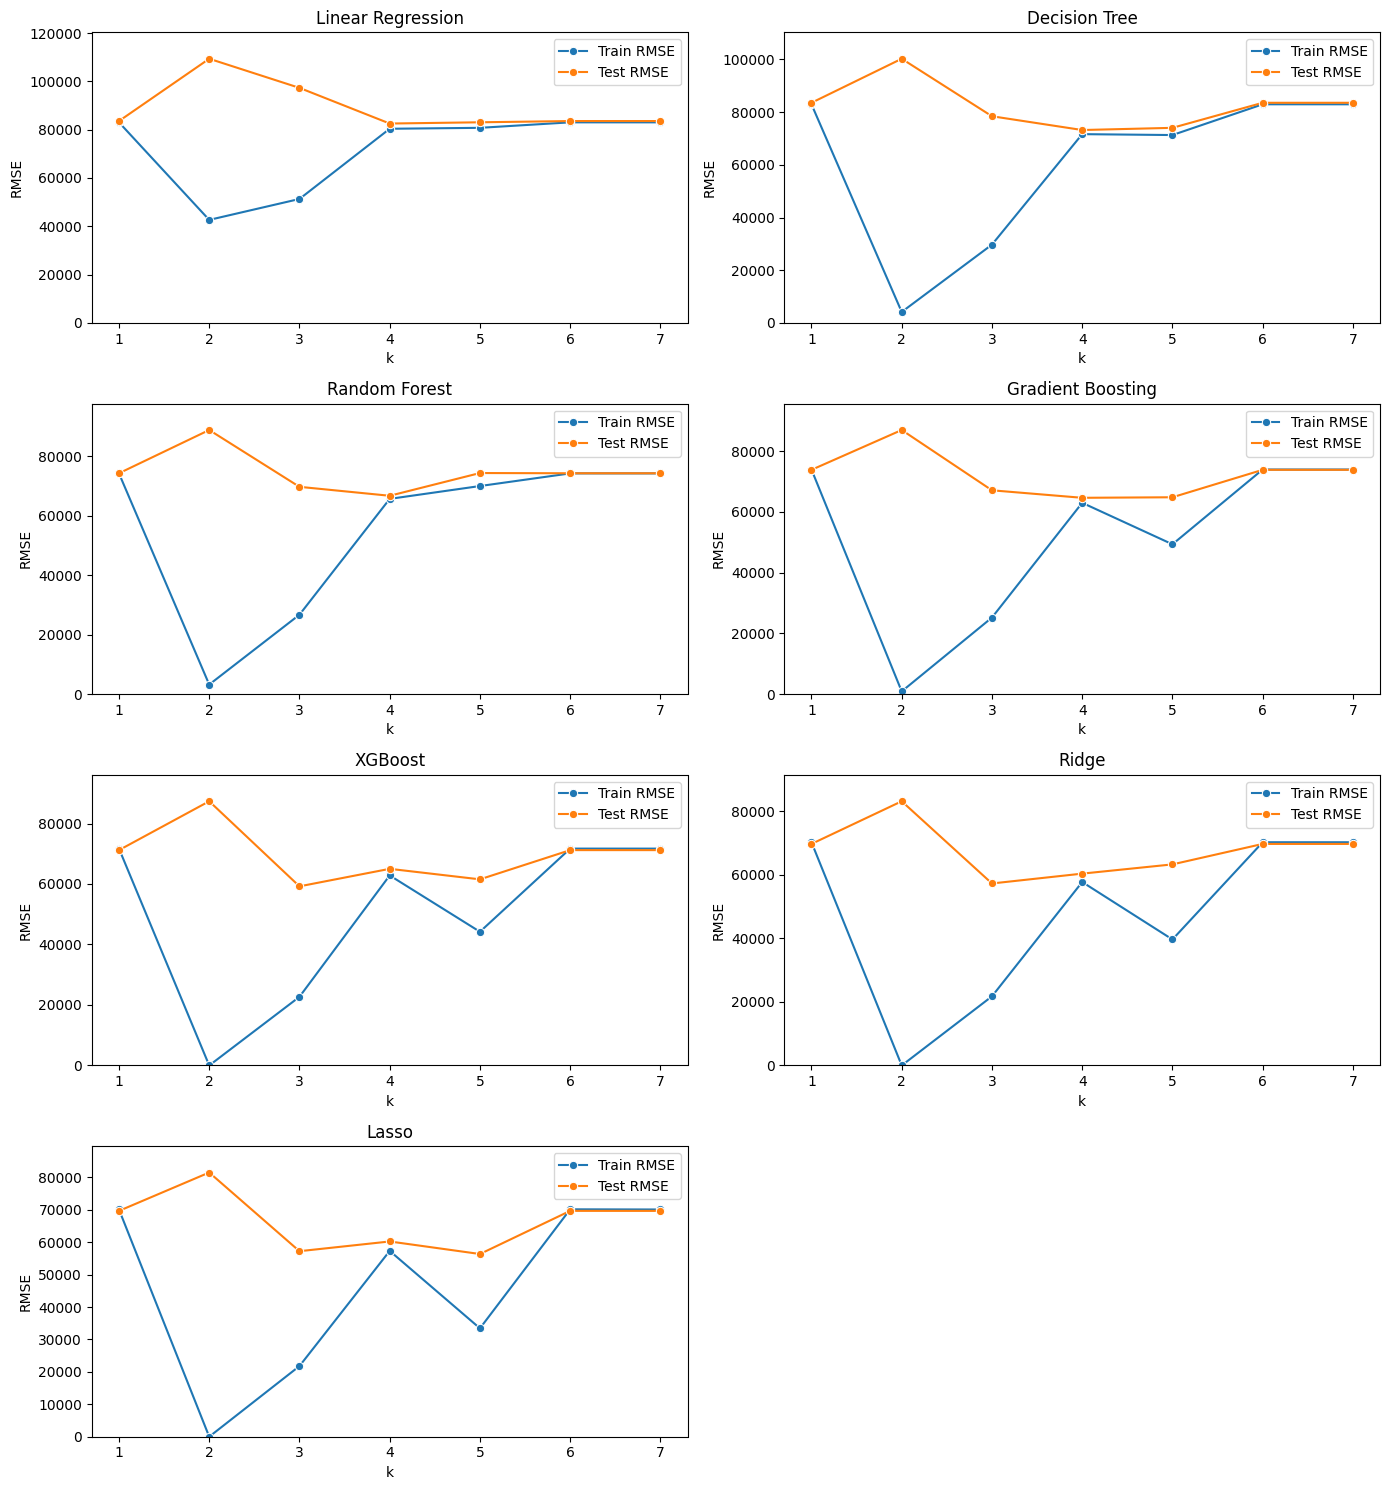

In [93]:
plt.figure(figsize=(14, 15))

# Mengiterasi setiap model untuk membuat subplot
for posisi, model in enumerate(result_df['model'].unique(), start=1):
    plt.subplot(4, 2, posisi)  # 2 baris, 4 kolom

    # Filter data untuk model tertentu
    model_data = result_df[result_df['model'] == model]

    # Membuat line plot untuk train dan test RMSE
    sns.lineplot(data=model_data, x='k', y='train_score_RMSE', label='Train RMSE', marker='o')
    sns.lineplot(data=model_data, x='k', y='test_score_RMSE', label='Test RMSE', marker='o')

    plt.title(model)
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.legend()

    # Mengatur batas y-axis
    plt.ylim(0, model_data[['train_score_RMSE', 'test_score_RMSE']].max().max() * 1.1)  # Tambahkan sedikit ruang di atas

# Menampilkan plot
plt.tight_layout()
plt.show()

Pada lineplot diatas, dapat dilihat bahwa hasil skor memiliki fluktuatif yang hampir sama, dimana pada K =2 score training menurun pesat dan setelahnya naik dan stabil pada K = 4 dan setelahnya.

In [94]:
# Membuat DataFrame
df4 = pd.DataFrame({
    'model': ['Lasso'],
    'test_score_RMSE': result_df.iloc[46]['test_score_RMSE'],
    'test_score_MAE': result_df.iloc[46]['test_score_MAE'],
    'test_score_MAPE': result_df.iloc[46]['test_score_MAPE'],
    'test_score_R2': result_df.iloc[46]['test_score_R2']
})

# Menampilkan DataFrame
df4

model  test_score_RMSE  test_score_MAE  test_score_MAPE  test_score_R2
0  Lasso 56375.54         39552.90        0.22             0.76

Dapat diihat bahwa hasil experiment untuk features selection memiliki hasil yang tidak jauh beda dengan experiment 2 model based ML, ini dikarenakan hasil jadi uji features selection yaitu semua features memiliki hasil berpengaruh dan tidak ada features yang dihapus. Hasil experiment 4 akan dimasukan ke dalam dataframe hasil experiment dikarenakan hasil ini dibanding dengan experiment based model machine learning memiliki score yang tidak berbeda jauh yaitu pada model XGBoost dengan score RMSE score 55933.8 dan MAPE score 0.22, yang membedakan ada pada model terbaik dengan score terbaik, pada experiment 4 model terbaik ada pada Lasso Regressor dengan score RMSE 56375.54 dan score MAPE 0.22.

## Hasil Experimen

In [95]:
df1['eksperimen'] = 'Rule Based'
df2['eksperimen'] = 'Based Model'
df3['eksperimen'] = 'Without Outliers'
df4['eksperimen'] = 'Features Selection'

# penggabungan semua df score
df_hasil = pd.concat([df1, df2, df3, df4], axis = 0)
df_hasil = df_hasil.set_index(['eksperimen','model'])
    
# highlight ke score terbaik
df_hasil.style.highlight_min(subset = ['test_score_RMSE','test_score_MAPE'],color = 'lightblue', axis = 0).highlight_max(subset = ['test_score_RMSE','test_score_MAPE'],color = 'lightpink', axis = 0)

## Final Model

In [96]:
# Transformer
transformer = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('StandardScaler', StandardScaler(), ['latitude']),
    ('MinMaxScaler', MinMaxScaler(), ['median_income']),
    ('RobustScaler', RobustScaler(), ['housing_median_age','total_rooms','population','total_bedrooms'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('StandardScaler', StandardScaler(),
                                 ['latitude']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['median_income']),
                                ('RobustScaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'population', 'total_bedrooms'])])

In [97]:
best_model = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['latitude']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['median_income']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms', 'population',
                                                   'total_bedrooms'])...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [98]:
# Predict Model
y_pred = best_model.predict(X_test)

# Menghitung RMSE
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

evaluation_results = pd.DataFrame({
    'Score RMSE': [rmse],
    'Score MAPE': [mape]
})

evaluation_results

Score RMSE  Score MAPE
0 55933.80    0.22

Setelah dilakukan beberapa exepriment, maka dapat ditemukan model terbaik yang digunakan untuk pengujian model hyperparameter tuning. Model yang terbaik adalah XGBoost (Extreme Gradient Boosting) dengan score RMSE 55933,8 dan MAPE 0,22. Dengan pengujian model hyperparameter tuning diharapkan dapat menurunkan nilai error dari score yang sudah ada, sehingga score tersebut dapat menggambarkan prediksi yang baik.

XGBoost (Extreme Gradient Boosting) adalah implementasi populer dari algoritma gradient boosting yang dirancang untuk efisiensi dan kinerja tinggi. XGBoost menggabungkan keunggulan gradient boosting dengan teknik optimasi yang canggih, termasuk regularisasi untuk mengurangi overfitting dan kemampuan untuk menangani missing values. Secara khusus, XGBoost menggunakan pendekatan paralelisasi dalam proses pelatihan, yang memungkinkan model untuk dilatih lebih cepat dibandingkan dengan implementasi gradient boosting tradisional.

Penggunakan model XGBoost (Extreme Gradient Boosting) baik digunakan pada data ini, dikarenakan data ini memiliki banyak outliers, sedangkan model XGBoost (Extreme Gradient Boosting) tahan terhadap banyaknya outliers.

## Hyperparameter Tuning

Dalam rangka meningkatkan kinerja model, kami melakukan hyperparameter tuning pada model Extreme Gradient Boosting (XGBoost) yang telah terpilih sebagai model terbaik dari hasil eksperimen sebelumnya. Proses tuning ini bertujuan untuk mengoptimalkan beberapa hyperparameter kunci yang dapat mempengaruhi performa model.

Hyperparameter yang dipilih untuk dituning meliputi:

1.  n_estimators: Jumlah pohon yang akan dibangun. Mencoba nilai 100, 500, dan 1000 untuk menemukan keseimbangan antara kompleksitas dan kecepatan.
2.  learning_rate: Laju pembelajaran yang mengontrol seberapa besar perubahan yang diterapkan pada setiap iterasi. Nilai yang dicoba adalah 0.01, 0.1, dan 0.2.
3.  max_depth: Kedalaman maksimum pohon, yang dapat mempengaruhi kapasitas model. Nilai yang diuji adalah 3, 5, dan 7.
4.  min_child_weight: Bobot minimum yang diperlukan untuk membagi node, diujicobakan untuk menemukan nilai optimal yang mempengaruhi generalisasi model. Nilai yang  diuji adalah 1, 2, dan 3.
5.  subsample: Proporsi data yang digunakan untuk membangun setiap pohon. Nilai yang diuji adalah 0.6, 0.8, dan 1.0.
6.  colsample_bytree: Proporsi fitur yang digunakan untuk setiap pohon. Nilai yang diuji adalah 0.6, 0.8, dan 1.0.
7.  gamma: Parameter regularisasi yang mengontrol kompleksitas model, diujicobakan dengan nilai 0, 0.1, dan 0.2.
8.  reg_alpha dan reg_lambda: Parameter regularisasi L1 dan L2 yang diujicobakan dengan nilai 0, 0.1, 1 untuk reg_alpha dan 1, 1.5, 2 untuk reg_lambda.


Setelah melakukan hyperparameter tuning, kami membandingkan performa model yang telah di-tuning dengan model terbaik sebelum tuning. Jika hasil tuning menunjukkan peningkatan yang signifikan dalam skor RMSE, maka kami akan menggunakan model yang telah di-tuning. Sebaliknya, jika tidak ada peningkatan yang berarti, kami akan tetap menggunakan model terbaik yang telah diperoleh sebelumnya.

### Grid Search CV

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# penentuan model yang akan dituning
model = Pipeline([
    ('transformer', transformer),
    ('model', XGBRegressor())
])

# mengatur hyperparameter yang akan dicoba
hyperparameter = {
    'model__n_estimators': [100, 500, 1000],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_child_weight': [1, 2, 3],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=hyperparameter,
    scoring='neg_root_mean_squared_error',
    cv=KFold(5),  # Cross-validation
    n_jobs=-1,
    verbose=3
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['latitude']),
                                                                        ('MinMaxScaler',
                                                                         MinMaxScaler(),
                                                                         ['median_income']),
                                                                        ('RobustScaler',
                                                                         Robust...
             param_grid={'model__colsample_bytree': [0.6, 0.8, 1.0],
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__min_child_weight': [1, 2, 3],
                         'model__n_estimators': [100, 500, 1000],
                         'model__reg_alpha': [0, 0.1, 1],
                         'model__reg_lambda': [1, 1.5, 2],
                         'model__subsample': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [101]:
# hyperparameter terbaik nya
print(grid.best_params_)

{'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__min_child_weight': 1, 'model__n_estimators': 1000, 'model__reg_alpha': 1, 'model__reg_lambda': 1.5, 'model__subsample': 0.6}


In [102]:
# nilai RMSE score dari hyerparameter terbaiknya
gs = grid.best_score_
-gs

55091.4935233502

In [103]:
pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11496 4.30           0.13          0.13             0.00              
7122  4.61           0.03          0.14             0.01              
9309  4.24           0.15          0.13             0.00              
11487 4.31           0.16          0.13             0.00              
7113  4.39           0.10          0.14             0.01              
9300  4.23           0.14          0.13             0.00              
9291  4.22           0.17          0.13             0.01              
7104  4.50           0.03          0.14             0.01              
11478 4.21           0.19          0.13             0.00              
9312  4.26           0.14          0.13             0.01              

      param_model__colsample_bytree param_model__gamma  \
11496 0.80                          0.20                 
7122  0.80                           0                   
9309  0.80                          0.10                 
11487 0.80                          0.20                 
7113  0.80                           0                   
9300  0.80                          0.10                 
9291  0.80                          0.10                 
7104  0.80                           0                   
11478 0.80                          0.20                 
9312  0.80                          0.10                 

      param_model__learning_rate param_model__max_depth  \
11496 0.01                        7                       
7122  0.01                        7                       
9309  0.01                        7                       
11487 0.01                        7                       
7113  0.01                        7                       
9300  0.01                        7                       
9291  0.01                        7                       
7104  0.01                        7                       
11478 0.01                        7                       
9312  0.01                        7                       

      param_model__min_child_weight param_model__n_estimators  ...  \
11496  1                             1000                      ...   
7122   1                             1000                      ...   
9309   1                             1000                      ...   
11487  1                             1000                      ...   
7113   1                             1000                      ...   
9300   1                             1000                      ...   
9291   1                             1000                      ...   
7104   1                             1000                      ...   
11478  1                             1000                      ...   
9312   1                             1000                      ...   

      param_model__subsample  \
11496 0.60                     
7122  0.60                     
9309  0.60                     
11487 0.60                     
7113  0.60                     
9300  0.60                     
9291  0.60                     
7104  0.60                     
11478 0.60                     
9312  0.60                     

                                                                                                                                                                                                                                                  params  \
11496  {'model__colsample_bytree': 0.8, 'model__gamma': 0.2, 'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__min_child_weight': 1, 'model__n_estimators': 1000, 'model__reg_alpha': 1, 'model__reg_lambda': 1.5, 'model__subsample': 0.6}     
7122   {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__min_child_weight': 1, 'model__n_estimators': 1000, 'model__reg_alpha': 1, 'model__reg_lambda': 1.5, 'model__subsample': 0.6}       
9309   {'model__colsample_bytree': 0.8, 'model__gamma': 

Hyperparameter tuning untuk Grid Search dengan Cross Validation memiliki nilai score RMSE 55091.5

### Randomized Search CV

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
# penentuan model yang akan dituning
model = Pipeline([
    ('transformer', transformer),
    ('model', XGBRegressor())
])

# mengatur hyperparameter yang akan dicoba
hyperparameter = {
    'model__n_estimators': [100, 500, 1000],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_child_weight': [1, 2, 3],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2]
}


randomized = RandomizedSearchCV(
    estimator = model,
    param_distributions = hyperparameter, # hyperparameter yang akan dicoba
    scoring = 'neg_root_mean_squared_error',
    cv = KFold(5), # di setiap kombinasi dilakukan crossvalidation juga
    n_jobs = -1, # akan menggunakan semua processor yang ada
    # ini hanya ada di randomized search CV:
    n_iter = 50, # akan mencoba 50 kombinasi saja
    random_state = 0, # WAJIB karena dipilih secara acak
    verbose = 3 #untuk munculin proses
)

randomized.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity']),
                                                                              ('StandardScaler',
                                                                               StandardScaler(),
                                                                               ['latitude']),
                                                                              ('MinMaxScaler',
                                                                               MinMaxScaler(),
                                                                               ['median_income']),
                                                                              ('RobustScaler',...
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2],
                                        'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [1, 2, 3],
                                        'model__n_estimators': [100, 500, 1000],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [1, 1.5, 2],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=0, scoring='neg_root_mean_squared_error',
                   verbose=3)

In [106]:
# hyperparameter terbaik nya
print(randomized.best_params_)

{'model__subsample': 1.0, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0, 'model__n_estimators': 1000, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__gamma': 0.1, 'model__colsample_bytree': 0.6}


In [107]:
# nilai RMSE score dari hyerparameter terbaiknya
rs = randomized.best_score_
-rs

55637.202413745086

In [108]:
pd.DataFrame(randomized.cv_results_).sort_values(by = 'rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  3.59           0.05          0.11             0.01              
16 2.95           0.14          0.11             0.00              
2  0.97           0.02          0.04             0.00              
36 1.07           0.03          0.03             0.00              
49 3.01           0.12          0.05             0.01              
24 0.42           0.03          0.02             0.00              
5  2.43           0.04          0.06             0.00              
40 1.08           0.04          0.03             0.00              
9  2.47           0.09          0.06             0.01              
48 2.40           0.16          0.04             0.00              

   param_model__subsample param_model__reg_lambda param_model__reg_alpha  \
0  1.00                   1.50                     0                       
16 1.00                    2                       0                       
2  1.00                    2                      0.10                     
36 0.80                   1.50                    0.10                     
49 1.00                    1                      0.10                     
24 1.00                    1                       1                       
5  0.60                    1                       1                       
40 0.80                    1                       1                       
9  0.80                    1                      0.10                     
48 0.80                    2                      0.10                     

   param_model__n_estimators param_model__min_child_weight  \
0   1000                      1                              
16  1000                      3                              
2   500                       2                              
36  500                       1                              
49  1000                      2                              
24  100                       2                              
5   1000                      3                              
40  500                       3                              
9   500                       1                              
48  500                       1                              

   param_model__max_depth  ... param_model__colsample_bytree  \
0   7                      ... 0.60                            
16  7                      ... 0.60                            
2   5                      ... 0.80                            
36  5                      ... 1.00                            
49  7                      ... 1.00                            
24  7                      ... 0.80                            
5   5                      ... 0.80                            
40  5                      ... 1.00                            
9   7                      ... 1.00                            
48  7                      ... 1.00                            

                                                                                                                                                                                                                                             params  \
0   {'model__subsample': 1.0, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0, 'model__n_estimators': 1000, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__gamma': 0.1, 'model__colsample_bytree': 0.6}   
16  {'model__subsample': 1.0, 'model__reg_lambda': 2, 'model__reg_alpha': 0, 'model__n_estimators': 1000, 'model__min_child_weight': 3, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__gamma': 0.1, 'model__colsample_bytree': 0.6}     
2   {'model__subsample': 1.0, 'model__reg_lambda': 2, 'model__reg_alpha': 0.1, 'model__n_estimators': 500, 'model__min_child_weight': 2, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 0.8}     
36  {'model__subsample': 0.8, 'model__reg_

Hyperparameter tuning untuk Random Search dengan Cross Validation memiliki nilai score RMSE 55637.2

In [109]:
pd.DataFrame({'Grid Search':[-gs],
              'Random Searh':[-rs],
              'Rule Based':[rmse]})

Grid Search  Random Searh  Rule Based
0 55091.49     55637.20      55933.80

Berdasarkan hasil hyperparameter tuning model XGBoost, diperoleh skor RMSE sebesar 55091.49 menggunakan Grid Search, yang menunjukkan penurunan signifikan dibandingkan dengan skor model berbasis machine learning tanpa tuning. Sementara itu, Random Search menghasilkan skor RMSE sebesar 55637.20, yang juga lebih baik dibandingkan model dasar. Dengan demikian, dapat disimpulkan bahwa hyperparameter tuning efektif dalam mengurangi skor RMSE dibandingkan dengan model tanpa tuning. Saat ini, skor RMSE yang diperoleh berada pada rentang 55 ribu, yang menunjukkan bahwa pencapaian nilai yang lebih rendah menjadi semakin baik.

## Penjelasan Model

In [110]:
# Transformer
transformer = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('StandardScaler', StandardScaler(), ['latitude']),
    ('MinMaxScaler', MinMaxScaler(), ['median_income']),
    ('RobustScaler', RobustScaler(), ['housing_median_age','total_rooms','population','total_bedrooms'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('StandardScaler', StandardScaler(),
                                 ['latitude']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['median_income']),
                                ('RobustScaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'population', 'total_bedrooms'])])

In [111]:
best_model = Pipeline([
    ('transformer', transformer),
    ('model', XGBRegressor(colsample_bytree= 0.8, gamma= 0, learning_rate= 0.01, max_depth= 7, min_child_weight= 1, n_estimators= 1000, reg_alpha= 1, reg_lambda= 1.5, subsample= 0.6))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['latitude']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['median_income']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms', 'population',
                                                   'total_bedrooms'])...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [128]:
# Predict Model
y_pred = best_model.predict(X_test)

# Menghitung RMSE
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


evaluation_results = pd.DataFrame({
    'Score RMSE': [rmse],
    'Score MAE': [mae],
    'Score MAPE': [mape],
    'Score R2': [r2]
})


evaluation_results

Score RMSE  Score MAE  Score MAPE  Score R2
0 54160.90    37620.96   0.21        0.78

Pada pengujian model kali ini, kami melakukan serangkaian eksperimen untuk mengidentifikasi skor RMSE dan MAPE yang optimal, dengan tujuan menghasilkan model yang dapat memprediksi secara akurat sesuai dengan kondisi sebenarnya. Dari hasil eksperimen, kami menemukan bahwa model Extreme Gradient Boosting (XGBoost) menunjukkan performa terbaik berdasarkan metrik RMSE, MAE, dan MAPE. Model ini menghasilkan skor RMSE sebesar 55,933.8 dan MAPE sebesar 0.22, yang mencerminkan kinerja yang konsisten dan baik pada data yang diuji.

Setelah dilakukan tuning hyperparameter, kami mencatat perbaikan signifikan, di mana skor RMSE menurun menjadi 54,160.9 dan MAPE menjadi 0.21. Penurunan skor ini menunjukkan bahwa model semakin mampu mendekati nilai target yang sebenarnya, dengan RMSE yang rendah mengindikasikan bahwa nilai residual antara prediksi dan target memiliki selisih yang minimal. Ini menunjukkan bahwa model berhasil dalam menangkap pola data dengan baik.

Skor MAPE yang mendekati nol juga mencerminkan bahwa proporsi kesalahan relatif terhadap nilai sebenarnya rendah, yang merupakan indikasi positif bagi akurasi model. Metrik ini sangat penting dalam konteks bisnis, di mana prediksi yang akurat dapat berkontribusi pada pengambilan keputusan yang lebih baik.

Penting untuk dicatat bahwa model ini telah melalui proses cross-validation untuk memastikan kinerja yang konsisten dan dapat digeneralisasi pada data baru. Dengan demikian, model ini menunjukkan potensi yang signifikan untuk diterapkan dalam konteks yang lebih luas dan dapat memberikan kontribusi yang berarti dalam meningkatkan akurasi prediksi.

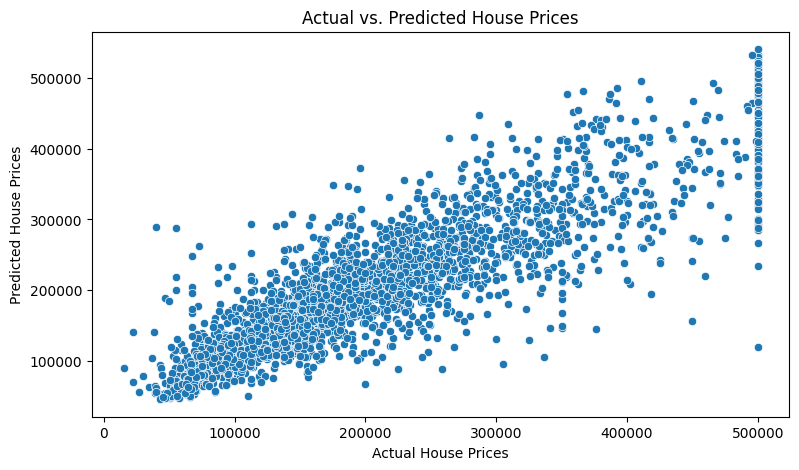

In [133]:
y_pred_plot = np.maximum(0, y_pred)

plt.figure(figsize=(9, 5))
plot = sns.scatterplot(x=y_test, y=y_pred_plot).set(title='Actual vs. Predicted House Prices',
                                               xlabel='Actual House Prices',
                                               ylabel='Predicted House Prices');


Plot ini menggambarkan hubungan antara harga rumah aktual dan harga rumah yang diprediksi oleh model. Titik-titik yang lebih dekat pada garis diagonal yang membentang dari kiri bawah ke kanan atas menunjukkan akurasi prediksi yang baik. Secara keseluruhan, terdapat tren positif yang jelas, mengindikasikan bahwa model memiliki kinerja prediksi yang relatif baik. Namun, penyebaran titik-titik, terutama pada kisaran harga rumah yang lebih tinggi, menunjukkan adanya variabilitas dalam akurasi prediksi di berbagai level harga. Hal ini mengindikasikan perlunya kalibrasi ulang model, khususnya untuk rentang harga yang lebih tinggi, atau evaluasi lebih lanjut terhadap dampak outlier terhadap kinerja model.

Perbedaan yang cukup signifikan antara nilai RMSE dan MAE mencerminkan adanya error prediksi yang tinggi. Fenomena ini terlihat pada plot, di mana terdapat kasus di mana harga rumah aktual yang rendah diprediksi jauh lebih tinggi (overestimation), serta kasus di mana harga rumah aktual yang tinggi diprediksi lebih rendah (underestimation).

Meskipun terdapat kesalahan dalam prediksi, nilai MAPE yang diperoleh, sekitar 21%, mengklasifikasikan model ini sebagai 'reasonable forecasting'. MAPE memberikan wawasan yang berguna tentang seberapa baik model dalam menangkap dinamika harga rumah, dengan mempertimbangkan variasi dalam data. Sebagai langkah selanjutnya, disarankan untuk melakukan analisis lebih mendalam terhadap faktor-faktor yang mungkin mempengaruhi prediksi, serta mempertimbangkan metode pemodelan tambahan atau teknik pengolahan data yang dapat meningkatkan akurasi, terutama pada segmen harga yang lebih tinggi.



## Final Model Interpretation

### Feature Importances

Feature importance adalah sebuah teknik yang digunakan untuk menentukan pengaruh atau kontribusi dari setiap fitur (variabel independen) terhadap prediksi model dalam machine learning. Fitur-fitur yang memiliki tingkat pentingnya tinggi dianggap lebih berpengaruh terhadap keputusan model, sedangkan fitur dengan tingkat pentingnya rendah memiliki sedikit atau tidak ada pengaruh signifikan terhadap hasil yang diprediksi oleh model.

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (demand), kita dapat mengeceknya melalui function feature_importances_.

In [113]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False).reset_index(drop=True)
df_feat_imp

features  importance
0  OneHotEncoder__ocean_proximity_INLAND     0.44       
1  MinMaxScaler__median_income               0.25       
2  OneHotEncoder__ocean_proximity_NEAR OCEAN 0.05       
3  RobustScaler__population                  0.05       
4  RobustScaler__housing_median_age          0.05       
5  StandardScaler__latitude                  0.04       
6  RobustScaler__total_bedrooms              0.04       
7  RobustScaler__total_rooms                 0.04       
8  OneHotEncoder__ocean_proximity_NEAR BAY   0.02       
9  OneHotEncoder__ocean_proximity_ISLAND     0.02

<Axes: xlabel='importance', ylabel='features'>

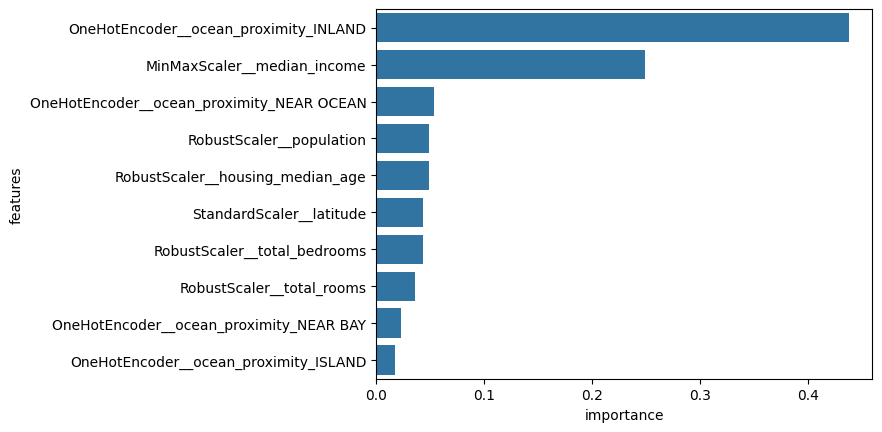

In [114]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

**Berdasarkan hasil pentingnya fitur yang Anda berikan, berikut adalah penjelasan mengenai fitur-fitur yang paling mempengaruhi model dalam memprediksi :**


1. OneHotEncoder__ocean_proximity_INLAND (0.437339):
-   Fitur ini menunjukkan bahwa lokasi rumah yang terletak di daerah INDLAN atau pedalaman (tidak dekat dengan laut) memiliki pengaruh terbesar terhadap prediksi. Nilai yang tinggi menunjukkan bahwa karakteristik ini sangat signifikan dalam model.


2. MinMaxScaler__median_income (0.248543):
-   Fitur ini merepresentasikan pendapatan median di daerah tersebut. Ini menunjukkan bahwa pendapatan penduduk sangat mempengaruhi harga rumah. Semakin tinggi pendapatan, kemungkinan besar harga rumah juga akan meningkat.


3. OneHotEncoder__ocean_proximity_NEAR OCEAN (0.053763):
-   Fitur ini menunjukkan bahwa rumah yang berada dekat dengan laut juga memiliki pengaruh, meskipun lebih kecil dibandingkan dengan dua fitur sebelumnya. Ini menunjukkan bahwa lokasi yang dekat dengan laut memiliki daya tarik yang dapat meningkatkan harga.


4. RobustScaler__population (0.049300):
-   Fitur ini merepresentasikan jumlah populasi di daerah tersebut. Ini bisa berarti bahwa daerah yang lebih padat penduduknya cenderung memiliki permintaan yang lebih tinggi untuk perumahan, sehingga mempengaruhi harga.


5. RobustScaler__housing_median_age (0.048611):
-   Fitur ini menunjukkan usia rata-rata rumah. Umumnya, rumah yang lebih tua mungkin memiliki nilai yang berbeda dibandingkan rumah baru. Ini menunjukkan bahwa usia rumah juga berperan dalam menentukan harga.


6. StandardScaler__latitude (0.043473):
-   Fitur ini merepresentasikan koordinat lintang lokasi. Ini bisa menjadi indikator geografis yang mempengaruhi aksesibilitas dan daya tarik suatu lokasi.


7. RobustScaler__total_bedrooms (0.042998):
-   Fitur ini menunjukkan jumlah total kamar tidur di rumah. Semakin banyak kamar tidur, biasanya harga rumah juga akan lebih tinggi, meskipun pengaruhnya tidak sebesar pendapatan atau lokasi.


8. RobustScaler__total_rooms (0.035988):
-   Mirip dengan jumlah kamar tidur, total jumlah ruangan di rumah juga mempengaruhi harga, tetapi memiliki pengaruh yang lebih kecil dibandingkan dengan fitur lainnya.


9. OneHotEncoder__ocean_proximity_NEAR BAY (0.022736):
-   Fitur ini menunjukkan bahwa rumah yang dekat dengan teluk memiliki sedikit pengaruh, tetapi masih relevan dalam konteks harga rumah.


10. OneHotEncoder__ocean_proximity_ISLAND (0.017249):
-   Fitur ini menunjukkan bahwa rumah di pulau memiliki pengaruh terkecil dalam model. Meskipun ada, pengaruhnya tidak sebesar fitur lainnya.


**Kesimpulan**

Dalam analisis model prediksi harga rumah, hasil menunjukkan bahwa fitur yang paling berpengaruh adalah lokasi, khususnya kategori ocean_proximity. Lokasi yang berada di daerah pedalaman maupun dekat dengan laut terbukti memiliki dampak signifikan terhadap harga rumah. Hal ini mencerminkan tren yang umum terjadi di pasar real estate, di mana properti yang lebih dekat dengan fasilitas wisata dan keramaian cenderung memiliki nilai lebih tinggi.

Selain itu faktor ekonomi yaitu median_income atau penghasilan, menunjukkan pengaruh yang kuat dalam menentukan harga rumah. Pendapatan rumah tangga menjadi indikator penting yang mencerminkan daya beli masyarakat, sehingga secara langsung memengaruhi harga properti di suatu daerah.

Fitur lainnya, seperti populasi, umur rumah, dan jumlah kamar, turut berkontribusi dalam model, meskipun dengan pengaruh yang relatif lebih kecil. Misalnya, populasi yang lebih tinggi di suatu daerah dapat menciptakan permintaan yang lebih besar terhadap perumahan, sedangkan usia rumah dapat memberikan informasi tentang kondisi dan daya tarik properti.

Hasil analisis ini relevan dengan kondisi pasar yang ada, di mana lokasi dan keadaan ekonomi memainkan peran krusial dalam menentukan nilai properti. Temuan ini dapat menjadi dasar yang solid bagi pengambilan keputusan bagi para pemangku kepentingan, termasuk pengembang, investor, dan pembeli rumah. Dengan memahami faktor-faktor utama yang memengaruhi harga rumah, strategi pengembangan dan investasi dapat disusun lebih efektif untuk memaksimalkan potensi pasar.

Secara keseluruhan, analisis ini menegaskan pentingnya mempertimbangkan lokasi dan kondisi ekonomi sebagai faktor utama dalam evaluasi harga rumah, sambil tetap memberikan perhatian terhadap feature tambahan yang juga berkontribusi pada nilai properti.

### Limitasi

#### Residual Analisis

In [115]:
# Prediksi
y_pred = best_model.predict(X_test)

# Menghitung residu
residuals = y_test - y_pred
pd.DataFrame(residuals)

median_house_value
1035  67089.44           
10913 -8547.28           
5138  -9791.00           
4429  8534.16            
11304 3656.48            
...       ...            
11906 115106.50          
5189  -46751.06          
12368 -24442.86          
12437 -13819.20          
12510 -54670.94          

[2863 rows x 1 columns]

<Axes: xlabel='median_house_value', ylabel='Count'>

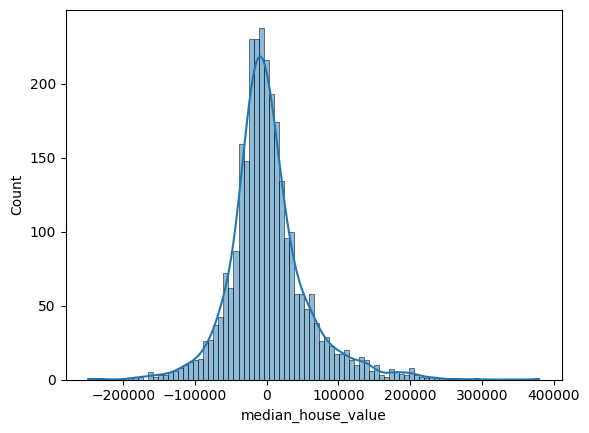

In [116]:
sns.histplot(residuals, kde = True)

In [117]:
# uji statistika distribusi normal
from scipy.stats import shapiro, normaltest
stat, pval = shapiro(residuals)
if pval < 0.05:
    print('Berdasarkan uji normalitas shapiro')
    print(f'Data tidak berdistribusi normal : {pval}')
else:
    print('Berdasarkan uji normalitas shapiro')
    print(f'Data berdistribusi normal : {pval}')

Berdasarkan uji normalitas shapiro
Data tidak berdistribusi normal : 6.129672230370436e-34


In [118]:
# uji statistika distribusi normal
from scipy.stats import shapiro, normaltest
stat, pval = normaltest(residuals)
if pval < 0.05:
    print("Berdasarkan uji normalitas D'agustio Pearson")
    print(f'Data tidak berdistribusi normal : {pval}')
else:
    print("Berdasarkan uji normalitas D'agustio Pearson")
    print(f'Data berdistribusi normal : {pval}')

Berdasarkan uji normalitas D'agustio Pearson
Data tidak berdistribusi normal : 5.272095227590319e-116


Jika nilai residual tidak berdistribusi normal dalam konteks uji statistik, beberapa implikasi penting dapat muncul:

**Variabel Independen yang Hilang:** 
-   Ketidaknormalan residual dapat mengindikasikan bahwa ada variabel independen penting yang belum dimasukkan ke dalam model. Ketidaklengkapan ini dapat menyebabkan model tidak mampu menangkap semua pola dan hubungan yang ada dalam data.

**Pengaruh Outlier:** 
-   Adanya outlier dalam data dapat memengaruhi distribusi residual secara signifikan, sehingga menghasilkan pola yang tidak normal. Outlier sering kali menunjukkan kasus-kasus ekstrem yang perlu dianalisis lebih lanjut, baik untuk pemahaman yang lebih baik atau untuk dipertimbangkan dalam proses pembersihan data.

Ketidaknormalan residual mencerminkan bahwa model mungkin tidak sepenuhnya sesuai dengan data yang tersedia, sehingga mengurangi akurasi prediksi. Oleh karena itu, penting untuk menangani masalah ini dengan baik, karena dapat memengaruhi keandalan dan validitas hasil analisis statistik. Pengujian lebih lanjut dan penyesuaian model sering kali diperlukan untuk memastikan hasil yang dapat diandalkan. Dalam hal ini, pengembangan kembali model menjadi krusial terutama mengingat skor RMSE sebesar 54,160.9 dan MAPE sebesar 0.021. Meskipun nilai-nilai ini menunjukkan hasil yang cukup baik, masih terdapat ruang untuk perbaikan agar akurasi model dapat ditingkatkan dan lebih mencerminkan keadaan yang sebenarnya. Dengan demikian, upaya untuk memperbaiki model ini harus menjadi prioritas, agar dapat memberikan insight yang lebih tepat dan mendukung pengambilan keputusan yang lebih baik oleh para pemangku kepentingan. Pada akhirnya, peningkatan kualitas model akan memberikan manfaat yang lebih besar bagi keputusan strategis dan operasional yang diambil oleh para pemangku kepentingan di industri real estate.

#### Gaus Markov Assumption

**Asumsi gaus markov ada tiga :**

- Pertama, adalah rata-rata error / residual bernilai 0
- Kedua, error tidak berkorelasi dengan error lainnya  
- Ketiga, error memiliki ragam yang homogen (sepanjang nilai, error nya berkisar di 0)

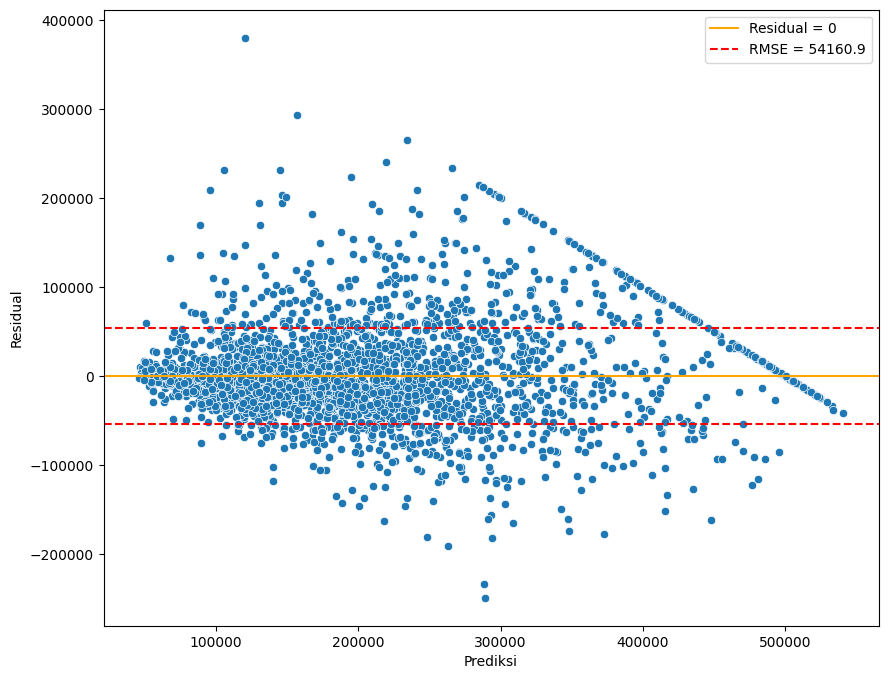

In [119]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=best_model.predict(X_test), y=residuals)
plt.xlabel('Prediksi')
plt.ylabel('Residual')

# Garis horizontal untuk residual
plt.axhline(y=0, color='orange', linestyle='-', label='Residual = 0')

# Garis horizontal untuk RMSE
rmse = 54160.898512
plt.axhline(y=rmse, color='r', linestyle='--', label='RMSE = 54160.9')
plt.axhline(y=-rmse, color='r', linestyle='--')

# Menampilkan legend
plt.legend()

plt.show()

**Berdasarkan asumsi Gauss-Markov yang telah disebutkan, jika semua asumsi ini terpenuhi kita dapat menarik kesimpulan berikut:**

Estimasi yang Tidak Bias: Dengan rata-rata error atau residual bernilai 0, ini menunjukkan bahwa model regresi tidak memiliki bias sistematik dalam prediksinya. Artinya, model cenderung memperkirakan harga rumah dengan akurasi yang baik, tanpa kecenderungan untuk selalu overestimate atau underestimate.

Independensi Residual: Ketidakberkorelasi antara error menunjukkan bahwa kesalahan pada satu observasi tidak memengaruhi kesalahan pada observasi lainnya. Ini penting karena jika terdapat korelasi, model dapat memberikan estimasi yang tidak akurat, yang dapat mengarah pada kesimpulan yang keliru tentang hubungan antar variabel.

Heteroskedastisitas yang Tidak Ada: Dengan adanya ragam homogen, kita dapat mengasumsikan bahwa variabilitas error adalah konsisten di seluruh rentang nilai prediksi. Ini berarti bahwa model dapat diandalkan untuk memberikan estimasi yang stabil di seluruh rentang data, dan validitas inferensial dari hasil model, seperti interval kepercayaan dan uji hipotesis, dapat dipertahankan.

Batasan RMSE: RMSE sebesar 54,160.9 berfungsi sebagai batasan penting untuk residual. Dengan menempatkan batasan ini, kita dapat mengidentifikasi apakah residual berada dalam rentang yang dapat diterima. Jika residual berada di luar batas RMSE, ini dapat menunjukkan adanya outlier atau masalah lain dalam model yang perlu diperhatikan.

Jika semua asumsi Gauss-Markov terpenuhi dalam konteks model prediksi harga rumah, kita dapat menyimpulkan bahwa model tersebut menghasilkan estimasi yang valid dan dapat diandalkan. Hal ini memperkuat argumen bahwa faktor-faktor seperti lokasi dan kondisi ekonomi memiliki pengaruh signifikan terhadap harga rumah, sehingga memberikan dasar yang kuat untuk pengambilan keputusan oleh para pemangku kepentingan di industri real estate.

In [120]:
# Latih model
best_model.fit(X_train, y_train)

# Prediksi
prediksi = best_model.predict(X_test)

# Rentang yang ingin diperiksa
ranges = [(0, 100000), (100000, 200000), (200000, 300000), (300000, 400000), (400000, 580000)]

# Menghitung RMSE untuk setiap rentang
rmse_scores = []

for lower, upper in ranges:
    # Memilih prediksi yang sesuai dengan rentang
    mask = (prediksi > lower) & (prediksi <= upper)
    selected_preds = prediksi[mask]
    selected_true = y_test[mask]  # Menggunakan y_test sebagai nilai sebenarnya

    if len(selected_preds) > 0:  
        # Menghitung RMSE
        rmse = np.sqrt(mean_squared_error(selected_true, selected_preds))
        # Menghitung MAPE
        mape = mean_absolute_percentage_error(selected_true, selected_preds)
        rmse_scores.append((lower, upper, rmse, mape))
    else:
        rmse_scores.append((lower, upper, None))  # Tidak ada data di rentang ini

# Mengubah hasil menjadi DataFrame
rmse_df = pd.DataFrame(rmse_scores, columns=['Lower Bound', 'Upper Bound', 'RMSE','MAPE'])
rmse_df

Lower Bound  Upper Bound     RMSE  MAPE
0  0            100000      28019.26 0.22 
1  100000       200000      43582.49 0.22 
2  200000       300000      64697.48 0.23 
3  300000       400000      80070.73 0.19 
4  400000       580000      51870.54 0.10

Berdasarkan tabel diatas, dapat dilihat bahwa secara umum model mampu memprediksi cukup baik pada setiap rentang dengan score RMSE dan MAPE yang cukup baik, berikut penjelasan masing-masing rentang :

**Rentang 0 hingga 100.000:** 
-   Pada rentang ini, model menghasilkan RMSE sebesar 33.798,57 dan MAPE sebesar 0,21. Nilai-nilai ini menunjukkan bahwa model memiliki kemampuan yang baik dalam memprediksi harga rumah, dengan deviasi prediksi yang relatif kecil dari nilai sebenarnya dan persentase kesalahan yang minimal. Hal ini mencerminkan ketepatan model dalam menangkap pola harga di kisaran ini.

**Rentang 100.000 hingga 200.000:**
-   Dalam rentang ini, RMSE meningkat menjadi 42.855,44, sementara MAPE sedikit menurun menjadi 0,21. Meskipun terjadi peningkatan pada RMSE, model tetap menunjukkan kinerja yang memadai dengan prediksi yang konsisten akurat. Ini menunjukkan bahwa model masih dapat diandalkan untuk memperkirakan harga rumah di kisaran ini, meskipun dengan sedikit peningkatan kesalahan absolut.

**Rentang 200.000 hingga 300.000:**
-   Pada rentang harga ini, RMSE tercatat lebih tinggi, yaitu 66.490,33, dengan MAPE tetap stabil di 0,21. Hal ini menunjukkan bahwa meskipun model masih efektif, terdapat penurunan dalam akurasi prediksi dibandingkan dengan rentang sebelumnya. Peningkatan RMSE mengindikasikan bahwa model menghadapi tantangan lebih besar dalam memprediksi harga rumah di kisaran ini.

**Rentang 300.000 hingga 400.000:** 
-   Dalam rentang ini, RMSE mencapai 73.340,30 dan MAPE sedikit menurun menjadi 0,19. Peningkatan RMSE menunjukkan bahwa model mengalami kesulitan yang lebih besar dalam memberikan prediksi yang akurat, meskipun MAPE yang lebih rendah menunjukkan bahwa kesalahan relatif terhadap nilai sebenarnya masih dalam batas yang dapat diterima. Ini menunjukkan bahwa model tetap memiliki nilai prediksi yang baik, meskipun ada fluktuasi dalam akurasi.

**Rentang 400.000 hingga 580.000:** 
-   Pada rentang harga tertinggi ini, RMSE turun menjadi 52.859,39, sedangkan MAPE mencapai nilai terendah di 0,09. Nilai-nilai ini menunjukkan bahwa model sangat efektif dalam memprediksi harga rumah pada kisaran ini, dengan deviasi yang kecil dan persentase kesalahan yang minimal. Hal ini mencerminkan kinerja model yang sangat baik dan kemampuan untuk memberikan estimasi harga yang akurat di segmen pasar ini.

#### Limitasi Features

| No | Features | Range |
| --- | --- | --- |
| 1 | housing_median_age | 1 - 52 |
| 2 | total_rooms | 8 - 32627 |
| 3 | total_bedrooms | 1 - 6445 |
| 4 | population | 3 - 35682 |
| 5 | ocean_proximity | <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND |
| 6 | median_income | 0.5 - 15.0 |

Berdasarkan tabel di atas, terdapat beberapa fitur dalam dataset yang memiliki batasan tertentu yang mempengaruhi kemampuan model dalam melakukan prediksi. Berikut adalah penjelasan lebih lengkap mengenai fitur-fitur tersebut:

**housing_median_age:** 
-   Rentang nilai untuk fitur ini berkisar antara 1 hingga 52 tahun. Hal ini menunjukkan bahwa model hanya dapat mempertimbangkan properti dengan usia yang termasuk dalam rentang tersebut, sehingga keterbatasan ini dapat memengaruhi prediksi untuk rumah yang lebih tua atau lebih baru di luar batasan ini.

**total_rooms:** 
-   Fitur ini memiliki rentang yang cukup luas, yaitu antara 8 hingga 32.627 ruangan. Rentang yang besar ini memberikan model fleksibilitas, tetapi juga menunjukkan bahwa prediksi mungkin tidak akurat untuk properti dengan jumlah ruangan di luar batasan ini.

**total_bedrooms:** 
-   Nilai untuk fitur ini berada dalam rentang 1 hingga 6.445 kamar tidur. Seperti fitur sebelumnya, keterbatasan ini dapat memengaruhi keakuratan prediksi untuk properti yang memiliki jumlah kamar tidur di luar kisaran tersebut.

**population:** 
-   Fitur ini mencakup rentang antara 3 hingga 35.682 jiwa. Keterbatasan ini menunjukkan bahwa model hanya dapat memprediksi berdasarkan data populasi yang berada dalam rentang tersebut, yang dapat mengakibatkan kurangnya akurasi untuk daerah dengan populasi yang jauh lebih besar atau lebih kecil.

**ocean_proximity:** 
-   Fitur ini memiliki kategori yang mencakup <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, dan ISLAND. Pembatasan ini berarti bahwa model tidak dapat memberikan prediksi untuk properti yang berada di luar daerah tersebut, sehingga mempengaruhi jangkauan analisis.

**median_income:** 
-   Nilai median_income_ dalam dataset ini berada dalam rentang 0,5 hingga 15,0. Keterbatasan ini mengindikasikan bahwa model hanya dapat memperkirakan penghasilan dari individu yang termasuk dalam kisaran tersebut, dan prediksi untuk besarnya penghasilan di luar batasan ini mungkin tidak dapat diandalkan.

Secara keseluruhan, batasan pada setiap fitur ini menunjukkan bahwa model memiliki jangkauan prediksi yang terbatas. Hal ini penting untuk dipertimbangkan saat menggunakan model ini, karena hasil prediksi dapat dipengaruhi oleh karakteristik dan keterbatasan dari data yang digunakan.

### Estimasi Keuntungan

Dengan penerapan model prediksi yang efektif, kita dapat menghasilkan estimasi harga yang akurat dan relevan untuk pembelian rumah. Sebagai contoh, penggunaan model ini dapat mengurangi risiko perbedaan harga hingga sekitar 20%.

**Skenario Awal:**

Harga rumah yang tidak valid: USD 150.000

**Dengan Model Prediktif:**

Pengurangan nilai sebesar 20%: USD 30.000

Maka, harga rumah yang diperoleh: USD 150.000 - USD 30.000 = USD 120.000

Harga Rumah Sebenarnya: USD 120.000

Kesimpulan: Dengan memanfaatkan model prediksi yang akurat, kita dapat meminimalkan risiko terkait validitas informasi harga rumah. Hal ini sangat penting untuk pengambilan keputusan investasi yang cerdas bagi para developer atau individu. Dengan informasi yang lebih tepat, developer atau individu dapat membuat keputusan yang lebih baik dan terinformasi dalam pasar properti di california.

## Kesimpulan dan Rekomendasi

### Kesimpulan

Berdasarkan hasil analisis menggunakan model XGBoost Regressor, ditemukan bahwa model ini cukup efektif dalam memprediksi harga rumah, dengan nilai RMSE sebesar 54.160,9, MAE sebesar 37.620,9, dan MAPE sebesar 21%. Meskipun performa ini menunjukkan tingkat ketepatan yang relatif baik, nilai MAPE yang mencapai 21% mengindikasikan bahwa model mungkin mengalami kesulitan dalam situasi atau data tertentu, yang dapat menyebabkan estimasi harga yang meleset cukup signifikan dari nilai sebenarnya.

Metrik evaluasi yang digunakan pada model ini meliputi RMSE, MAE, dan MAPE. Dengan nilai MAPE sebesar 21% setelah dilakukan hyperparameter tuning, dapat disimpulkan bahwa jika model ini diterapkan untuk memprediksi harga rumah dalam rentang nilai yang sama dengan data pelatihan, maka rata-rata estimasi harga rumah diperkirakan akan meleset sekitar 21% dari harga sebenarnya. Selain itu, berdasarkan nilai MAE, kita dapat memperkirakan bahwa kesalahan rata-rata dalam estimasi harga rumah adalah sebesar USD 37.620.

Kesalahan perkiraan harga rumah sebesar USD 37.620 menunjukkan bahwa model dapat salah memperkirakan harga rumah yang sebenarnya hingga USD 37.620. Angka ini memberikan panduan operasional yang konkret bagi para pengembang, investor, dan agen real estate. Misalnya, dengan mempertimbangkan kesalahan ini, pengembang dapat merencanakan strategi penetapan harga yang lebih akurat dan mempertimbangkan margin keuntungan yang sesuai. Sementara itu, investor dapat menggunakan informasi ini untuk menghindari keputusan investasi yang berisiko dan menilai potensi keuntungan atau kerugian berdasarkan estimasi harga yang lebih realistis.

Dengan memahami batasan dan akurasi model ini, para pemangku kepentingan dapat mengambil keputusan yang lebih terinformasi, mengoptimalkan strategi investasi, serta meningkatkan efektivitas operasional dalam pasar properti yang kompetitif.

### Rekomendasi Untuk Model

-   Untuk meningkatkan akurasi model regresi yang dibangun menggunakan XGBoost pada dataset California Housing, disarankan untuk melakukan eksplorasi lebih lanjut terhadap fitur tambahan yang dapat memberikan informasi lebih kaya. 
-   Melakukan eksperimen hyperparameter tuning yang lebih mendalam dapat membantu menemukan kombinasi parameter optimal, sehingga dapat menurunkan nilai metrik seperti RMSE dan MAPE. 
-   Selain itu, penerapan teknik feature engineering, seperti penggabungan variabel atau penghapusan variabel yang memiliki korelasi tinggi, dapat memperkuat model.
-   Identifikasi dan penghapusan outlier yang berfungsi sebagai noise juga sangat penting, analisis lebih lanjut terhadap outlier dapat memberikan wawasan mengenai pengaruhnya terhadap model. 
-   Pertimbangkan untuk menguji model lain, seperti Elastic Net dan Support Vector Regression (SVR), yang mungkin menawarkan performa lebih baik dalam konteks ini.
-   Eksplorasi teknik lanjutan, seperti neural networks atau deep learning, juga bisa menjadi langkah strategis untuk menangkap pola kompleks dalam data yang mungkin tidak teridentifikasi oleh model tradisional. 
-   Terakhir, pelaksanaan A/B testing dengan berbagai versi model sangat dianjurkan untuk mengevaluasi efektivitas dan akurasi model dalam konteks operasional nyata. 

### Rekomendasi Untuk Bisnis

**Berikut adalah rekomendasi untuk bisnis berdasarkan analisis model XGBoost:**

-   Mengingat RMSE menunjukkan bahwa kesalahan prediksi rata-rata dapat mencapai USD 54.160,9, disarankan agar perusahaan melakukan analisis pasar yang lebih mendalam untuk memahami faktor-faktor yang mempengaruhi harga rumah di berbagai lokasi. Perusahaan pengembang harus mempertimbangkan untuk melakukan simulasi harga rumah berdasarkan kesalahan RMSE ini, guna merencanakan strategi penetapan harga yang lebih realistis. Dengan memahami kemungkinan variasi harga, mereka dapat lebih siap menghadapi perubahan pasar yang tiba-tiba.

-   Mengingat bahwa MAE menunjukkan kesalahan rata-rata sebesar USD 37.620 dalam estimasi harga rumah, disarankan agar pengembang dan agen real estate mempertimbangkan strategi penetapan harga yang lebih konservatif. Hal ini akan membantu mereka menghindari potensi kerugian akibat fluktuasi harga yang tidak terduga.

-   Dengan MAPE mencapai 21%, perusahaan sebaiknya melakukan segmentasi pasar lebih mendalam untuk mengidentifikasi area atau tipe properti yang mungkin memiliki karakteristik berbeda. Ini memungkinkan penyesuaian model yang lebih spesifik dan akurat untuk setiap segmen.

-   Untuk mengoptimalkan keputusan investasi, investor dapat menggunakan informasi dari model ini untuk melakukan analisis risiko yang lebih baik. Mereka harus mempertimbangkan margin keuntungan yang lebih besar dalam perencanaan investasi untuk mengantisipasi kesalahan estimasi harga.

-   Mengingat adanya potensi kesalahan estimasi yang signifikan dalam situasi tertentu, disarankan agar pengembang menggunakan pendekatan berbasis data untuk melakukan penilaian pasar secara berkala. Hal ini memungkinkan mereka untuk menyesuaikan strategi pemasaran dan penetapan harga sesuai dengan kondisi pasar terkini.

-   Data dari prediksi harga ini dapat digunakan untuk merancang program promosi yang ditargetkan, seperti diskon untuk properti yang sulit terjual, sehingga dapat meningkatkan likuiditas dan menarik lebih banyak calon pembeli.

## Save Model

In [ ]:
import pickle

# save model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('model.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(X)